# Final Exam - Take Home (50 pts)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

In [2]:
mpl.rcParams['figure.figsize'] = (15, 5)

---
---
1. The following refer to the Boston housing market dataset loaded below.

In [3]:
from sklearn import datasets
boston = datasets.load_boston()

---
1a. (5 pts) Extract the features and target data into the variables $X$ and $y$, respectively. Then standardize both the features and target data.

---
1b. (5 pts) Split the standardized data into training and testing sets with 10% of the data in the testing set. Make sure the data is shuffled before it is split.

---
1c. (5 pts) Fit the training set with a Lasso model using cross validation (i.e. LassoCV). Test the Lasso model with the values of $\alpha$ given below. Report the optimal value of $\alpha$.

In [6]:
alphas = np.logspace(-5, 0, 50)

---
1d. (5 pts) Plot a bar graph of the weights for each feature in the dataset and Label the x-axis with the feature names.

---
---
2. The following refer to the EEG time series recording below.

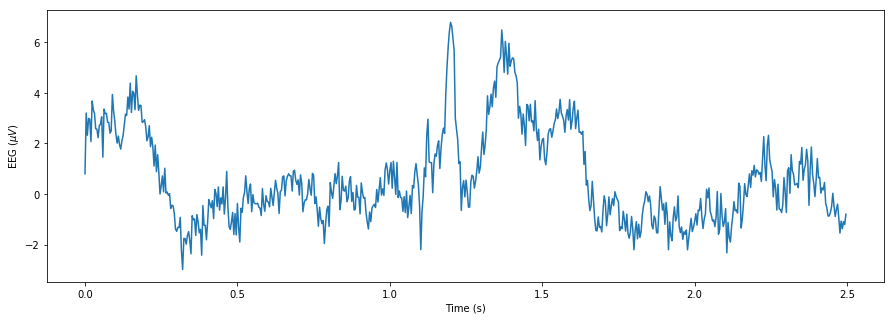

In [10]:
eeg_uV = np.array([ 7.99263716e-01,  3.20453477e+00,  2.32451677e+00,  2.99096251e+00,
        2.95125079e+00,  2.07323146e+00,  3.67824244e+00,  3.33407354e+00,
        3.18097234e+00,  2.57801104e+00,  2.56908560e+00,  2.23031139e+00,
        2.69823503e+00,  2.76596498e+00,  3.05247116e+00,  1.45715261e+00,
        3.36093020e+00,  3.17861724e+00,  3.18882823e+00,  2.84125400e+00,
        2.82957220e+00,  2.40654016e+00,  2.49908733e+00,  3.93868208e+00,
        3.28607726e+00,  2.90427375e+00,  2.35433936e+00,  2.01281786e+00,
        2.29527426e+00,  1.95660460e+00,  1.77596152e+00,  2.10410547e+00,
        2.30907845e+00,  2.73117661e+00,  3.16049576e+00,  3.11193728e+00,
        3.83683133e+00,  3.36231589e+00,  4.38690233e+00,  3.22657943e+00,
        4.06150150e+00,  3.98803377e+00,  3.33341861e+00,  4.67433119e+00,
        3.93356562e+00,  3.31128120e+00,  3.51423979e+00,  3.50051785e+00,
        2.83747530e+00,  2.86140251e+00,  2.93875647e+00,  2.66065621e+00,
        2.10540080e+00,  2.26423168e+00,  2.70363522e+00,  1.87502515e+00,
        2.24604321e+00,  1.85253787e+00,  1.10646093e+00,  1.93581748e+00,
        8.85520995e-01,  1.55400133e+00,  8.57437849e-01,  2.11681263e-03,
        3.31405520e-01,  7.15300024e-01,  8.17477554e-02,  1.01886165e+00,
        3.58378664e-02,  7.88056478e-02, -5.31301610e-02,  1.15285181e-02,
       -5.70677102e-01, -4.45085853e-01, -4.67251986e-01, -7.64465392e-01,
       -1.38555694e+00, -1.47661817e+00, -1.31803536e+00, -1.33042049e+00,
       -9.26028848e-01, -2.25337815e+00, -2.98349643e+00, -1.75738716e+00,
       -1.75983071e+00, -1.98427296e+00, -1.65334618e+00, -1.48713875e+00,
       -1.82748890e+00, -2.36522126e+00, -8.58658135e-01, -1.02472889e+00,
       -9.83468115e-01, -1.63966632e+00, -8.13248694e-01, -1.11178756e+00,
       -1.53469694e+00, -1.39900362e+00, -2.42044449e+00, -4.58633780e-01,
       -1.24245536e+00, -1.23174298e+00, -1.80914867e+00, -1.09792578e+00,
       -2.19788834e-01, -3.91566187e-01, -5.46141744e-01, -2.61245072e-01,
       -9.71207201e-01,  1.80505276e-01,  2.12751739e-02, -4.99209046e-01,
        2.77782142e-01, -6.39305830e-01, -1.51229575e-01, -3.92631769e-01,
        2.83742756e-01, -7.91099787e-01, -1.51982620e-01,  8.96941185e-01,
       -5.05389929e-01, -1.29613113e+00, -1.40133357e+00, -1.09832418e+00,
       -7.26004720e-01, -1.60111558e+00, -7.76258707e-01, -1.62094581e+00,
       -3.73068064e-01, -1.31551611e+00, -1.89829636e+00, -5.63772798e-01,
       -7.26958513e-01, -1.34779319e-01,  5.67472354e-02,  7.18996346e-01,
        8.75397101e-02, -3.74656409e-01,  2.15253636e-01,  3.95852208e-01,
       -6.99114382e-01, -2.36883461e-02, -3.51170272e-01, -3.83369088e-01,
       -3.83628339e-01, -3.63038123e-01, -5.20044565e-01, -5.60551345e-01,
       -8.50981951e-01,  2.15458959e-01, -4.07105505e-01, -6.80982172e-01,
       -6.56360015e-02, -2.86414862e-01, -3.25457484e-01, -5.09348452e-01,
        2.22844079e-01, -1.19338065e-01, -4.54005659e-01,  6.45172149e-02,
        5.45725524e-01,  2.27788508e-01,  2.14903280e-02, -7.68260896e-01,
        9.60702002e-02,  1.51404336e-01,  6.88524425e-01,  7.15013921e-01,
       -7.32056648e-02,  5.25893211e-01,  6.97088838e-01,  7.99444735e-01,
        7.21751750e-01,  7.19343781e-01,  1.17509313e-01,  8.96378636e-01,
        9.42050636e-01,  5.38066745e-01,  3.79113644e-01,  5.61982453e-01,
       -4.07359190e-02,  7.59371877e-01,  4.28462565e-01, -7.00114369e-01,
       -3.55375618e-01, -2.26157665e-01, -2.31882930e-01,  2.03893185e-02,
        5.77020347e-01,  1.96796566e-01, -4.78774756e-02,  8.14633369e-01,
        7.37142861e-01, -3.76670152e-01, -1.12248592e-01, -6.17118895e-01,
       -1.27434111e+00, -5.19831121e-01, -9.70791876e-01, -1.16911042e+00,
       -1.04738796e+00, -1.95756996e+00, -1.21118259e+00, -6.39578640e-01,
       -4.81419504e-01, -1.28147721e+00,  4.52927470e-01,  6.01281971e-02,
       -1.71167746e-01,  3.38981003e-01,  8.08044732e-01,  4.08845395e-01,
        7.25950837e-01,  1.24622834e+00, -6.14392698e-01, -2.85137951e-01,
        7.01438963e-01,  1.47698298e-01,  1.13267340e-01,  3.11485916e-01,
       -3.11249793e-01, -1.57307178e-01,  5.04421592e-01,  6.86937511e-01,
       -2.91096032e-01,  6.34591877e-02, -6.35234833e-01, -6.01996124e-01,
        3.39807719e-01, -1.27645910e-01, -1.28395230e-01, -7.85656393e-01,
        4.38407123e-01,  6.73599169e-02, -1.66758418e-01, -1.34611636e-01,
       -7.35705972e-01, -1.09363270e+00, -1.38281918e+00, -7.10241139e-01,
       -1.09283161e+00, -5.53040266e-01, -4.66702431e-01, -4.03561145e-01,
       -5.30590653e-01,  1.78266943e-01, -3.17033648e-01,  1.83481678e-01,
        6.48464024e-01, -4.26013172e-02,  2.03712925e-01, -5.36359809e-02,
        9.53794062e-01,  1.22623241e+00,  9.44951355e-01,  3.93549412e-01,
        9.23798084e-01,  1.24578214e+00,  2.29820862e-01,  1.29890192e+00,
        6.57313347e-01, -1.45417321e-02,  1.24840510e+00, -1.37040123e-01,
        1.20659336e-01, -1.36338517e-01, -1.55860901e-01, -6.87688053e-01,
       -1.04881160e-01, -7.32815742e-01,  1.19859003e-01, -9.33645129e-01,
       -5.00520945e-01, -5.21559119e-02, -7.68396258e-01,  3.34727943e-01,
        2.37182572e-01,  8.91254485e-01,  1.20330381e+00,  7.49721646e-01,
        3.45261842e-01, -4.81794178e-01, -2.19951034e+00, -7.01962769e-01,
       -9.17551219e-02,  1.03388143e+00,  6.83439016e-01,  2.31528234e+00,
        2.96089673e+00,  1.27630365e+00,  1.24336135e+00,  1.23832083e+00,
        5.46480156e-02,  1.18772888e+00,  1.58343065e+00,  1.49319077e+00,
        1.91689062e+00,  2.10358596e+00,  1.00890112e+00,  1.81117654e+00,
        2.33323407e+00,  2.60636306e+00,  2.39658380e+00,  3.98268080e+00,
        5.01225948e+00,  5.82258415e+00,  6.43058634e+00,  6.79025173e+00,
        6.63568068e+00,  6.13959980e+00,  5.67076635e+00,  2.99180984e+00,
        2.55179238e+00,  2.14307761e+00,  1.20502138e+00,  1.27293909e+00,
       -6.50303245e-01,  2.48398930e-01,  5.26413858e-01, -1.14647478e-01,
        5.48198402e-01,  1.02332436e-01, -5.16828656e-01, -5.20811856e-01,
        4.65165466e-01,  7.43647575e-01,  6.97913527e-01,  2.36138433e-01,
        4.95300561e-01,  9.00662661e-01,  1.47457266e+00,  8.27651203e-01,
        1.06250262e+00,  1.80036759e+00,  2.44940352e+00,  1.56416595e+00,
        1.92463088e+00,  2.53959322e+00,  3.88353729e+00,  3.15129471e+00,
        3.44999194e+00,  3.94891858e+00,  3.45071292e+00,  4.19435978e+00,
        4.46657228e+00,  3.82494617e+00,  5.02802515e+00,  5.18988800e+00,
        5.28867912e+00,  5.41830063e+00,  6.48895454e+00,  5.86283636e+00,
        4.81231689e+00,  6.03701115e+00,  5.48778725e+00,  4.74015713e+00,
        5.96341944e+00,  5.05302334e+00,  5.26999617e+00,  5.38548946e+00,
        5.35455275e+00,  4.81605339e+00,  4.67712212e+00,  4.40581465e+00,
        3.00225925e+00,  3.46769047e+00,  3.18293381e+00,  2.36635709e+00,
        3.16274619e+00,  2.70516753e+00,  1.92360783e+00,  3.54335833e+00,
        3.48667955e+00,  2.89500451e+00,  3.54918170e+00,  2.85223198e+00,
        2.89690518e+00,  2.49828672e+00,  3.69661188e+00,  2.58403468e+00,
        2.11900926e+00,  2.56375360e+00,  1.35088587e+00,  1.87456834e+00,
        2.13885880e+00,  2.20056129e+00,  1.37663054e+00,  1.15605521e+00,
        1.65966749e+00,  2.37382388e+00,  2.55429077e+00,  2.58696890e+00,
        2.24504018e+00,  2.49579763e+00,  2.78881860e+00,  2.93773699e+00,
        3.36445236e+00,  2.98386216e+00,  3.21965051e+00,  3.74506807e+00,
        3.21228123e+00,  3.08041286e+00,  2.91644502e+00,  2.43768978e+00,
        3.08618188e+00,  3.33929443e+00,  2.92517161e+00,  3.72959399e+00,
        2.56368136e+00,  2.86503339e+00,  3.40250134e+00,  3.67091918e+00,
        2.58703685e+00,  3.00237489e+00,  3.31698060e+00,  2.44217777e+00,
        2.45584464e+00,  2.36537671e+00,  2.48268294e+00,  1.17321336e+00,
        1.68265045e+00,  3.51674408e-01,  5.36619008e-01, -2.08302155e-01,
       -6.56199276e-01, -4.58073676e-01,  5.00213325e-01, -2.07337007e-01,
       -9.62419093e-01, -1.44099462e+00, -1.46004295e+00, -9.06552255e-01,
       -1.32168519e+00, -1.28357780e+00, -1.49933755e+00, -6.70274377e-01,
       -6.94029033e-02, -3.18246603e-01, -1.25560212e+00, -8.23934555e-01,
       -1.13600791e-01, -8.20176542e-01, -4.50547159e-01, -1.79742560e-01,
       -4.60703909e-01,  9.09724012e-02, -9.41872001e-02, -2.02221423e-01,
       -3.18800598e-01, -1.44873202e+00, -1.30087066e+00, -1.37254477e+00,
       -6.81825221e-01, -1.01894677e+00, -1.46897006e+00, -7.99088359e-01,
       -1.56381500e+00, -1.74938917e+00, -1.49962938e+00, -8.90134156e-01,
       -1.37595499e+00, -2.20422888e+00, -1.46084476e+00, -1.09440887e+00,
       -1.76983333e+00, -1.19331717e+00, -1.71766615e+00, -1.48415029e+00,
       -8.31143916e-01, -4.82468992e-01, -2.82775700e-01,  9.14366245e-02,
       -2.69199139e-03, -3.01332802e-01, -7.45271221e-02, -4.20184791e-01,
       -1.22812402e+00, -1.37936831e+00, -8.68966520e-01, -9.91255403e-01,
       -1.52929282e+00, -1.54256237e+00, -6.26470387e-01,  2.91609466e-01,
       -1.78308338e-01, -6.35619640e-01, -3.86198223e-01, -1.20093000e+00,
       -3.36084008e-01, -8.37850630e-01, -2.20345402e+00, -1.10333729e+00,
       -1.64029348e+00, -1.84588063e+00, -9.25052047e-01, -5.07705688e-01,
       -1.06458664e+00, -9.17084992e-01, -7.77340531e-02, -1.28067064e+00,
       -1.52685404e+00, -1.30454028e+00, -1.79453206e+00, -1.49469578e+00,
       -1.59027934e+00, -1.42655051e+00, -2.20504951e+00, -1.74353588e+00,
       -1.35293806e+00, -9.61870670e-01, -1.48502910e+00, -1.31604159e+00,
       -1.07369196e+00, -7.78178871e-01, -1.22767389e+00, -6.35363281e-01,
       -6.56373143e-01, -1.78796977e-01, -8.87847602e-01, -1.36769176e+00,
       -9.91862774e-01, -7.87249327e-01,  1.86417371e-01, -1.50543883e-01,
        2.38326371e-01, -6.78450406e-01, -8.36194813e-01, -1.07208848e+00,
       -1.02102232e+00, -1.28880215e+00, -9.17871416e-01,  9.84515920e-02,
       -1.58947396e+00, -1.40922034e+00,  1.96352769e-02, -8.56655061e-01,
       -1.28617561e+00, -1.09437263e+00, -5.77365637e-01, -2.32622695e+00,
       -1.11985362e+00, -1.72282672e+00, -1.89784348e+00, -1.27712226e+00,
       -8.60462666e-01, -2.96721339e-01, -6.63098633e-01, -6.23786390e-01,
       -7.51413345e-01,  4.29293305e-01,  3.01729232e-01, -1.34670341e+00,
       -9.95723128e-01, -3.71817231e-01,  4.09305751e-01, -1.59630626e-02,
       -9.80625451e-02,  3.51011038e-01,  7.96382844e-01,  2.61920959e-01,
        9.21876490e-01,  7.46048272e-01,  1.13343775e+00,  6.78247333e-01,
        9.56125975e-01,  9.15520966e-01,  7.82550514e-01,  8.55496407e-01,
        4.98154640e-01,  1.39871943e+00,  2.26936007e+00,  1.12895000e+00,
        5.25742292e-01,  1.93512022e+00,  2.32314658e+00,  1.36178887e+00,
        1.10633755e+00,  8.95384610e-01, -1.09561421e-01,  5.72895885e-01,
        2.23975137e-01, -6.34047627e-01,  3.86874646e-01, -5.91705620e-01,
       -6.14648581e-01, -7.32012033e-01, -4.29314226e-01,  6.48588717e-01,
        7.43330047e-02, -7.30401158e-01,  9.27372813e-01,  1.03928447e+00,
        3.08574084e-02,  1.55580020e+00,  9.27467525e-01,  7.78156996e-01,
        3.62426251e-01,  3.82276297e-01,  4.18154329e-01,  2.51854837e-01,
        1.28925478e+00,  1.18367541e+00,  1.83900499e+00,  5.40414393e-01,
        9.69204664e-01,  1.15556860e+00,  1.77076936e+00,  1.31623912e+00,
       -4.47926402e-01,  9.67909455e-01,  1.85925221e+00,  7.73959160e-01,
        4.20467347e-01, -1.02765188e-01,  5.45462191e-01,  1.39935005e+00,
        6.38551831e-01,  6.59032166e-01,  3.19662429e-02,  2.42156193e-01,
        1.66032538e-01,  4.60133910e-01, -3.62305254e-01, -5.49979746e-01,
       -8.71138513e-01, -8.66470575e-01, -7.29283571e-01, -4.87421989e-01,
        2.91809645e-02, -4.68097329e-01, -8.86694074e-01, -6.16590142e-01,
       -4.00639534e-01, -9.24395502e-01, -1.54553580e+00, -1.07156992e+00,
       -1.37063849e+00, -1.09150434e+00, -1.20975053e+00, -7.97084928e-01])
time_s = np.arange(len(eeg_uV)) / 256

plt.plot(time_s, eeg_uV)
plt.xlabel('Time (s)')
plt.ylabel('EEG ($\mu V$)');

---
2a. (5 pts) What are the sample and Nyquist frequencies for the EEG recording?

---
2b. (5 pts) Filter the data with a bandpass filter between 5 and 40 Hz. Plot the original unfiltered EEG overlaid with the filtered EEG. Denote which is which in a legend.

---
2c. (5 pts) Plot the power spectral density of the filtered EEG.

---
---
3. The following refer to the ion channel current recording below.

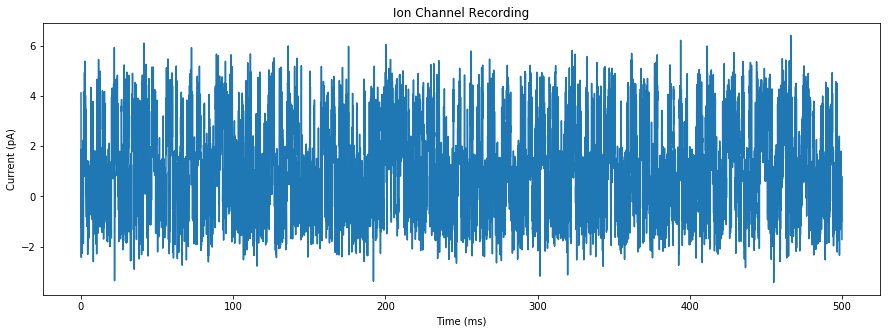

In [14]:
current_pA = np.array([ 4.11919063e+00, -2.82875946e-01,  1.86972193e+00, -4.22109890e-01,
       -2.42459179e+00,  4.42592319e-02,  3.08461816e-01,  7.33451227e-01,
       -1.15892632e+00, -1.25629909e+00,  9.60599012e-01, -1.92574529e-01,
        1.34937421e+00,  9.72716246e-01, -4.01537710e-02, -6.87629562e-02,
       -9.53686349e-01, -2.25951289e+00,  6.03227652e-01, -7.99961195e-01,
       -4.10123616e-01,  5.00376708e-01,  8.74123613e-01,  4.65546792e-02,
       -1.23740005e+00, -1.18226020e+00,  1.72535802e+00,  8.19876286e-01,
        2.23433911e+00, -9.61865777e-01,  5.96498057e-01, -1.86201144e+00,
       -1.31700840e+00,  9.19939947e-01,  2.26351177e+00,  4.15774109e+00,
        3.91266234e+00,  3.60582007e+00,  2.82836514e+00,  7.98989347e-01,
        3.19734278e+00,  3.37904251e+00,  2.09114371e+00,  4.02558882e+00,
        1.97509957e+00,  1.67168588e+00,  4.93814303e+00,  3.32433372e+00,
        3.53302014e+00,  2.71875528e+00,  2.95077883e+00,  3.11474758e+00,
        3.37542759e+00,  5.38487827e+00,  3.53814215e+00,  2.43730858e+00,
        3.70769655e+00,  3.14086208e+00,  2.14068247e+00,  4.02234473e+00,
        1.21741403e+00,  3.48585911e+00,  2.31494985e+00,  2.47354019e-01,
        4.49377236e-02,  9.18568422e-01,  7.08194595e-01,  3.41790057e-01,
        2.75855881e-01, -5.98416088e-01, -3.44047804e-01, -8.25239808e-01,
        1.08969230e+00,  6.32904110e-01,  1.17272141e+00, -3.86831628e-01,
       -1.18744748e+00, -4.04736533e-01,  5.45680591e-01,  6.43011034e-02,
        5.07955181e-01,  1.42882019e+00,  8.50844313e-01,  6.36019531e-01,
        1.04649747e+00,  6.58725190e-01,  5.28740485e-02,  4.82064327e-01,
       -2.31032426e+00,  1.26812944e+00, -1.47797310e+00, -1.93786627e+00,
       -2.07498838e+00,  7.88614402e-01,  2.46929146e-02, -5.50480853e-01,
        2.45556388e-01,  8.37712100e-01, -6.84109114e-01,  1.40679355e+00,
       -1.16514528e+00, -1.14574694e+00, -1.65495991e+00,  8.13047821e-01,
       -1.98538778e-01, -2.66844479e-01, -2.49788665e-01, -2.86649722e-01,
       -1.59905483e+00,  3.81772720e-01,  1.03350455e+00,  5.79335632e-01,
        1.14631732e+00,  7.42827419e-01,  1.20196474e+00,  3.64537122e-01,
        2.73587098e-01,  4.32187494e-01,  3.00245171e-01, -4.81155502e-01,
       -7.31947979e-01,  2.22595945e-01, -6.73362784e-01,  1.28171523e-01,
        7.32441064e-01, -2.40458184e-01,  1.65916526e-01, -7.17107253e-02,
        1.94327489e+00, -3.03208987e-01,  4.34450170e+00,  3.30355709e+00,
        2.98188187e+00,  1.65045660e+00,  3.82635035e+00,  3.31824958e+00,
        1.80442387e+00,  1.96470455e+00,  2.94897730e+00,  3.10816207e+00,
        2.63458833e+00,  2.28261857e+00,  2.98224161e+00, -9.04923271e-01,
       -1.89910847e-01,  9.60481516e-01,  2.21416736e-01, -8.06619253e-01,
        7.98787465e-01,  1.34190102e+00,  2.28561853e+00,  3.70794372e+00,
        3.38082124e+00,  1.26406370e+00,  2.62449485e+00,  1.90690978e+00,
        3.78134540e+00,  2.86430837e+00,  1.90297988e+00,  3.10592726e+00,
        9.25377189e-01,  1.54135870e+00, -2.59388583e+00, -3.96778109e-01,
        2.80539681e-01,  5.18800685e-01, -5.48608711e-01, -4.01407392e-02,
        6.76593787e-02, -9.34287233e-01, -4.89629689e-01,  7.35063798e-01,
       -3.82888446e-01,  1.17502680e+00, -5.95898379e-01,  1.38781166e+00,
        6.95531290e-01, -1.30099794e-01,  3.99090568e-01,  7.72761993e-01,
        6.96851551e-01,  1.81756594e+00, -9.61311103e-01,  9.06416885e-01,
        2.16426040e-01, -1.49789980e+00, -4.51161522e-01,  9.18200611e-01,
        2.12563204e-01,  1.13052147e-01,  3.85296112e-02, -1.37708649e+00,
        1.38793354e+00, -1.34402882e+00, -1.88870947e+00, -1.35846036e+00,
       -5.78080760e-01, -2.77516493e-01,  1.37222243e-01, -7.81344337e-01,
        3.07025734e-01,  1.04880818e+00, -2.76945436e-01,  6.52969180e-01,
       -4.35272662e-02, -4.23408613e-01, -2.28331896e+00,  2.06702779e+00,
       -1.14860632e+00,  8.99932273e-01,  4.36494364e+00,  4.38736395e+00,
        3.08013021e+00,  4.66853066e+00, -1.07889249e+00,  4.41947434e-01,
       -7.79121152e-01,  1.83141834e+00, -7.95004500e-01,  8.36746677e-01,
       -6.71640705e-01,  7.88456470e-01, -1.03119589e+00, -9.42090930e-01,
        5.11270642e-02, -2.76612201e-01, -1.45460286e+00, -3.97964294e-01,
        6.96744018e-01, -4.44732922e-01,  1.38967674e+00,  5.44975162e+00,
        3.94149945e+00,  2.77831138e+00,  2.04602379e+00,  3.99923251e+00,
        2.81393443e+00,  2.87085177e+00,  2.77540972e+00,  4.62837714e+00,
        3.18879780e+00,  2.47075461e+00,  4.69960421e+00,  2.28810968e+00,
        3.44292321e+00,  3.03428486e+00,  4.43890652e+00,  2.79934747e+00,
        2.15688622e+00, -1.19560293e+00,  1.76488284e+00,  8.28380835e-01,
       -1.21451700e+00,  4.98235348e+00,  1.37285976e+00,  1.89250081e-01,
        1.14039857e-01,  9.85230900e-01,  1.10256918e+00,  2.55564449e-01,
        2.88875747e-01,  7.80685238e-01, -8.87736958e-02,  1.94896873e+00,
        4.72787673e-01, -1.71031192e-01, -2.71294735e-01,  1.58730112e+00,
        9.72517303e-01,  1.08401314e+00,  7.16011194e-01, -3.73195232e-01,
       -1.00406078e+00, -8.89291624e-01,  1.21309700e+00,  5.30900578e-01,
       -1.42605890e+00,  5.65172505e-02, -6.24187607e-02,  1.28776093e+00,
        4.60515059e-01,  1.15096686e+00,  4.20599571e+00,  2.67916548e+00,
        2.68978475e+00,  2.72883290e+00,  3.81517474e+00,  3.17997886e+00,
        1.19196975e+00,  1.19113956e+00, -8.18385114e-02,  1.03807618e+00,
       -2.42249977e-01, -5.70061630e-01,  1.64884084e+00, -4.02855507e-01,
       -2.64884545e-02, -1.69565375e+00,  4.03269542e-01, -4.18948385e-01,
       -1.17642627e-01,  1.04753277e+00, -7.63965451e-02, -4.93716432e-01,
        2.74277735e-01, -6.11658369e-01, -1.24036509e+00,  4.46011058e-01,
        4.17458450e+00,  3.40641742e+00,  3.27372686e+00,  2.48218060e+00,
        3.45013062e+00,  3.54147647e+00,  2.76835841e+00,  3.24232669e+00,
        2.79758124e+00,  2.86146058e+00,  3.68992509e+00,  1.75168732e+00,
       -5.97053449e-01, -1.57347304e-01, -8.92811366e-01,  5.76682539e-01,
       -2.68169628e-01, -2.51476847e-01, -1.55743147e-01,  7.31037182e-01,
        1.61533021e+00,  9.83630470e-02,  3.75003214e-01,  1.41080053e+00,
       -1.33811985e-02, -1.03059338e+00,  2.90654957e-01, -4.73661065e-01,
       -3.64884105e-01,  6.07452469e-01,  1.75164414e-01, -1.18134710e-01,
       -5.85782236e-01, -2.97385432e-01,  1.29383390e+00,  7.18674714e-01,
       -1.76566996e+00, -1.30316076e+00, -1.02082069e-01, -1.10130086e+00,
       -6.71714418e-01, -1.80738700e+00, -6.57037470e-01,  3.43578717e-01,
        1.11330760e+00, -3.93484878e-01, -9.96840676e-01,  9.31160731e-01,
        1.27363370e+00, -1.53489105e+00,  1.52584925e-01,  1.88271721e+00,
       -3.44431521e-01, -1.97719363e-01,  4.29547248e-01,  4.53808844e-01,
       -1.03279187e+00,  6.34830956e-01, -1.21902439e+00, -6.64180090e-01,
       -1.97005940e-01, -3.08241305e-02, -2.83474974e-01,  2.11888684e+00,
       -6.91571135e-01,  4.70823738e-01, -5.50169683e-01,  1.41059977e+00,
       -7.91851777e-01,  5.44513364e-01,  7.66764546e-01, -4.97590591e-01,
        1.35095853e+00, -1.99237199e+00, -8.11670046e-01, -4.32444127e-01,
       -3.85197082e-01,  1.32656875e+00,  1.26639451e+00, -2.19913731e-01,
       -6.14402327e-01, -5.90659198e-02, -1.26430350e+00,  6.64051800e-01,
       -2.05570275e-01,  3.77688538e-01, -1.39190948e+00, -7.08439243e-01,
        2.71975734e-01, -3.27738873e-01, -6.84398131e-01, -1.65184980e+00,
        3.02786845e+00,  3.14483770e+00,  3.96733208e+00,  2.82591317e+00,
        1.54118277e+00,  2.08450435e+00,  2.47570267e+00,  2.84561701e+00,
        2.91031815e+00,  2.92188214e+00,  4.31353300e+00,  3.75480254e+00,
        3.45160929e+00,  3.15494604e+00,  1.82368686e+00,  2.03621665e+00,
        1.28070342e+00,  2.39330599e+00,  3.74216464e+00,  2.52216550e+00,
        7.07784953e-01,  3.34925113e+00,  3.36934643e+00,  3.67137047e+00,
        2.30803689e+00,  2.24138691e+00,  3.65308575e+00,  4.14455161e+00,
        3.21727984e+00,  4.47801380e+00,  3.54234149e+00,  3.00050862e+00,
        2.26646677e+00,  3.62200459e+00,  3.97567431e+00,  4.19070296e+00,
        3.63120647e+00,  3.03903795e+00,  5.92982253e+00,  2.16629113e+00,
        3.66081205e-01, -3.35448918e+00,  4.74691803e-01,  9.83139023e-01,
       -7.97027562e-01, -3.98825000e-01,  3.59756207e+00,  4.33784618e+00,
        4.55782270e+00,  3.82147745e+00,  3.24035556e+00,  4.45195462e+00,
        3.15371088e+00,  2.58061896e+00,  1.28735924e+00,  2.06579609e+00,
        2.54960309e+00,  2.00063244e+00,  3.97598797e+00,  1.51853190e+00,
        3.76704272e+00,  2.76540033e+00,  4.55138807e+00,  4.66477900e+00,
        2.20489412e+00,  3.19138084e+00,  3.40007841e+00,  2.59146447e+00,
        4.44030470e+00,  3.46841022e+00,  1.64679715e+00,  2.21224859e+00,
        3.73932076e+00,  2.14483159e+00,  2.92883463e+00,  8.29044019e-01,
        3.27042640e+00,  3.13715644e+00,  4.82366541e+00,  3.31885716e+00,
        1.86052413e+00,  8.76741811e-01,  2.82655952e+00,  3.70238721e+00,
        2.28574072e+00,  2.81325241e+00,  3.27625294e+00,  2.89373761e+00,
        2.65649022e+00,  1.37375443e-03,  6.70789860e-01,  1.85398574e+00,
       -5.42708897e-01,  4.48135176e-02,  1.98666132e-02,  1.04194566e+00,
       -2.18057793e-01, -1.79406139e+00, -1.02753954e+00, -1.23246776e+00,
       -2.74418586e-01,  8.19103398e-01,  1.07008997e+00,  1.19003581e-01,
        1.47284203e+00,  4.19919292e-01,  1.95669206e-01,  5.41963985e-01,
        7.26567995e-01,  1.79135204e+00, -1.06467564e-01,  3.50173460e-01,
        4.39089409e-02, -1.59252521e+00, -7.39297929e-02,  5.13903325e-01,
        1.34152837e+00, -9.17966242e-01, -1.68292599e+00,  1.72452931e+00,
        1.31998185e+00, -2.77179592e-02,  6.55510511e-01, -1.06567922e+00,
        1.75334867e+00,  6.83133948e-02, -1.06936487e-01, -5.56217233e-01,
        3.08805285e+00,  3.17668708e+00,  3.52945527e+00,  3.59993386e+00,
        3.38147213e+00,  3.85979581e+00,  2.89510323e+00,  2.91389957e+00,
        1.15219469e+00,  1.10116345e-01, -1.06820571e+00,  1.23859949e+00,
        3.61143726e-02, -1.42574513e-01, -1.51786741e+00,  1.03748454e+00,
        4.18365326e-02,  3.14311336e-03,  9.35810560e-01, -1.68428139e+00,
        5.48706491e-01, -1.54811664e+00, -2.12060784e+00, -1.51818658e+00,
       -6.03729196e-01, -1.44625425e-01,  2.07993065e+00,  5.57050145e-01,
        2.46330740e-01, -8.18333430e-01,  3.97904575e-01, -1.75823411e+00,
        8.11164961e-01,  1.53750167e+00,  3.72599045e+00,  3.35255575e+00,
        2.86250075e+00,  2.16886308e+00,  2.25372047e+00,  3.10191816e+00,
        5.23587181e+00,  2.18075705e+00,  2.13531944e+00,  2.18372374e+00,
        2.15057231e+00,  1.59694870e+00, -5.26622165e-01,  1.41150473e-01,
       -1.06974422e+00,  9.88484776e-01, -1.37581502e+00,  7.91966667e-01,
       -2.39932094e-01,  3.50705807e-01,  2.18910588e+00,  3.14760119e+00,
        3.09780659e+00,  4.67597109e+00, -1.54105483e+00, -4.47893071e-01,
        1.70065968e-01,  1.19483653e+00,  4.79454548e-01,  2.09357780e-01,
        1.86683968e+00,  6.05137964e-01,  1.21152681e+00, -1.85532303e+00,
       -9.65546445e-01, -1.62167970e-01,  1.58085325e+00,  2.44338404e+00,
        7.10296819e-02,  2.44085984e-01,  1.78063042e-01, -3.57562318e-01,
       -1.82678001e+00,  4.94404485e+00,  6.62099138e-01,  2.45604718e+00,
        3.14011274e+00,  2.26955766e+00,  1.68146367e+00,  2.70589788e+00,
        2.47714417e+00,  3.89576453e+00,  2.95404256e+00,  2.68429596e+00,
        2.91086275e+00,  1.32029404e+00,  1.86643316e+00,  1.51899299e+00,
        3.80566020e+00,  2.29772578e+00,  3.60106640e+00,  1.91316324e+00,
        4.37659879e+00,  2.34691933e+00,  4.30025888e+00,  2.52840143e+00,
        4.82205238e+00,  1.12420441e+00, -6.15175518e-01, -1.41373255e+00,
       -6.61376540e-01,  4.28599460e-01,  1.11879341e+00,  7.79607850e-01,
       -1.08655032e+00, -2.72346813e-01, -2.40586203e-01,  8.29588523e-01,
       -4.41317824e-01, -4.02190876e-01, -8.84297763e-01,  1.10750396e+00,
       -8.03927995e-01, -4.44158148e-01, -6.95503653e-01, -1.38511661e+00,
        1.25231813e+00,  5.39970489e-01, -2.08044359e-01, -2.55729476e+00,
        1.23125157e+00, -2.58317979e-01, -2.51877814e+00,  3.66479211e-01,
        1.61272230e-01,  2.71205284e-01, -2.55106218e+00,  1.70851390e+00,
       -1.93875701e-01, -1.50675942e+00, -2.52995250e+00,  1.26659953e+00,
       -1.32048913e+00,  3.21585304e+00,  2.70112097e+00,  2.16604332e+00,
        4.07108221e+00,  3.69107218e+00,  3.24099996e+00,  2.37193267e+00,
        3.42629061e+00,  2.02326760e+00,  3.76038579e+00,  3.34391409e+00,
        4.10308586e+00,  4.89953789e+00,  3.43244790e+00,  2.44163687e+00,
        3.07370277e+00,  3.23815937e+00,  3.06658547e+00,  2.88544756e+00,
        3.88553886e+00,  1.78527957e+00,  1.98607597e+00,  3.85583235e+00,
        3.79674366e+00,  2.53054170e+00,  3.23745954e+00,  2.34436214e+00,
        1.03125674e+00,  1.48334244e+00,  8.49114470e-01,  1.96976674e-01,
       -1.33765317e+00,  3.30713352e-01,  1.32213466e-01, -8.20860796e-01,
       -2.89494324e+00,  2.18432818e+00,  3.06480624e+00,  3.05754820e+00,
       -1.17544557e+00, -6.48867277e-01,  6.09992840e-01, -3.99697815e-02,
       -4.20324509e-01,  1.46714821e+00,  2.24004118e-01,  3.42048064e-01,
        2.88352262e+00,  4.54139081e+00,  3.46122535e+00,  3.07187520e+00,
        3.21020912e+00,  1.87050246e+00,  2.56646574e+00,  2.46077859e+00,
        2.64273997e+00,  2.75013045e+00,  2.99126681e+00,  2.63787609e+00,
        4.46873091e+00,  3.54978245e+00,  4.15463815e-01, -1.12636556e+00,
        3.08525194e-01, -1.71769037e+00,  1.28263479e+00, -7.79325109e-01,
       -7.82834033e-02,  9.13000295e-01, -2.41506659e-01,  8.33036651e-01,
        6.42868671e-02,  3.22699469e+00,  2.96401057e+00,  3.18696278e+00,
        2.03155165e+00,  2.76277739e+00,  2.50879138e+00,  2.98354148e+00,
        2.48690369e+00,  1.58454036e+00,  3.68069353e+00,  2.23789642e+00,
        2.81107051e+00,  3.91469865e+00,  1.74374147e+00,  3.06414925e+00,
        3.12281268e+00,  2.23652188e+00,  2.00898566e+00,  1.49077992e+00,
        2.13724558e+00, -8.07216095e-01,  1.42891433e+00,  1.62132430e+00,
       -2.13668703e-02,  1.05950453e+00, -8.77268245e-01, -3.52268122e-01,
        2.35932833e-01, -2.48674099e+00, -2.43211758e+00,  1.27915084e-01,
       -1.70763316e-01, -4.46510554e-01, -1.91734026e+00,  3.83282989e+00,
        3.58836304e+00,  2.15412261e+00,  3.35682868e+00,  2.50358494e+00,
        2.87232355e+00,  3.75086344e+00,  2.63216516e+00,  3.74452172e+00,
        2.35521145e+00,  3.35740233e+00,  2.13998428e+00,  2.00562482e+00,
        2.38978015e+00,  3.21308073e+00,  2.28912607e+00,  1.94326885e+00,
        3.54796683e+00,  3.03808710e+00,  3.43368222e+00, -3.03647716e-01,
        5.65515437e-01, -1.94023521e-01,  3.10644342e-01,  1.30904657e+00,
       -2.31467204e+00, -1.27694984e-01, -4.51771171e-02, -3.00494405e-01,
        3.05823218e+00,  4.02070126e+00,  4.01672919e+00,  1.92784140e+00,
        3.12874119e+00,  2.67391095e+00,  4.83067864e+00,  3.66440125e+00,
        4.57632624e+00,  2.08707194e-01, -8.71274669e-01,  3.02480030e-01,
        1.01770442e+00, -1.26050324e+00, -5.46059600e-01, -2.14566046e+00,
        5.07241079e-01,  8.65100580e-02, -6.39847551e-01,  7.90747695e-01,
        2.77311548e-01,  1.28026985e+00,  2.80890507e+00,  3.30920956e+00,
        2.70486057e+00,  1.03848221e+00,  2.59356871e+00,  6.10499682e+00,
        4.42497623e+00,  2.82304505e+00,  1.08062715e+00,  1.47995214e+00,
        1.81141055e+00,  3.26851545e+00,  1.85930249e+00,  2.96213848e+00,
        1.03883868e+00,  2.34076608e+00,  4.63341733e+00,  5.17664366e-01,
        3.28721964e+00,  1.85883103e+00,  3.52194925e+00,  9.37725775e-02,
        4.03657541e-01,  2.97412259e+00,  2.49501040e+00,  2.92947385e+00,
        2.56880920e+00,  3.59142188e+00,  2.92235955e+00,  3.33608174e+00,
        1.76372771e+00,  3.65992993e+00,  2.99607060e+00,  5.25874714e+00,
        2.02362295e+00,  4.39351387e+00,  2.91237379e+00,  3.80808173e+00,
        2.63707222e+00,  2.20801471e+00,  2.94662499e+00,  3.90703835e+00,
        2.36246059e+00,  2.83828329e+00,  6.71192249e-03,  9.46507860e-01,
       -1.65732319e+00, -7.92009204e-01,  5.26993260e-01,  3.08808731e+00,
        3.66140463e+00,  2.64874149e+00,  2.75646274e+00,  2.61775866e+00,
        2.78384589e+00,  1.76707722e+00,  9.19840230e-01, -2.97654630e-01,
        1.45157705e+00,  3.36628618e+00, -2.36876197e+00,  5.10761038e-01,
        1.60041350e+00,  1.20669769e+00,  8.21864405e-01,  3.49079152e+00,
        4.45143613e+00,  2.76207664e+00,  2.42396095e+00,  3.44792658e+00,
        4.69177675e+00,  4.66611522e+00,  3.41836075e-01, -1.00498522e+00,
       -1.10801700e+00,  3.11010770e-01,  3.08046167e-01,  9.99805790e-01,
       -3.44841528e-01,  1.50602831e+00,  8.90334889e-01, -1.11005620e+00,
       -1.62362474e-01, -2.56356580e-01, -3.28842098e-02, -2.28020157e-01,
        7.12657992e-01,  4.51228702e-01, -3.99366282e-01, -3.73451340e-01,
        6.09555960e-01,  7.68969603e-01,  1.03456097e-01,  6.39287459e-01,
       -1.13597406e+00,  1.31777654e+00,  1.94467442e-01, -9.13841656e-01,
       -2.36574880e-01,  2.53728510e-01, -3.88253685e-01,  1.31991009e+00,
       -7.87880881e-01,  2.00998324e+00, -1.40384364e-01,  3.38571330e+00,
        2.07010425e+00,  4.06187928e+00,  2.99460109e+00,  3.13629748e+00,
        2.47573347e+00,  5.15321195e+00,  2.83498570e+00,  2.56852336e+00,
        2.67994711e+00,  3.55503173e+00,  1.65988054e+00,  3.64078093e+00,
        1.79939211e+00,  1.76416728e+00,  3.14433992e+00,  1.57303076e+00,
        2.70080276e+00,  2.68130121e+00,  3.08205826e+00,  3.45912084e+00,
        3.64329244e+00,  2.82465811e+00,  5.15036089e+00,  1.76009140e+00,
        1.71276233e+00,  2.83055867e+00,  2.35478013e+00,  3.41425340e+00,
        2.97265380e+00,  3.25836243e+00,  9.88901700e-01,  2.56172707e+00,
        2.43280225e+00,  2.37384714e+00,  2.03451212e+00,  3.67143524e+00,
        2.88760594e+00,  2.86146209e+00,  4.23052328e+00,  3.72167798e+00,
        1.54760852e+00,  3.32230864e+00,  2.86170574e+00,  4.24753732e+00,
        3.25844559e+00,  2.84571770e+00,  3.96104637e+00,  8.30512900e-01,
        2.34553053e+00,  2.44718704e+00,  4.19947965e+00,  3.09343386e+00,
        3.43913374e+00, -1.46024929e+00,  3.93652245e-01,  6.22192202e-01,
       -6.73671321e-01,  2.72042728e-01,  2.42270176e+00,  3.76417121e+00,
        2.56243818e+00,  1.96282356e+00,  1.43771028e+00,  1.48407346e+00,
        3.53924974e+00,  2.06949259e+00,  2.97547090e+00,  3.38724392e+00,
        2.30833276e+00,  3.82902134e+00,  5.54364761e-01, -3.47961612e-01,
        1.17006981e+00, -1.27427583e+00, -2.90221639e-01,  1.11485121e-01,
       -1.48289968e+00, -2.83105447e-02, -1.50034309e+00, -2.20496449e+00,
        8.58284962e-01,  1.86815639e-01,  3.86427007e-01, -6.65394142e-01,
       -7.49582049e-01,  1.47108406e-01,  3.85887705e-01, -6.60885485e-01,
        5.81313299e-02, -1.15236508e+00,  1.56497555e+00,  1.07628958e+00,
        1.64320901e+00,  2.33642846e-01, -1.60178790e+00,  1.30466772e+00,
       -6.54991523e-01,  1.24311188e+00,  1.31906089e+00,  4.93305859e-01,
        2.13493309e-01, -7.43493029e-01,  3.87267695e-01,  2.33753964e+00,
        5.78269124e-01, -3.30700505e-01, -1.78802009e-02,  4.61211229e-01,
       -6.56827988e-01, -8.17170480e-01, -1.93555128e-01,  1.19010157e+00,
        7.81698251e-01,  6.63064755e-01,  3.91583411e-01,  1.41591896e+00,
        1.18311312e-01,  5.76621569e-01, -7.98209387e-01, -8.04134250e-01,
        3.46558826e-01, -5.99133023e-01,  1.07905394e+00, -4.01626424e-01,
        8.81694622e-02, -3.33428977e-02, -9.73905927e-01, -2.13539556e-01,
        9.50889432e-01, -1.06202156e+00, -1.23716903e+00, -8.58507101e-01,
        2.90214210e-01, -1.00375119e+00,  7.78907562e-01,  1.02403411e+00,
        3.61383171e-01,  3.58628435e-01,  1.49423813e+00,  1.26762273e+00,
        1.48964085e+00,  4.97876577e-01,  2.75119373e-01, -9.79176459e-01,
       -1.91247508e-01,  4.58212169e-01,  8.09977809e-01, -2.05741699e+00,
        1.08269413e-01, -3.77885658e-01,  7.00834293e-01, -1.14964163e+00,
        1.06614390e+00,  3.20532081e+00, -1.26481310e+00,  1.14379732e-01,
       -1.33864624e+00, -1.36770852e+00, -5.33912611e-01, -2.56171656e-01,
        1.50588065e+00,  1.13502676e+00, -7.52471168e-01,  1.59437060e-01,
       -1.17554718e+00, -6.82794408e-02,  1.24612559e+00,  8.70589099e-01,
       -1.13918924e+00,  2.20184552e-01, -2.25091640e-01, -4.62605048e-01,
       -1.64615553e+00, -1.18754991e+00, -1.45276998e+00, -4.46938032e-01,
       -1.26860402e-01,  1.12806830e+00, -5.93282851e-01, -8.13003609e-01,
       -7.32633763e-01,  6.18595071e-01, -1.12045580e+00,  6.32584637e-02,
        5.97653579e-01, -1.18804053e+00,  8.71408986e-01, -7.16923166e-01,
       -8.90114395e-01,  3.91358255e+00,  2.26593307e+00,  1.66584405e+00,
        3.87207866e+00,  2.19255007e+00,  3.47835654e+00,  5.12210120e+00,
        3.52426994e+00,  4.24644551e+00,  2.55405895e+00,  3.27080627e+00,
        2.36297272e+00,  4.20974497e+00,  3.63354513e+00,  2.48447203e+00,
        2.55772584e+00,  3.28019706e+00,  4.37401797e+00,  4.18325217e+00,
        1.99880477e+00,  4.37564166e+00,  2.36038544e+00,  3.33769767e+00,
        2.21714324e+00,  3.23954433e+00,  2.45230544e+00,  5.47396392e+00,
        3.00889592e+00,  3.62045087e+00,  1.38469685e+00,  1.11379604e+00,
        2.91319988e-01, -1.71190229e+00, -2.68870975e-01,  9.81015959e-01,
       -3.10558359e-02, -8.22548220e-01, -7.24360058e-01, -7.96229597e-01,
       -9.91493169e-01, -5.99774299e-01, -2.26505961e-01, -5.10305566e-01,
       -2.28209597e+00,  4.90081851e-01, -1.38575553e+00, -6.08213053e-01,
       -1.84071128e+00,  5.76622109e-02, -1.37457725e+00, -9.28856244e-01,
       -1.24527007e+00,  1.81964138e+00,  3.30221291e+00,  4.64992935e+00,
        1.77375746e+00,  1.55661053e+00, -5.00433094e-01,  2.75641129e+00,
        2.90988765e+00,  1.60369451e+00,  3.72751565e+00,  3.39161044e+00,
        3.44776469e+00,  2.25181169e+00,  2.91917096e+00,  4.60264957e+00,
        2.35106867e+00,  2.92569672e+00,  4.10567831e+00,  4.35548538e+00,
        2.53491047e+00,  3.76852793e+00,  1.90040434e+00,  3.38999298e+00,
        1.79937856e+00,  3.56250629e+00,  2.00642482e+00,  3.63769142e+00,
        4.91882673e+00,  2.48765877e+00,  2.80711968e+00,  2.39635978e+00,
        4.47661020e+00,  2.36911123e+00,  4.38515299e+00,  3.00783525e+00,
        3.25137899e+00,  1.78346373e+00, -6.25539469e-01,  4.10084572e-02,
       -6.77150946e-01, -2.26068185e-02,  1.77263306e-01,  8.44907412e-01,
       -2.22337115e+00,  9.53403382e-01,  1.75976143e+00, -2.44751048e+00,
       -7.73843886e-01,  1.38513154e+00, -1.44644894e+00, -1.53887095e+00,
       -2.92928814e-01, -1.16536986e+00,  6.40000963e-01,  4.03401962e-01,
       -2.07767863e-01,  8.99440422e-01,  1.44079890e+00,  1.14523221e+00,
        1.45342713e+00,  3.82756450e-01,  1.81905640e+00, -1.36094352e+00,
        8.84102127e-01, -9.22953358e-04,  8.68899985e-01, -1.57685998e+00,
        1.83937447e-01, -1.72353105e+00, -1.91390012e+00, -4.51033988e-01,
       -3.59086156e-01,  3.37252298e-02, -1.31683874e-01,  2.53359100e+00,
        3.89497513e+00,  4.87143690e+00,  3.44170233e+00,  4.90048001e+00,
        3.32593204e+00,  2.01292480e+00,  3.02805072e+00,  2.97337687e+00,
        5.19222011e+00,  2.14432172e+00,  3.81924709e+00,  3.00167482e+00,
        3.87883050e+00,  3.04945525e+00,  1.47961697e+00,  2.17966762e+00,
        1.68206835e+00,  3.89880412e+00,  4.60176365e+00,  1.43917492e+00,
        2.97173430e+00,  3.11732889e+00, -2.47324600e+00, -6.53246254e-01,
        1.34500794e+00,  6.47987350e-01,  4.31237906e-01,  2.77416015e-01,
       -1.35328905e+00,  7.57044613e-01, -4.06911599e-01, -6.30954562e-01,
       -9.05929220e-01, -3.75895583e-01,  1.03232498e+00,  1.54357634e+00,
        1.58534240e+00, -5.95958575e-01,  6.75723277e-01,  6.00176224e-01,
       -2.22746837e+00, -8.18781537e-01,  1.22637397e+00,  2.70009335e-01,
       -2.14344470e+00,  5.34839947e-01, -7.19154546e-01,  1.14645454e+00,
        1.45501052e+00, -6.26952406e-01, -6.83290192e-01,  1.13801852e+00,
       -5.58570335e-01,  9.44685269e-01,  1.50302424e+00,  1.12807320e+00,
       -1.51940254e+00, -5.70889899e-01,  1.72501934e+00,  7.16726733e-02,
        7.31708850e-01, -5.09123120e-01, -2.54380644e-01,  2.01270084e+00,
       -1.32333241e+00,  3.15908576e+00,  2.46255447e+00,  3.36846442e+00,
        2.97188010e+00,  2.40506795e+00,  3.65790239e+00,  2.67936917e+00,
        2.57229651e+00,  1.50236983e+00,  4.14761303e+00, -4.29528035e-01,
       -3.94647226e-02, -6.95939092e-01, -4.54847395e-01,  9.89893442e-01,
       -4.24628417e-01, -2.80939008e-01, -1.78971250e+00,  6.09518855e-01,
       -6.52381637e-01, -1.27406613e+00, -2.73554293e+00,  9.34549204e-01,
       -2.92780135e-01,  3.77707752e-01, -2.07846021e-01,  3.11248433e-01,
       -7.43544374e-01,  3.03245434e-02,  3.55538791e+00,  2.84480517e+00,
        2.70433209e+00,  3.92197425e+00,  3.03119726e+00,  1.59345162e+00,
        1.16320495e+00,  3.30330759e-01,  1.50512745e+00, -3.46111504e-01,
       -6.31331819e-01,  8.23412300e-01,  5.85955863e-02, -1.24148447e+00,
        3.19791099e-01, -5.24627079e-01,  1.52642097e+00,  9.09222018e-01,
        3.56515274e-01,  5.26860556e-01, -1.54087738e+00, -1.78998335e+00,
       -6.13666838e-01, -5.23856687e-01, -1.18657256e-01, -7.67102170e-01,
        7.86758540e-01,  5.47326193e-01, -6.79398834e-01,  8.85242152e-01,
       -4.91380138e-02,  1.25445680e+00, -6.55367114e-01,  1.05250148e-01,
       -1.02328157e+00, -1.42515762e-01, -1.26265729e+00, -5.78255514e-01,
        8.30325100e-01,  1.22983106e+00,  1.59072810e+00,  2.17753270e-01,
        1.72011386e-01,  3.09389231e-01,  5.29544725e-01,  4.62641665e-01,
        2.11177974e-01, -2.52676751e+00, -7.07948468e-01, -7.36066789e-01,
        2.83951137e-01, -1.60085173e+00,  3.83554902e+00,  3.10524600e+00,
        2.70655208e+00,  2.03338440e+00,  3.06502980e+00,  3.14348633e+00,
        2.78804625e+00,  2.14368164e+00,  2.83648720e+00,  3.15739662e+00,
        3.67814712e+00,  3.79212374e+00,  2.51711531e+00,  2.68246270e+00,
        1.21090303e+00,  2.54769374e+00,  1.69882921e+00,  3.25560428e+00,
        2.92297649e+00,  3.61190197e+00, -1.99036475e+00,  8.97834492e-01,
       -3.83694805e-01,  8.44373973e-01,  4.58455287e-01, -9.92287356e-01,
        8.30235369e-01,  2.40552904e+00,  4.02106496e+00,  2.16477742e+00,
        2.04771132e+00,  3.58693131e+00,  3.89174566e+00,  3.98570962e+00,
        3.33360385e+00,  4.40809149e+00,  4.28459949e+00,  3.72703939e+00,
        3.70458794e+00,  3.64469518e+00,  4.87746189e+00,  2.98763521e+00,
        2.78100707e+00,  2.29606828e+00,  3.23922207e+00,  2.57074020e+00,
        1.47051216e+00,  3.96437200e+00,  1.82642599e+00,  3.48229261e+00,
        3.53769528e+00,  5.04720007e+00,  3.46688710e+00,  1.88585123e+00,
        3.22919841e+00,  3.26542283e+00,  2.43622418e+00,  4.28196693e+00,
        3.22634825e+00,  4.78358814e+00,  4.62851641e-01,  3.96711415e+00,
        5.91932150e+00,  3.08036247e+00,  4.07815307e+00,  2.63373980e+00,
        4.17185101e+00,  3.13163635e+00,  3.37726229e+00,  2.59077411e+00,
        3.81411417e+00,  3.26432916e+00,  3.55741529e+00,  5.74532806e-01,
        2.55999671e+00,  4.06192175e+00, -8.90351213e-01,  1.07225358e+00,
       -9.59171849e-01,  2.30951979e-01, -3.05038618e-01, -8.97130103e-01,
        7.18088656e-01,  5.83877512e-01, -8.22363640e-01, -4.57830402e-01,
        7.46854012e-01, -1.60810726e-01, -1.45346104e-01,  2.89943846e-01,
        2.45449943e-01,  4.97277384e-01,  6.77175084e-01, -1.88448480e+00,
       -1.05855770e+00, -1.28265695e+00,  6.13190418e-01, -7.64722349e-01,
        9.22786397e-01,  3.63884403e-01, -1.12773752e+00,  2.36885649e+00,
        1.27374574e-01,  1.76815942e+00, -8.69986095e-02,  7.64875673e-01,
        1.27945348e-01,  8.05350285e-01, -1.36809815e+00,  4.18948214e-01,
        5.69924778e-01,  6.01290532e-01, -1.66790497e+00,  1.29241862e+00,
        3.87332513e-01,  2.27273094e-02,  7.88534629e-01,  6.70067006e-01,
       -1.65207797e-01,  3.95248168e-01,  1.75599689e+00, -2.42825075e-01,
       -1.91069875e+00,  1.05721552e+00,  2.20539189e-01, -1.27469667e+00,
       -1.18481497e+00,  3.90683875e-01,  9.16842677e-01,  1.49631070e+00,
        4.53479769e-01,  2.37837080e+00, -1.91416572e+00,  1.76974921e+00,
        3.91204461e+00,  2.21875535e+00,  3.57850846e+00,  3.67016059e+00,
        4.78258185e+00,  4.58978114e+00,  3.25859969e+00,  4.12791059e+00,
        1.24180965e+00,  1.40703946e+00,  3.76653291e+00,  1.22798990e+00,
        3.54863917e+00,  3.57414022e+00,  3.97903389e+00,  2.48480359e+00,
        4.35681324e+00,  3.77319268e+00,  2.63061501e+00,  4.52274265e+00,
        2.60931539e+00,  4.25256002e+00,  3.19706306e+00,  4.17787612e+00,
        3.16983958e+00,  2.46844003e+00,  3.29894143e+00,  3.36474623e+00,
        3.08641570e+00,  2.34285971e+00,  4.35926539e+00,  3.75171573e+00,
        5.18491796e+00,  4.39724121e+00,  4.16238077e+00,  2.28185287e+00,
        3.05652043e+00,  3.59839875e+00,  1.47478716e+00,  2.47465305e+00,
        3.94254725e+00,  2.44018595e+00,  3.86761635e+00,  3.48056624e+00,
        4.06553819e+00,  1.91838486e+00,  2.08779624e+00,  2.88821952e+00,
        3.21766575e+00,  3.23108838e+00,  8.47334255e-01,  8.10163564e-01,
       -2.15021637e+00,  4.86214180e-01,  1.75013089e+00, -1.52984251e+00,
       -4.03099247e-01, -7.17771755e-01,  9.40938323e-01, -1.94134083e+00,
        4.84082766e-01, -1.71667759e+00, -1.81477428e-01,  3.22463318e-01,
       -4.30761384e-01,  1.08905866e+00, -3.15746538e-01, -1.77627730e+00,
       -6.26699503e-02, -5.55851020e-01,  8.75464506e-01, -1.11587347e+00,
       -3.76801432e-01,  1.31561610e+00,  5.39934244e-01,  3.21160085e-01,
       -7.77962040e-01, -1.07523765e+00,  1.63894216e-01,  1.34523647e+00,
       -9.25123958e-01, -7.49418378e-01,  1.48353386e+00,  1.13066592e+00,
       -1.59580375e+00, -3.89515026e-01,  2.04647024e+00,  2.49339573e-01,
       -4.75016242e-01, -5.10254084e-01, -8.96255335e-01, -1.17423464e+00,
        1.71558937e+00,  2.64295987e+00,  1.47500130e+00,  1.71716241e+00,
        3.65499393e+00,  2.69564950e+00,  3.71449645e+00, -1.70270476e-01,
       -5.83520809e-01,  9.19968999e-01,  3.95344468e-01,  4.95380081e-01,
       -6.55623441e-01,  1.17889792e+00,  1.10411089e+00,  8.93057228e-01,
       -2.26046688e-01, -1.00802784e-01, -8.71755882e-02, -8.85627287e-01,
        7.93909838e-01,  2.10138828e+00,  1.92947071e-01,  1.27252875e+00,
        4.62524288e-01,  7.00700676e-01, -6.32175899e-02,  1.02667948e+00,
        5.31966345e-01,  4.07184354e-01,  1.39358508e+00,  6.05371129e-01,
       -6.35680802e-01, -1.50614488e+00,  2.42748990e+00,  2.51466793e+00,
        1.66823980e+00, -7.20478261e-01, -5.13742156e-01, -6.18407997e-02,
        7.82507219e-01,  1.09908036e+00,  1.97645797e+00, -1.38074379e+00,
        2.02082625e+00,  1.29307262e+00,  1.14685244e+00, -1.10707529e+00,
       -1.86311577e-01, -1.49644279e+00, -5.29403763e-01,  1.70990655e+00,
        2.84488174e-01, -1.60375904e+00,  1.18021714e+00, -9.18326153e-01,
       -5.24556717e-01, -1.35986737e+00, -2.60411107e+00,  3.21114275e-01,
       -2.36968176e+00, -1.37188815e+00, -5.05956001e-01,  1.62871534e+00,
        2.30777659e+00,  4.03031179e+00,  4.05780833e+00,  2.02645279e+00,
        1.41399441e+00,  1.43969118e+00,  1.80335096e+00,  1.33551204e+00,
        2.75733355e+00,  2.02228511e+00,  3.09889527e+00,  1.67972224e+00,
        7.94327907e-01, -6.38197148e-01,  1.97616924e+00,  1.16421627e+00,
        3.35550557e-01, -3.99641923e-01,  9.72730263e-01,  1.24276908e+00,
       -3.02262426e-01,  2.11583461e+00,  3.81638200e-01,  5.41596082e-01,
       -7.97060762e-01,  6.44864198e-01,  8.60291966e-01,  5.40964547e-01,
        1.66319820e+00, -1.90726839e+00,  3.05879474e-01,  1.48084815e+00,
       -2.18403027e-01, -4.90543891e-01, -4.84394054e-01, -1.05088228e+00,
        6.86764441e-01, -1.40615153e+00, -6.85149474e-01, -1.05595578e+00,
        1.88585592e+00,  5.18734280e-01,  1.45910114e+00, -1.74200916e+00,
        4.47339608e-01, -2.01459107e+00, -4.26136569e-01, -1.17268897e-01,
       -6.02751789e-01, -5.35185764e-01, -1.50516947e+00, -1.05436182e+00,
       -1.12565214e+00, -7.70277577e-02, -1.40178386e-01,  3.92947933e-01,
        2.61225573e-02,  2.37951994e+00,  2.42452133e+00,  2.80961308e+00,
        2.72154881e+00,  3.86148075e-01, -1.02613767e-01,  1.99402805e+00,
        9.74170668e-01,  8.12829245e-01,  1.08790361e+00,  1.64331021e+00,
       -4.84653914e-02, -3.42772694e-01, -8.28648953e-01, -7.91548268e-01,
       -5.59170219e-01,  6.34506204e-01, -3.09089696e-01,  5.51445853e-01,
        2.33733436e-01, -8.93986563e-01,  6.10747967e-01, -1.11910489e+00,
        4.92509524e-01,  8.44772765e-02, -1.24384742e+00, -9.15043696e-02,
        2.36601563e+00,  3.47898189e+00,  2.56572082e+00,  4.39453693e+00,
        3.46074088e+00,  4.33078728e+00,  2.28244821e+00,  4.31556094e+00,
        2.24000530e+00,  1.76887962e+00,  9.57662010e-01,  1.89537618e+00,
        3.28960733e+00,  4.39593692e+00,  2.21187016e+00,  3.83654887e+00,
        5.66826167e+00,  1.77253971e+00,  2.99683310e+00,  7.98402685e-01,
        4.22267858e+00,  2.41249070e+00,  2.13453401e+00,  3.05095425e+00,
        4.58619286e+00,  4.01637692e-01,  3.88737633e+00,  2.83566856e+00,
        4.67978945e+00,  2.84623521e+00,  3.64082188e+00,  3.44099070e+00,
        3.22922893e+00,  3.87848698e+00,  2.82460733e+00,  4.32108173e+00,
        4.32597080e+00,  3.81229945e+00,  3.95758126e+00,  4.07324863e+00,
        5.60214458e+00,  4.87280035e+00,  3.31870633e+00,  4.01664566e+00,
        3.10549277e+00,  3.54930096e+00,  4.20082316e+00,  3.73232423e+00,
        5.38878244e-01, -2.98044728e-01, -1.04319625e-02, -1.28407978e-01,
        1.16889835e+00, -1.00889569e+00, -5.56540375e-01,  3.41071447e+00,
        3.43324560e+00,  3.38503118e+00,  4.79066674e+00,  2.92878763e+00,
        2.04650343e+00,  2.56837857e+00,  2.78787496e+00,  1.05129763e+00,
        4.29649997e+00,  2.85319186e+00,  1.67708629e+00,  3.06508260e+00,
        3.42378572e+00,  3.86139332e+00,  1.64829338e+00,  1.87006928e+00,
        3.31501289e+00,  2.39149372e+00,  4.13270508e+00,  2.83499021e+00,
        1.98906630e+00,  2.32255496e+00,  3.04537003e+00,  4.21662211e+00,
        3.12286349e+00,  4.29370799e+00,  4.55912569e+00,  2.63883878e+00,
        2.80031441e+00,  2.83711650e+00,  2.35697552e+00,  3.14217254e+00,
        3.43504686e+00,  3.75774959e+00,  3.13284402e+00,  4.76050962e+00,
        3.73216899e+00,  3.23494182e+00,  4.31219646e+00,  2.36419855e+00,
        1.06064800e+00, -2.08476888e-01,  2.82810760e-01,  4.63465562e-01,
       -1.79613902e-01,  1.10895125e+00,  9.41696642e-01,  7.03330227e-01,
       -1.33857542e+00, -1.11232909e-01,  3.36420640e-02, -1.49024794e-01,
       -6.76406250e-01, -3.53828979e-01, -1.73612089e+00, -5.23247318e-01,
        2.85225340e-01, -8.80287054e-01, -3.68484080e-01, -2.40227379e-01,
       -8.62731391e-01,  4.03617373e-01,  3.63583597e+00,  4.50537108e+00,
        2.68347032e+00,  3.84144384e+00,  3.54173790e+00,  3.32611313e+00,
        3.39193247e+00,  2.81882885e+00,  3.16068407e+00,  1.35640883e-01,
       -4.95373108e-01, -6.05331149e-01,  5.71970904e-01, -8.54075777e-01,
       -4.51945877e-01,  2.13639711e+00,  5.38172710e+00,  1.80894797e+00,
        3.04030786e+00,  3.86530693e+00,  3.56677894e+00,  3.11769211e+00,
        1.21073437e+00,  4.48978266e+00,  2.86737405e+00, -1.47417843e+00,
       -1.10625654e+00,  6.57178477e-01,  6.30276445e-01, -7.67472408e-01,
        1.07170968e+00,  1.99055339e+00, -4.33780874e-01, -2.33494419e-01,
        7.41484151e-02,  4.02897811e-01,  4.18686727e+00,  1.63096588e+00,
        1.39172688e+00,  1.49698551e+00,  2.64766906e+00,  2.65684749e+00,
        3.74230405e+00,  3.37808443e+00,  3.87445978e+00,  2.51327422e+00,
        2.66693242e+00,  4.06675659e+00,  3.64904234e+00,  2.68211609e+00,
        2.62272264e+00,  1.84003451e+00,  1.78728470e+00,  3.29457114e+00,
        3.08258239e+00,  6.91998121e-01,  2.75255965e+00,  2.80005909e+00,
        2.28949254e+00,  2.48439300e+00,  3.88180199e+00, -3.90920300e-01,
        7.66816597e-01, -6.93406714e-01,  6.43732499e-01,  1.16543258e+00,
        2.12025956e-01,  1.66514458e+00,  8.77127714e-01,  1.73630596e-01,
        2.66204941e+00, -5.93652592e-01,  3.05127064e-01, -3.93770913e-01,
        1.05159806e+00,  3.80148697e-01,  3.42483744e+00,  4.86212674e+00,
        2.71902646e+00,  2.78010514e+00,  3.00763191e+00,  4.70021215e+00,
        2.20074203e+00,  2.69528947e+00,  3.61752298e+00,  4.44075424e+00,
        3.97081116e+00,  3.42332488e+00,  2.52587178e+00,  3.85704075e+00,
        5.63850523e+00,  2.02762690e+00,  3.30050232e+00,  2.46311571e+00,
        3.31393652e+00,  1.97244176e+00,  2.42116227e+00,  2.62300961e+00,
        3.38898350e+00,  3.31822464e+00, -1.80136538e+00, -2.82079787e-01,
       -8.58408375e-01, -9.05551883e-01, -5.11455974e-01,  1.30502570e+00,
        5.16084352e+00,  2.79208325e+00,  2.65892893e+00, -7.22953391e-01,
        1.20234599e+00, -1.01226967e-01, -1.63602698e+00,  4.09911913e-02,
       -3.79681142e-01, -1.38377391e+00, -4.78069538e-01, -1.25807884e+00,
       -5.94091835e-01,  8.63233936e-02, -7.60007437e-01, -1.01199871e+00,
        2.35875317e+00,  1.60257142e+00,  1.73417786e+00,  4.42740760e-01,
        4.18921123e-01,  1.64970176e-01,  2.83206113e-01,  4.11752019e-01,
       -1.20670106e-02, -1.33646652e+00,  9.68514323e-01, -2.87615600e-01,
        3.01150915e+00,  3.96524629e-01, -1.54977705e+00,  1.07070275e+00,
       -1.86182042e+00, -2.14911860e-01, -2.57583218e-01, -7.91591149e-01,
        2.40737731e+00,  3.63134897e-01,  1.07024280e+00,  9.64779376e-03,
        2.19884842e-01,  1.16149058e-03,  5.41650598e-01,  1.06646404e-01,
        9.23780813e-02, -1.17961136e-01,  5.01681748e-01, -2.31961641e-01,
        9.06618611e-01, -1.53458558e-01,  1.22275768e+00, -1.33500364e+00,
       -7.81382571e-01, -1.22132242e+00,  2.25547721e+00, -2.93899349e-01,
        1.13183451e-01, -9.91741056e-01,  1.26273219e-01,  1.29383411e+00,
        6.76872288e-01, -9.87427365e-01, -1.15736954e+00,  1.40035932e+00,
       -1.03716086e+00, -9.09619956e-01, -3.37854036e-02, -4.28083803e-01,
       -1.91641577e-01,  8.23739383e-01, -9.84218362e-01,  1.18700868e+00,
       -2.91623127e-01,  8.15944722e-01,  1.14062094e+00,  2.19226935e+00,
        6.88928435e-01, -1.25511135e+00, -1.44883860e+00,  1.95945067e+00,
        2.69383612e+00,  3.11026332e+00,  3.42160523e+00,  2.63441275e+00,
        2.34666853e+00,  4.14369979e+00,  2.81783418e+00,  2.66408900e+00,
        1.23685827e+00,  3.85318507e+00,  3.11519150e+00,  3.79934967e+00,
        1.45203883e+00,  1.30788759e+00, -1.45543860e+00, -6.03998165e-01,
       -1.88155067e+00,  1.44472401e+00, -1.05988767e+00,  1.13853159e+00,
        1.36669668e+00,  7.98894002e-01,  1.09770385e+00,  4.61760831e-01,
        8.73822854e-01,  1.35271703e+00, -6.76921186e-01,  3.05825166e+00,
       -3.61197087e-01, -1.33122004e-03, -8.09844603e-01, -9.64803891e-01,
        1.37528128e+00,  1.39712504e+00, -1.00085978e+00, -1.45883111e+00,
        2.21753785e-01,  7.45788896e-01,  1.89289442e-01, -1.23791631e-01,
       -4.05576364e-01, -1.55410621e+00,  1.77605037e+00, -4.88276418e-02,
        3.43741895e+00,  2.45711645e+00,  2.45455334e+00,  2.33940639e+00,
        2.62530775e+00,  3.22982905e+00,  1.99168025e+00,  4.11351841e+00,
        2.97291987e+00,  3.81265528e+00,  2.43254019e+00,  3.65770003e+00,
        3.31956356e+00,  3.15017571e-01,  3.54559650e+00,  2.72668202e+00,
        8.64828447e-02,  7.08315294e-01, -9.13592987e-02, -8.39950892e-01,
       -1.10282030e+00,  2.14711394e+00,  9.19715363e-01, -2.51906246e+00,
        1.48279556e+00,  9.22002752e-01,  7.91513651e-01,  1.13463918e+00,
       -1.67493864e+00, -2.08993662e-02,  2.28838514e-01,  8.55082503e-01,
       -1.12918457e+00, -5.62191752e-01, -1.91738190e+00, -1.49648572e+00,
        9.19797373e-01, -9.22737004e-01,  2.97886032e-01, -5.85334942e-01,
        6.94143443e-02,  7.70860235e-02,  5.59102816e-01, -1.50932913e+00,
       -2.32667149e+00, -3.79805677e-01,  1.60161975e+00,  1.66403488e+00,
        2.74120930e+00,  3.07052673e+00,  3.41436860e+00,  1.30600124e+00,
        2.40522952e+00,  1.82544894e+00,  3.12814299e+00,  2.97324934e+00,
        2.23289342e+00,  4.61088505e+00, -2.20192162e-01, -5.48945612e-01,
       -3.45417554e-01,  1.68181795e+00,  2.69079629e+00,  3.42519939e+00,
        2.56444995e+00,  2.06243783e+00,  2.08879044e+00,  1.57468861e+00,
       -2.12452080e+00, -2.04744093e+00, -6.56250828e-01, -1.82335296e-01,
       -1.64358120e-02, -5.65325687e-01,  3.31248741e+00,  2.36847490e+00,
        3.18325329e+00,  4.46013294e+00,  4.18015632e+00,  5.31960082e+00,
       -1.52713494e+00,  5.17753976e-01,  6.15577134e-01,  3.37900349e-01,
        3.60692546e-01, -5.22326157e-01, -1.74933259e+00, -1.26833841e+00,
       -3.57966445e-01,  1.34870030e+00, -9.91192214e-01,  1.51347289e+00,
        3.48094094e+00,  3.49291149e+00,  2.89920852e+00,  3.17420378e+00,
        8.79797930e-01,  1.91029062e+00,  3.61026230e+00,  6.05297840e-01,
        7.77996249e-01,  2.57612137e+00,  3.51651279e+00,  2.59179299e+00,
        3.96974725e+00,  2.58915481e+00,  1.23146440e+00,  2.72536970e+00,
        3.64289444e+00,  2.04684387e+00, -1.67619952e+00,  3.02980879e+00,
        2.13036911e-01,  3.11808911e+00,  5.67215469e+00,  1.77971931e+00,
        4.35356342e+00,  4.97529063e+00,  3.12023136e+00,  2.11822111e+00,
        3.18797236e-01,  1.85944779e+00, -1.43654253e+00,  1.25978033e+00,
        3.38014181e-01,  1.09760131e+00, -8.13532516e-01,  1.20820414e-01,
        1.37283295e+00,  4.71023818e-01, -7.86461943e-02,  5.31441520e-01,
       -4.55766189e-02,  6.58745325e-01, -4.69811919e-01,  4.21337015e-02,
       -5.37482082e-01, -5.21757004e-02, -1.79907033e-01,  1.41995297e+00,
        1.96937646e+00,  3.00260908e-01,  1.16197464e-01,  7.43382845e-01,
       -9.28870444e-01, -1.03487192e+00,  1.44665618e+00,  8.51897109e-01,
       -4.08030981e-01,  1.97002241e-01,  2.41246342e+00,  4.36964833e-01,
       -1.97763413e+00,  4.20397410e-01, -1.44150755e+00,  3.96569325e-01,
       -9.87679496e-01,  6.10223391e-01, -1.04558376e+00,  3.71418185e-01,
       -7.93896975e-01,  1.05207246e+00, -2.34899752e+00,  7.47650120e-01,
       -8.45057067e-01, -7.75989086e-01,  5.49259718e-01, -1.01024470e+00,
       -6.60495719e-01, -4.52604315e-01, -7.07594113e-02,  2.49629714e-01,
       -6.28385328e-01,  3.11435523e-02, -4.30840324e-01,  6.54480053e-01,
        1.25052962e-01,  2.97473279e-01,  1.06789969e+00, -5.52762980e-01,
        1.99831706e+00, -1.25314940e+00,  1.39911877e-01,  4.32427350e-01,
        1.01044864e+00, -6.05626708e-02,  6.66521117e-01,  6.52478575e-01,
       -2.78172752e-01, -5.49602034e-02,  2.09588112e+00,  3.29372314e+00,
       -1.59155029e-01,  2.02829539e-01,  7.15696229e-01, -1.78738945e+00,
        9.61745922e-01, -1.12826343e+00, -9.79511466e-01,  3.02976578e-01,
        7.18070757e-01, -2.77177641e+00, -6.05418494e-01, -1.46561296e+00,
        2.00100756e+00,  2.05006596e-01, -7.23407205e-01,  1.12793789e+00,
       -4.05533516e-01, -1.17052834e+00, -5.69053440e-01,  1.25649607e+00,
        2.22397191e+00,  2.56103512e+00,  4.74211143e+00,  4.38311260e+00,
        3.82618073e+00,  3.22303885e+00,  3.71293345e+00, -9.50399266e-02,
       -7.36461999e-01,  1.13357326e+00, -1.85338061e+00, -1.51656287e+00,
        5.78544357e-01, -1.04514117e+00,  2.43929902e-01,  2.69475205e+00,
        2.49780778e+00,  5.06612240e-01,  6.43455031e-01,  1.83753877e+00,
        9.16368992e-01, -3.17098809e-01,  4.19378664e-01,  8.62208672e-01,
        2.78935392e+00,  3.64406251e+00,  3.00452096e+00,  1.25158642e+00,
        3.04734392e+00,  3.47736113e+00,  4.95387600e+00,  4.72093540e+00,
        3.67151673e+00, -7.34545088e-01,  9.99945275e-01,  5.79486808e-01,
        1.26421988e+00, -1.57514539e+00, -1.15294431e-01, -1.30208093e+00,
        5.66351900e-01, -9.60748100e-02,  1.65301475e+00,  5.24657393e-01,
       -1.12131508e+00, -1.00400818e+00,  5.03623742e-01, -7.13021066e-01,
       -1.65183206e+00, -1.04759299e+00, -8.54962195e-01,  9.26394134e-01,
        9.30509025e-01,  3.81380082e-01, -1.06255983e+00, -7.59096584e-02,
       -1.31861618e-01, -1.04992941e+00, -3.74633532e-02,  1.71071998e+00,
       -1.70296751e+00,  1.44723449e+00,  4.53468965e-01, -1.14989628e-01,
        6.71714226e-01,  2.06529234e-01, -8.78441368e-02, -6.80906962e-01,
       -2.70736171e-01, -1.79106145e+00, -6.65020085e-02, -1.01578625e-01,
        1.03875479e+00,  1.84059185e-01, -9.80207466e-01,  9.43493041e-01,
       -2.06482160e-01, -1.57284300e-01,  6.85867584e-01, -3.85233955e-01,
       -1.13549397e+00,  2.00455146e-02,  2.33717848e-01,  9.51333659e-01,
        1.69802166e+00,  2.92589856e+00, -1.29339614e+00, -1.12190803e+00,
        1.78956061e+00,  8.39645765e-01,  3.66367834e-01, -7.66441000e-01,
       -4.46256007e-01,  3.30907924e+00,  2.94276617e+00,  5.99521747e-01,
        3.89721716e-01,  8.83378977e-01,  3.78075793e-01,  5.26170961e-01,
       -7.71280608e-01, -3.85548425e-01,  4.96810203e-01, -1.92848875e+00,
        6.11460970e-01, -4.57846799e-02, -1.75373760e-01, -1.59985266e+00,
        2.99267365e+00,  2.84953025e+00,  2.21200323e+00, -8.59661692e-01,
        1.78023909e+00, -1.26196902e+00,  6.84061208e-02, -1.82633611e+00,
        8.17265850e-02,  1.52434481e+00, -1.05285678e+00,  3.34181757e-01,
        6.16689492e-02,  8.15009554e-01,  8.20838601e-01, -3.15999558e-01,
        8.70164120e-01,  4.08133477e-01, -6.93248831e-02, -1.05188353e+00,
       -5.07548412e-01,  3.52598873e-01,  2.70346442e-01,  5.69733584e-01,
        2.88278062e+00,  1.78869762e+00, -5.83161741e-01, -8.24863827e-01,
        9.61637596e-01, -1.96178121e-02,  3.02685036e+00,  4.04056388e+00,
        1.67028610e+00,  3.67125426e+00,  3.01338200e+00,  2.14998263e+00,
        2.48860024e+00,  2.89344907e+00,  5.03924172e+00,  2.50521372e+00,
        2.28455995e+00,  1.50077890e+00, -1.31738703e+00, -2.03837567e-01,
        2.66821309e-01,  2.64228185e-01,  6.04529288e-01, -1.26192943e-01,
        4.87983348e-01,  8.78912426e-02, -3.20829269e-01, -2.47800636e-01,
        7.52542917e-01, -2.46772403e-01,  1.22774081e+00,  2.17786201e+00,
        1.87944002e+00,  2.66460800e+00,  2.52439458e+00,  4.78269741e+00,
        3.21355547e+00,  2.89115608e+00,  2.64967000e+00,  3.58344350e+00,
        2.52834209e+00,  1.98770430e+00,  2.48209988e+00,  2.26753185e+00,
        1.64874669e+00,  3.17982509e+00,  2.86056367e+00,  2.29155760e+00,
        3.90662679e+00,  4.91039677e+00,  3.69436883e+00,  2.55442774e+00,
        8.36155661e-02,  1.19351649e+00,  3.19545073e+00,  2.53440084e+00,
        4.07811616e+00,  1.65151447e+00,  2.12925948e+00,  4.47992718e-01,
        3.54812958e+00,  1.22402567e+00,  1.70929024e+00,  1.65577227e+00,
        4.54453525e+00,  2.80204845e+00,  5.34601348e+00,  2.75611285e+00,
        3.46460495e+00,  2.90812283e+00,  1.91325227e+00,  3.48372295e+00,
        3.64321502e+00,  2.75721927e+00,  2.95188517e+00,  2.84362228e+00,
        2.26304756e+00,  4.22646547e+00,  4.80678051e+00,  1.55337698e+00,
        3.99296810e+00,  3.46162876e+00,  3.15961799e+00,  5.51509228e+00,
        2.82574045e+00, -2.90487495e-01, -3.87454865e-01, -9.33071798e-02,
        2.63770796e-01,  1.73618822e+00, -3.53950039e-01, -7.66652391e-01,
       -1.84669988e+00, -5.31888479e-01,  9.59434622e-01,  9.24641471e-02,
       -9.65742465e-02, -2.19526182e-01, -2.14344432e+00,  1.59852730e-01,
        5.91473685e-01,  6.06540922e-01, -3.22335731e-01, -1.40595930e+00,
       -1.78913463e+00, -7.78461859e-01, -1.51088861e+00, -4.65495680e-01,
       -2.30728398e+00,  1.40844529e+00,  1.08826059e+00,  1.51728398e+00,
       -2.43414262e+00, -5.67125077e-01, -9.32652382e-01, -1.25617605e+00,
       -1.91290096e+00, -1.58356253e+00,  1.89966161e+00, -5.53494253e-01,
        1.68606879e+00, -7.07780079e-01, -1.54108128e+00,  6.60620548e-01,
       -1.91030103e-01, -4.71222270e-01, -2.54424428e-01,  8.60171073e-01,
        1.48489559e-01, -1.06375869e+00, -3.64396940e-01,  1.29090627e-01,
       -2.91998726e-01,  4.55264475e-01,  8.09107342e-01, -1.24176618e+00,
       -4.11904098e-01, -1.06509199e+00,  4.48039469e-01, -2.06590619e-01,
       -1.22331060e+00,  1.19994501e+00,  6.68432374e-01, -5.42792126e-01,
        7.04127671e-01, -1.16473961e+00, -2.07311583e+00, -3.77495910e-01,
       -6.88383468e-01, -4.35821998e-01,  1.67411994e+00,  3.86608825e+00,
        3.24132308e+00,  5.09132437e+00,  3.28719657e+00, -6.91476474e-01,
        1.31828769e+00,  6.83331384e-01, -5.00516155e-02,  7.63231178e-01,
       -7.73214384e-01,  2.04025821e+00,  4.37556400e-02, -2.05296699e+00,
       -1.92594743e-01, -1.93237644e+00, -1.61103186e+00,  6.54112836e-01,
        1.56384730e+00,  3.96948187e+00,  3.22603543e+00,  5.14765897e+00,
        3.90000514e+00,  4.44227325e+00,  2.31257417e+00,  3.95259561e+00,
        5.11844345e+00,  3.08084668e+00,  2.81625016e+00,  1.81962595e+00,
        2.81561490e+00,  4.17333396e+00,  1.35339554e+00,  3.07300817e+00,
        2.69115644e+00,  2.35150580e+00,  7.19434305e-01, -1.65188751e+00,
       -9.79389734e-01,  5.29475673e-01, -1.28961387e+00, -1.82230091e+00,
        1.39029699e-01, -1.69045761e+00,  2.66936121e+00,  5.48640666e-01,
       -2.91952435e-02, -9.96560773e-01,  2.30061999e+00, -6.82468611e-01,
        9.49640240e-01,  2.14631320e+00,  3.55732989e-01,  5.00472327e-01,
       -8.54660929e-02,  1.13009604e+00,  2.48834281e-01, -5.73825740e-01,
        7.02370211e-01, -9.35014371e-01, -1.10749915e+00,  4.15694508e-01,
        1.55758731e+00, -1.89529849e-01, -2.15591166e-01,  8.38696176e-01,
        6.55695379e-01,  6.41254764e-01,  7.06493656e-01,  7.57410380e-01,
       -1.28686657e+00,  1.63360060e+00,  1.60261176e+00,  8.56189164e-02,
       -1.14022527e+00, -2.55186682e-01,  1.99709459e+00,  6.54581853e-01,
        1.01776382e-01, -8.10240813e-01,  6.30459014e-01, -5.36156523e-01,
       -1.02217553e-01, -1.69060440e+00, -3.77345676e-01, -2.34357624e-01,
       -1.38327533e+00, -2.12226897e+00, -6.90610004e-02, -3.93203336e-01,
        2.66505554e-01, -5.74200442e-02, -9.20471101e-02, -1.00243250e+00,
       -1.88527683e+00,  9.89382210e-01,  1.37420937e-01, -1.99141915e-01,
        2.82151863e+00,  3.24444909e+00,  1.51096078e+00,  3.77833562e+00,
        3.16645260e+00,  3.50747228e+00,  3.62187283e+00,  2.17718575e+00,
        3.35492240e+00,  2.19408472e+00,  2.04100141e+00,  4.52958315e+00,
        3.20757385e+00,  3.17221704e+00,  5.31631195e+00,  2.64736463e+00,
        3.86357737e+00,  3.91387957e+00,  4.23850891e+00,  5.99170306e+00,
        2.44094185e+00,  3.57736851e+00,  1.76965564e+00,  1.99129137e+00,
        2.15336753e+00,  4.09647681e+00,  3.15524800e+00,  4.98206523e+00,
        1.93582185e+00,  4.38351124e+00,  4.72999092e-01,  3.45193637e+00,
        3.71313685e+00,  3.71292317e+00,  4.04087479e+00,  3.77044975e+00,
        3.98379623e+00,  3.02196726e+00,  2.55224461e+00,  2.05544719e+00,
        3.45919068e+00,  2.21888092e+00,  3.80502301e+00,  2.43816625e+00,
        3.58994044e+00,  4.10090391e+00,  2.97134086e+00,  1.84644648e+00,
        3.75294333e+00,  3.40491810e+00,  3.68257661e+00,  1.56642126e+00,
       -7.89206440e-01, -9.45369011e-01,  8.50654010e-01, -9.49552979e-01,
       -1.68352244e+00, -3.77057656e-01,  4.78954115e-01,  3.16159054e+00,
        3.51763634e+00,  2.93943137e+00,  2.90435388e+00,  3.00866220e+00,
        2.62198557e+00,  3.64175755e+00,  3.36823307e+00,  1.98171940e+00,
        2.76624473e+00,  2.94538262e+00,  3.45599984e+00,  3.49387266e+00,
        2.04558900e+00,  3.49340396e+00,  2.25907716e+00, -5.21138279e-01,
       -5.63486676e-02, -1.68523741e+00, -1.04839004e+00,  1.06950415e+00,
       -4.56004370e-01,  1.58396745e-01, -1.13259358e-01, -2.44546088e-01,
        1.87365774e+00,  4.61690712e-01, -6.01814967e-01,  8.49569228e-01,
        4.19008704e-01, -2.83177068e-01, -5.20983538e-01,  4.20764647e-01,
        7.74421039e-01, -2.41220951e-01, -3.40728290e-01, -9.30001326e-01,
       -6.02447374e-02, -1.10275486e+00,  3.43861465e+00,  2.81933419e+00,
        3.14910676e+00,  2.47689424e+00,  2.94335002e+00,  5.17514904e+00,
        2.23855282e+00,  4.36298242e+00,  1.91864409e+00,  2.21124915e+00,
        2.12116992e+00,  3.26970326e+00, -1.57128594e-02,  2.53716395e-01,
       -8.15803410e-01, -1.21259596e+00, -8.23520026e-01,  1.54426542e+00,
       -5.08691120e-01, -1.52153118e+00,  1.09874764e+00,  4.55693551e-01,
       -9.80155289e-01,  4.17345240e-01,  1.35506028e+00,  3.19572742e+00,
        3.84939223e+00,  2.55039367e+00,  4.30067297e+00,  3.03708462e+00,
        3.17173291e+00,  2.80220814e+00,  3.37079705e+00,  3.93341842e+00,
        2.67356387e+00,  1.87019041e+00,  5.49901074e+00,  4.56743606e+00,
        3.35650480e+00,  1.68865737e+00,  2.15901283e+00,  3.59595735e+00,
        2.28169534e+00,  2.45539375e+00,  2.93707097e+00,  2.63446276e+00,
        3.15351171e+00,  4.00147198e+00, -8.54497284e-02, -1.17766957e+00,
        1.01558396e+00, -1.19818918e+00,  7.33199463e-01,  6.80496263e-01,
       -8.26612672e-01,  7.48565516e-01,  3.57835820e-01,  1.39543210e+00,
       -2.30665514e-01, -2.68704812e-01,  1.40215200e+00,  1.05064239e+00,
        2.60967958e+00,  2.63145456e+00,  2.92743986e+00, -1.07801397e+00,
        1.23423279e+00, -2.61844717e-01,  7.56964608e-01, -1.57994647e-01,
       -3.20617557e-01, -2.50486470e-01, -6.73489026e-01,  9.29346279e-02,
       -1.05095572e+00,  5.93552131e-01,  4.45406092e-01, -6.80828075e-01,
       -5.15040676e-01, -3.02971849e-01,  3.55244084e-01,  1.60063367e-01,
        6.07089499e-01, -6.65561888e-01, -3.17930848e-01,  9.84837280e-02,
       -1.72894877e+00,  7.23946694e-01, -1.34751619e+00, -3.64793362e-02,
        2.08902245e+00,  3.84376221e+00,  2.80007785e+00,  3.50778541e+00,
        5.20800206e+00,  1.95564431e+00,  2.63955665e-01, -6.26046779e-02,
       -2.87991711e-01, -4.20916783e-01,  2.45022063e+00, -2.27229741e-02,
        1.98508776e+00,  3.71417358e-01,  7.07360158e-01, -8.54619350e-01,
        1.14081017e+00, -1.61126790e+00, -1.20870775e+00,  1.62997803e+00,
       -2.21717978e-02,  3.24648224e-01,  1.19520078e+00, -8.09182236e-01,
        1.18743695e+00,  5.90233945e-01, -3.84115322e-03,  8.03531014e-01,
       -1.82833222e-01,  9.01085434e-03,  1.56508920e+00,  3.96678082e-01,
       -4.35597389e-01,  3.74063120e-01,  1.65352031e+00, -3.41785327e-01,
       -2.65523112e-01, -2.67629943e-01,  3.75257183e-01,  4.48760406e-01,
       -1.26229580e+00, -3.00541617e-01,  1.36442755e+00, -1.54108744e+00,
        5.46197771e-01, -1.25136292e+00,  3.49787143e-01, -8.46293053e-01,
       -3.45932472e-01,  4.65410810e-01, -7.67663866e-01, -1.61756501e-01,
        5.48110007e-01, -3.51252728e-01,  1.05979615e+00,  4.65871476e-01,
        1.16917674e+00,  1.45670119e+00,  9.91007164e-02,  1.06028320e-01,
        1.09105385e+00,  1.01165459e-01, -1.41302704e+00,  3.14854935e-01,
        2.52166596e-01,  1.23985420e+00,  1.40982489e+00, -3.07646884e-01,
        2.08686688e+00,  9.41596065e-01, -5.41890250e-01, -5.64308508e-01,
        7.04795918e-01, -5.54485443e-01, -5.76125592e-01,  1.89519650e-01,
        1.44199234e+00,  1.70930228e+00,  8.50826601e-01,  2.82576471e-01,
        3.27148070e-01, -2.73753901e-01, -4.91452971e-01,  1.40003529e+00,
       -1.18133206e-01, -1.04661893e+00,  2.72942050e-01,  5.65961420e-02,
       -2.41238994e+00, -5.24539668e-01, -1.60892337e+00, -5.15251577e-01,
        1.79418710e+00,  1.18333276e-01,  1.33404699e+00,  1.42965685e+00,
       -2.31937025e-02,  8.24997057e-01,  2.65204678e-01,  7.09998580e-02,
        1.06941076e+00, -9.73706208e-01,  7.99945452e-01,  1.38093100e+00,
       -2.66351347e-02, -1.42053248e-01,  1.48784593e-03, -1.18284559e+00,
        7.68172088e-01,  2.66654618e-01, -2.51261095e-01,  1.94430425e+00,
        9.71899071e-01, -2.76573556e-01,  2.66120728e-01,  2.26494968e+00,
        3.10308929e+00,  3.74858128e+00,  3.45500476e+00,  4.99137599e+00,
        3.53390365e+00,  3.27072381e+00,  4.35661691e+00,  2.65471864e-01,
        6.43518932e-01, -4.01527270e-02, -6.85790142e-01,  6.20127571e-01,
        3.85081234e-01,  8.82789184e-01,  8.99024787e-01, -9.86961418e-01,
        1.39998726e+00, -8.82881782e-01, -1.90896996e+00,  1.89662051e-01,
        8.64035334e-01,  7.05934644e-01, -7.35788737e-02, -3.47035550e-01,
       -7.28908926e-01,  9.19666441e-01, -1.71876402e+00, -4.43201341e-01,
       -4.29428044e-01,  6.12993262e-01,  3.22079158e-02,  5.39336568e-01,
       -3.07894173e-01, -9.25290106e-01,  1.68535508e+00,  1.91614664e+00,
       -1.24634167e-01, -1.88608509e+00,  1.13461021e+00,  1.21594216e+00,
       -1.14364462e+00,  8.23758324e-01, -1.17069231e+00, -1.60197666e+00,
        3.49204957e-01,  9.11640700e-01,  5.54401160e-01,  7.12991737e-01,
       -6.34876097e-01,  1.30413197e+00,  2.01622284e+00,  2.83879801e+00,
        3.60548381e+00,  3.27693255e+00,  3.03601751e+00,  3.26404069e+00,
        2.42065873e+00,  2.07569019e+00,  3.26060811e+00,  3.82162334e+00,
        3.84281666e+00,  2.22623574e+00,  7.01252289e-01,  1.04963138e+00,
       -6.86648645e-01,  2.65361228e-01, -1.15754937e+00,  1.18185623e+00,
        3.78262083e-01, -1.13503353e+00, -1.63586202e-01, -4.42344116e-01,
       -6.00935993e-01,  1.01807204e+00, -2.30819277e-01, -1.55775230e+00,
       -1.00193697e+00, -3.34859313e-01, -1.59799385e-01,  6.59168614e-01,
       -7.23345351e-01,  1.07378237e+00, -1.06542924e+00, -1.07549541e+00,
       -2.43293938e-01,  6.01047274e-01, -1.13210849e+00, -5.97681181e-01,
        1.51303589e+00, -1.07966171e-01,  5.97564414e-01, -1.10914106e+00,
       -7.25861919e-01, -7.83076013e-01,  5.61628992e-01, -2.33597891e-01,
       -2.81847792e-01,  1.27487178e+00, -1.88753035e+00,  4.68436725e-01,
       -4.13532873e-02,  2.49968272e-01, -5.98896363e-01, -1.46933669e+00,
       -5.77189325e-01, -9.18553228e-01, -1.04882145e+00, -7.34703491e-01,
       -6.95316442e-01,  9.42219592e-01,  6.30430228e-01,  7.56317229e-01,
        2.72480868e+00, -3.53098939e-01,  3.52352063e-01,  1.28089648e-02,
       -6.69062893e-01,  5.68229067e-01,  2.60411084e-02, -1.65022986e-01,
        1.00175017e+00,  1.07923437e+00,  8.54754187e-01,  6.74185228e-01,
        1.08161879e+00, -6.60342161e-01,  7.75404874e-01, -8.24095619e-02,
        6.11766394e-01, -4.73927821e-01,  3.66692334e-01,  1.78468774e-01,
       -1.99077233e-01, -6.34202991e-01, -2.30805231e-01, -2.07694273e+00,
        4.18866130e-01, -1.23226242e+00,  3.98386081e-01,  5.56773616e-01,
       -5.87735806e-02,  3.48709811e+00,  3.74207174e+00,  1.92814469e+00,
        3.35370148e+00,  2.76665377e+00,  2.73674128e+00,  2.92484656e+00,
        3.65719112e+00,  3.47376315e+00,  4.02179773e+00,  5.17534827e+00,
        1.14355528e+00,  5.63640678e-01, -1.22282939e-01, -1.25321543e+00,
        1.44577798e+00, -1.01074566e+00,  3.32924720e-01, -1.76061951e+00,
        1.55792636e+00,  3.46803734e+00,  2.62770808e+00,  3.07291813e+00,
        3.04391634e+00,  2.33122089e+00,  2.80297899e+00,  2.17259523e+00,
        3.37950227e+00,  3.09694267e+00,  3.17577501e+00,  3.24817035e+00,
        3.32177587e+00,  1.95567173e+00,  2.64231426e+00,  3.35621764e+00,
        3.53902560e+00,  2.01529731e+00,  4.57950995e+00,  3.88034571e+00,
        2.97883884e+00,  2.97933318e+00,  2.68154156e+00,  1.97400799e+00,
        3.62607605e+00,  3.77671252e+00,  4.40512483e+00,  2.66206567e+00,
        2.46217415e+00,  1.64292379e+00,  2.50695182e+00,  2.84353079e+00,
        3.48647756e+00,  2.09205315e+00,  1.99325247e+00,  3.69910887e+00,
        1.60270336e+00,  3.76300895e+00,  3.62084161e+00,  3.27929189e+00,
        2.55030913e+00, -8.31010476e-01,  5.25795835e-02,  7.73996836e-01,
        6.97785220e-01,  1.73700277e+00,  2.99076496e-01, -2.98285028e-01,
        8.51270995e-01, -9.63408298e-01,  3.11951287e-01,  6.91465074e-02,
       -3.71564453e-01,  1.14389922e+00,  9.54015000e-01,  6.77490958e-01,
       -1.65649875e+00, -4.36702752e-02, -1.25648539e-01,  3.71882629e-01,
       -3.09712259e-01, -4.19678257e-01,  1.13732195e+00, -1.31992199e+00,
        1.89070353e-01, -3.36227381e-01,  4.03316898e+00,  1.06118767e+00,
        2.82831899e+00,  3.16389459e+00,  3.22850538e+00,  2.04215886e+00,
        2.36494779e+00,  3.31944597e+00,  2.97328317e+00,  3.68986097e+00,
        2.96337432e+00,  2.78812603e+00,  2.52950995e+00,  2.46421763e+00,
        4.15072264e+00,  3.36999310e+00,  7.64976496e-02,  4.64661258e-01,
       -1.13896692e+00, -3.45675734e-01, -1.87835385e-01, -1.53963144e-01,
        2.30875403e-01, -7.58349243e-01,  2.66739953e+00, -4.50589120e-01,
        7.38571194e-01,  5.59649769e-01,  5.68846625e-01,  2.62919923e-01,
        2.82085328e-01, -1.84988576e+00,  2.62247150e-01,  2.13853733e-01,
        2.26258976e-01,  1.28272071e+00,  1.28478836e-01, -6.69853438e-01,
        2.38102290e+00, -9.46657425e-01,  6.80324825e-01,  3.97048704e-01,
        1.16404877e+00,  1.10824910e+00, -9.49340394e-02, -5.18869108e-01,
        5.40811986e-01,  1.58121125e+00,  4.52168010e-01,  1.55383561e+00,
       -4.39765055e-01, -1.51840053e+00, -3.37362198e-01, -8.28430807e-01,
       -6.98008408e-01, -1.69085444e+00,  3.21680849e-01,  3.46069089e+00,
        1.72067198e+00,  2.97551072e+00,  4.65073159e+00, -5.31488483e-01,
       -1.58874017e+00, -1.78218756e+00, -1.67304550e+00,  4.02533700e-01,
       -4.01607232e-01,  8.65404837e-01,  1.95381651e+00,  8.61908762e-01,
       -4.33450739e-01,  2.92967049e-01,  1.04418405e+00,  4.33649805e+00,
        2.64070677e+00,  3.21165722e+00,  2.71052222e+00,  4.10173497e+00,
        1.70321486e+00,  2.76920130e+00,  2.84867284e+00,  3.53144971e+00,
        1.94462661e+00,  3.44341555e+00,  2.53544949e+00,  2.13198940e+00,
        4.29151351e+00,  3.92062681e+00,  3.80107716e+00,  3.38650255e+00,
        2.75164439e+00,  4.78464213e+00,  1.71604447e+00,  2.85791747e+00,
        2.52259692e+00,  3.94521141e+00,  1.31821150e+00,  2.38645199e+00,
        3.59013200e+00,  3.28931943e+00,  2.45793499e+00,  3.24214601e+00,
       -6.23521962e-01, -6.55595970e-01, -4.33626478e-01,  1.08087963e+00,
        1.11204407e+00, -2.22713050e+00,  1.36540758e+00,  2.05917647e+00,
        5.88851652e-01,  1.72440738e-01, -1.32517484e+00, -4.54263937e-01,
       -6.85949731e-01,  2.01834603e+00,  4.85490328e-01, -1.24096771e+00,
       -2.01187565e+00,  5.72856410e-01,  2.57409814e-01, -1.98642130e+00,
       -3.49170126e-01, -5.27270278e-01, -3.34605554e-02, -5.49809585e-01,
       -8.99269242e-01, -5.18762522e-01, -2.31010707e+00,  8.85456382e-01,
        3.25845160e-01,  5.50865314e-01, -1.37873397e+00, -1.13908805e+00,
       -2.61858612e-01, -1.24376684e+00, -8.82456875e-01, -4.18361663e-02,
       -7.76136384e-01,  8.43652621e-02,  6.39988111e-01,  1.49700365e+00,
        4.13903564e-03,  1.64758229e-01,  7.76280698e-01, -9.31452562e-01,
       -5.51065676e-02,  7.36544363e-01, -9.67941563e-02,  6.87252548e-01,
       -1.78464394e+00, -6.59077983e-01, -9.70277460e-01,  2.93344359e-01,
        1.10306449e-01,  1.24730235e+00, -2.32805681e+00, -5.22282665e-01,
       -6.48861096e-02,  2.17481168e+00,  3.42065856e+00,  4.61754401e+00,
        4.29721007e+00,  1.98674940e+00,  3.19755288e+00,  3.58175012e+00,
        2.80993520e+00,  2.98990238e+00,  1.97980143e+00,  2.56510603e+00,
        2.51680680e+00,  3.06063781e+00,  2.95312436e+00, -2.70081669e-01,
        2.21550190e+00,  2.99379121e+00,  2.37820182e+00,  3.19569338e+00,
        4.43608803e+00,  2.74990803e+00,  4.14233755e+00, -1.55673879e-01,
       -9.84208216e-01, -1.36213748e+00, -8.36743846e-01,  1.16773425e+00,
        1.20975988e+00, -5.91783420e-01,  7.94244122e-01,  9.16337161e-01,
       -1.23253549e+00,  6.10400006e-01,  5.55587373e-01, -2.34082374e+00,
       -2.39951803e+00,  2.81448095e-01, -2.41659504e-02,  8.32687415e-01,
       -1.73632678e-01,  7.28284559e-01,  6.70229895e-01,  3.51309153e+00,
        5.13386768e+00,  3.03629056e+00,  2.97151567e+00,  2.83617185e+00,
        3.58550594e+00, -5.38141712e-01,  6.55233905e-01,  8.16029738e-01,
       -9.99985935e-01, -4.94518065e-01,  8.30704497e-01,  6.20052862e-01,
       -1.53483316e+00, -7.63553361e-01,  2.39784185e+00,  3.42282211e+00,
        2.91993221e+00,  2.38565384e+00,  2.61726449e+00,  3.56093710e+00,
        3.67996065e+00,  2.59516137e+00,  8.51221166e-02, -5.42198150e-01,
        1.16222166e+00, -5.67422266e-01,  1.64928446e+00, -1.16329520e+00,
        2.34164877e+00,  1.54457199e+00,  9.99147377e-01,  1.29779001e+00,
       -1.00713883e+00,  2.28665240e+00,  2.07716277e-01, -3.48894275e-01,
       -2.17302607e-02, -2.96442053e-01,  1.70397103e+00,  1.61835794e+00,
        9.83775427e-01, -7.53043193e-01, -6.95836956e-01,  2.37260802e+00,
        2.13753669e+00,  2.98898860e+00,  1.80361440e+00,  2.42815177e+00,
        4.04652520e+00,  3.33895160e+00,  3.34622160e+00,  3.12263930e+00,
        4.66825176e+00,  2.92756726e+00, -3.18003071e-01,  5.30470247e-01,
        4.27565730e-01, -6.18929808e-01,  1.30638042e-01, -1.24412515e+00,
        4.80922433e-01, -7.05070825e-01, -3.16998440e-01,  3.33489601e-01,
        1.69623823e-02,  9.88704066e-01, -4.48714552e-01,  3.04538433e-01,
       -6.24290367e-01, -8.10841701e-01,  2.85222319e-01,  5.76508740e-02,
        3.54310409e-02,  3.29651462e-01,  1.02183024e+00,  4.10453561e+00,
        2.65282585e+00,  2.91705785e+00,  3.34819651e+00,  1.72190280e+00,
        5.97258535e+00,  6.81747361e-01,  4.33131350e-01,  1.09782800e+00,
       -7.58435459e-01, -2.31920095e+00,  8.06198244e-01,  2.57174145e-01,
        8.57740575e-01, -1.64664737e+00, -1.49611160e+00,  4.13225679e-01,
        1.80300412e-01,  7.02930845e-01,  3.05347239e-01,  7.82542290e-01,
        2.06280238e+00, -6.72419263e-02,  6.64276655e-01, -4.97184116e-01,
       -9.94701874e-01, -4.44080785e-01, -7.18068682e-01, -1.08509267e+00,
        3.17830772e-01,  7.61165046e-01, -2.26487186e-01,  6.27850424e-01,
       -9.15198861e-02,  1.29930832e+00, -4.28783840e-01, -7.94876955e-01,
        5.42233570e-01, -5.74769599e-01,  1.09342281e+00,  4.04701324e-01,
        2.60184617e-01, -6.59409599e-01,  1.87969334e+00, -6.73269687e-01,
        4.66017982e-01,  4.21559198e-01,  1.78727509e+00, -2.21173323e+00,
        1.73952965e-02,  1.05996679e+00, -9.35505710e-01, -4.55480929e-01,
       -4.44103466e-01, -1.20002732e+00,  2.76643566e+00,  1.67781411e+00,
        3.40933822e+00,  4.09976934e+00,  2.59931759e+00,  2.72648788e+00,
        2.60208207e+00,  2.40793841e+00,  2.37090914e+00,  2.97419195e+00,
        2.01632544e+00,  3.59568070e+00,  1.36475149e+00, -1.00523436e+00,
       -1.89581852e+00,  3.69181918e-01, -1.78083622e+00, -1.98475911e-01,
        1.23270987e+00,  4.55325790e-01,  8.51133101e-01,  8.77756603e-02,
        4.41546735e-01,  2.07433212e-01,  1.26175502e+00,  2.03005185e+00,
        7.11446757e-01,  1.68194389e+00, -1.83885751e-01, -1.19094852e-02,
        1.07620167e+00,  5.14306156e-01,  5.15631065e-01, -5.65419166e-01,
        1.09625845e+00, -9.18788756e-01, -6.29905763e-01, -9.08428224e-02,
        5.12939445e-01, -1.76787349e+00,  5.55641236e-01,  7.32485702e-01,
        3.96842354e-01, -2.16547359e+00,  4.81905569e-01,  5.80335225e-01,
        4.42452974e-01,  2.53649532e-02, -1.86369167e-01, -8.64725646e-01,
        1.13574821e-01, -7.73745532e-01, -2.26919123e+00,  4.49281310e-01,
        1.51578541e+00,  1.34184357e+00,  5.93422500e-01,  3.36200848e+00,
        1.25333073e+00,  3.72188341e+00, -1.31616552e+00,  6.83466457e-01,
       -3.49966089e-01,  1.08709877e+00,  8.60596284e-01,  3.55360869e-01,
        1.18485728e+00,  6.32226541e-01, -2.97976875e-01,  4.75788656e-01,
        1.01267645e+00, -1.68086376e+00,  4.86281840e-02,  5.44492471e-01,
       -7.40839671e-01,  2.91342999e-01,  9.35924282e-01, -9.81097677e-01,
        1.72584489e+00, -5.64430125e-01,  7.38415124e-01, -1.49367608e+00,
       -9.46364118e-01, -2.49202642e-01,  1.27307470e+00,  1.10901304e+00,
       -1.23595323e+00, -5.71355762e-01, -1.31033825e+00,  8.04875039e-01,
        3.13173010e-01,  1.71253398e+00,  9.94464032e-01, -2.88037543e-01,
        9.88075547e-01,  2.47612839e+00,  3.48947430e-01, -7.24482273e-02,
       -3.85245573e-01,  2.69183841e-01,  9.87929865e-01, -1.18787720e+00,
       -2.23287812e+00, -1.27372479e+00,  2.30323960e-01,  1.91667400e+00,
       -1.69833055e-01, -1.67450472e+00, -9.10154943e-01,  4.55473075e-01,
        2.90893418e-01, -3.03454337e-01, -1.32170475e+00,  6.45730356e-03,
        7.95391778e-01,  1.17031482e+00, -1.29500221e+00, -6.98406218e-01,
       -2.64295707e-03,  3.19218582e-01, -5.26848736e-01,  1.46228872e-02,
       -1.23252639e+00, -1.47437787e+00, -1.61318924e+00, -6.41366880e-01,
        1.42656237e+00,  1.34360339e+00, -4.26099082e-01, -1.11772191e+00,
        1.33267691e+00,  1.31981040e+00, -3.63088812e-01, -4.63889433e-01,
       -1.33502328e+00, -1.30331684e+00,  6.73650292e-02, -8.45130083e-01,
        4.26195459e-01,  7.58905039e-01, -5.05906113e-01, -8.69804333e-01,
        4.07861844e-01, -1.74410411e+00,  7.29102982e-01,  2.47183283e-01,
        6.05565175e-01,  1.96864457e-01, -4.20468349e-01,  4.02216928e-01,
       -1.65142642e-01, -3.16394177e-01, -1.88274658e-02,  7.03065647e-01,
       -4.47073027e-01, -2.58958146e+00,  4.67112145e+00,  2.03314816e+00,
        2.32861995e+00,  2.03920750e+00,  1.65564737e+00,  2.71884428e+00,
        2.41505372e+00,  4.20593713e+00,  2.47940228e+00,  3.07024196e+00,
        3.49378235e+00,  2.50091691e+00,  5.97755431e-01,  3.45008728e+00,
        2.39460410e+00, -1.42972330e+00, -9.97869225e-02, -2.07549974e-02,
       -8.69353513e-01, -4.39013103e-01, -3.43348266e-01, -8.51646620e-01,
        1.70324042e-01, -1.82220038e+00,  6.32425887e-01, -5.97622552e-01,
       -1.28798837e+00, -1.68798847e+00, -1.33614952e+00,  1.46096423e+00,
        5.77741145e-01,  4.46249687e-01,  2.97730820e-01,  1.28712805e-01,
        1.60034936e+00,  2.60742621e-01,  6.90649580e-01, -2.33926562e+00,
        2.23024714e-01,  4.19475163e-02,  3.10348887e-01,  4.88864460e-01,
       -3.99492498e-01,  6.64994527e-02, -3.20327878e-01, -2.36012024e+00,
       -2.15691663e-01, -5.24644857e-01, -1.22909188e-01,  1.23420212e+00,
        1.67791395e+00,  1.06925140e+00, -1.11003061e+00, -3.01469441e-02,
       -1.61264081e-01,  1.34384096e+00, -7.04316719e-01,  2.74737161e-01,
       -8.10196796e-01,  6.53741954e-01,  6.33421153e-02, -1.18748360e+00,
       -6.13413789e-02, -3.15481609e-01,  1.61254442e-01,  1.12814034e+00,
       -5.89753249e-01,  3.75436294e+00,  1.78629372e+00,  2.90550566e-01,
       -4.31613650e-01,  8.28379910e-02,  1.85646597e+00, -1.19628966e+00,
        3.43693765e-01,  6.31292448e-01,  3.53992653e-01, -2.38923469e-01,
        4.95490771e-01, -5.37345830e-01,  1.00841740e+00,  1.67696645e-01,
       -1.16533133e+00,  9.92316266e-01,  3.92049739e+00,  3.68691406e+00,
        3.08734172e+00,  3.32293056e+00,  2.37594452e+00,  1.69256716e+00,
        2.06585866e+00,  2.30157722e+00,  2.77882846e+00,  4.38251506e+00,
        2.94197267e+00,  3.26079801e+00,  9.51439584e-01,  2.48079389e+00,
        2.69874518e-01,  4.31812268e+00,  3.00789286e+00,  2.96925508e+00,
        3.11856779e+00,  3.29280136e+00,  8.02236680e-01,  1.33591134e+00,
       -8.63192035e-01,  5.37063826e-01,  3.42622512e+00, -2.10645110e-01,
        3.86539716e+00,  3.30530099e+00,  2.89892174e+00,  1.63954620e+00,
       -1.64541885e+00,  8.92067979e-01, -1.63072881e+00,  1.02485598e+00,
        2.03402820e-01,  1.34811302e+00,  1.03688699e+00, -3.37648628e+00,
       -9.15296148e-01,  1.03936551e+00,  4.07742342e+00,  2.48780963e+00,
        4.48270591e+00,  3.43375901e+00,  1.85987333e+00,  2.64022834e+00,
        3.07131117e+00,  2.28139721e+00,  5.18665840e+00,  1.81175511e+00,
        2.74219595e+00,  2.63123763e+00,  3.84609024e+00,  2.70245124e+00,
        1.94525617e+00,  1.68954635e+00,  2.79131422e-02,  1.76115656e+00,
        5.22121306e-02,  8.93355105e-01,  1.79271982e+00, -9.66153206e-01,
        4.17135499e-01,  7.49170717e-02, -1.60636261e-01,  6.97976835e-01,
       -1.75413940e+00, -3.77123395e-01,  5.66233459e-02,  4.27409807e-01,
        3.86082707e+00,  2.09002926e+00,  1.40113898e+00,  2.24755814e+00,
       -2.74386375e-01,  4.74906468e-01, -4.64094090e-01, -2.50188652e-01,
       -1.65641169e+00,  2.20238249e-01,  6.23926085e-01, -6.42121185e-01,
        3.02076773e-01,  1.06036753e-02,  4.81892410e-01,  1.28851936e+00,
        1.98306809e+00, -8.10808718e-01, -1.24314749e+00, -1.03031941e+00,
       -1.68171508e-01, -9.39537357e-01,  4.34909793e+00,  2.44140571e+00,
        3.21250730e+00,  3.02909419e+00,  3.71669172e+00,  2.69756525e+00,
        1.98369874e+00,  1.37195730e+00,  1.36155132e+00,  3.40333496e+00,
        3.59318929e+00,  2.42063254e+00,  2.43011811e+00,  1.28481556e+00,
        1.57582413e+00,  3.76635682e+00,  1.47425327e+00,  1.32728445e+00,
        2.63684659e+00,  1.01705922e-01,  3.16185011e-01,  3.69865541e-01,
       -7.65726509e-02, -4.12274832e-01,  1.01958748e+00, -8.10967887e-01,
        3.82869857e-01, -1.23141304e+00,  1.88447588e+00,  2.61316212e-01,
        1.45120845e-01, -1.67226472e-01,  1.18384047e+00,  1.41227703e+00,
        2.00595137e+00, -1.75274211e-01,  1.69508169e+00, -2.26720033e+00,
        3.96997442e-01,  1.95160814e+00, -1.42286655e+00,  1.53909677e-01,
        2.22316408e+00,  4.28715866e-03, -5.25305851e-01, -1.04210589e+00,
        1.20008097e+00,  3.14291756e-01, -8.45339912e-01,  1.27889760e+00,
        3.55066367e+00,  2.61146501e+00,  3.77238890e+00, -6.63171973e-01,
        3.92641123e+00,  1.36882409e+00,  3.10627506e+00,  4.06098710e+00,
        3.29010052e+00,  2.71321746e+00,  2.59279458e+00, -2.50949807e-01,
        1.59376699e+00,  1.87640833e+00,  2.30304574e+00, -1.27683705e+00,
        5.08861043e-01,  1.64650435e+00,  2.68150464e-01, -9.78346284e-03,
       -9.86330301e-02, -4.89369155e-01,  6.63688900e-02, -1.62526441e-01,
       -4.35496416e-01,  2.26945880e+00,  6.71832493e-01,  3.59271970e-01,
       -9.36756356e-01, -2.42068249e-01, -1.38757310e-01, -1.69986443e-01,
       -1.34004054e+00,  4.35981516e+00,  2.14879816e+00,  1.24476389e+00,
        3.45008725e+00,  1.75449504e+00,  3.30237408e+00,  3.17337937e+00,
        3.83465853e+00,  3.61858722e+00,  2.32529538e+00,  3.44748717e+00,
        3.52357659e+00,  3.45984163e+00,  2.24315487e+00,  3.32115471e+00,
        1.71883299e+00,  3.41824301e+00,  1.25366189e+00,  4.28964331e+00,
        4.94857422e+00,  3.32571230e+00,  3.80016363e+00,  2.56624832e+00,
        2.57901154e+00,  2.76641053e+00,  6.04453616e+00,  3.25841665e+00,
        1.33622924e+00,  2.54364030e+00,  2.90083739e+00,  3.57627197e+00,
        3.01395131e+00,  4.72620732e+00,  5.49907058e-01,  4.00102340e+00,
        4.64031110e+00,  2.62483085e+00, -1.48601957e+00,  3.01813195e+00,
        2.59927855e+00,  3.24915843e+00,  2.25879965e+00,  3.49120061e+00,
        1.49570427e+00,  2.57832995e+00,  4.10101537e+00,  2.44441639e+00,
        2.32163151e+00,  2.94663998e+00,  1.26772873e+00,  2.75387146e+00,
        3.85786256e+00,  2.44816443e+00,  4.03504861e+00,  2.60539330e+00,
        1.13490156e+00,  1.86643996e+00,  2.05245433e+00,  2.82315846e+00,
        4.41134889e+00,  3.44088104e+00,  2.66437760e+00,  3.81688865e+00,
        3.55074255e+00,  5.08627099e+00,  3.86264911e+00,  1.06361879e+00,
        3.42419931e+00,  3.40927266e+00,  2.59310990e+00,  1.97318410e+00,
        3.23267440e+00,  2.21153040e+00,  2.77616024e+00,  3.26646988e+00,
        4.60663098e+00,  2.78600340e+00,  4.21725712e+00,  2.29991687e+00,
        3.52024514e+00,  1.78804836e+00,  4.71014533e+00,  1.13299201e+00,
        3.13088696e+00,  3.94030053e+00,  3.59220472e+00,  5.45491648e+00,
        3.90118721e+00,  2.16933386e+00,  3.71365518e+00,  2.27797274e+00,
        3.16088330e+00,  3.06906595e+00,  3.63496384e+00,  2.44300014e+00,
       -5.86916172e-01,  3.60480261e-01, -1.02088885e+00,  3.40867047e+00,
        8.95206193e-01,  2.53401192e+00,  3.33457807e+00,  2.91971642e+00,
        3.83942373e+00,  1.96502564e+00,  3.99155693e+00,  4.03637155e+00,
        3.58363013e+00,  3.04901586e+00,  4.90410558e+00,  3.42426962e+00,
        4.59062053e+00,  2.29055003e+00,  4.32291702e+00,  1.23693224e+00,
        3.44876028e+00,  2.74186410e+00,  2.30363045e+00,  3.19373993e+00,
        1.34711692e+00,  2.59245637e+00,  2.05970227e+00,  3.28323830e+00,
        2.95253242e+00,  3.22510500e+00,  3.59085195e+00,  1.99695095e+00,
        1.23272121e+00,  3.69740906e+00,  9.88451084e-01, -8.39273918e-01,
       -3.62696363e-01, -1.25034026e-02, -5.54311186e-01,  5.34193529e-01,
       -8.40170571e-01, -5.94616565e-01,  2.64562227e-01, -1.48963412e-01,
        2.21773270e-01,  5.18347966e-01,  7.58851426e-01,  7.75093344e-02,
        5.30244947e-01, -6.24535332e-01,  1.75298580e+00,  2.79438664e-01,
       -6.94633137e-01,  7.82758885e-01,  1.59899395e+00,  2.71639299e+00,
        7.91819057e-01,  3.85080140e+00,  4.21934510e+00,  1.47089249e+00,
        3.21259560e+00,  4.43430636e+00,  3.15738034e+00,  3.55583008e+00,
        1.86422329e+00,  2.68273163e+00,  4.30171261e+00,  1.71683694e+00,
        3.55334241e+00,  4.16890368e+00,  2.04833629e+00,  2.60908500e+00,
        4.65288911e+00,  2.44342019e+00,  2.91605670e+00,  3.21435096e+00,
        1.48660677e+00,  4.68662556e+00,  2.19727670e+00,  4.53848572e+00,
        1.96470276e+00, -1.57250199e+00, -3.24225409e-01, -9.59105552e-01,
       -9.47044636e-01,  3.09624678e-01,  9.03502792e-01, -1.23497125e+00,
        1.33217230e+00,  2.13060797e-01,  5.80939235e-01,  4.82822931e-02,
       -8.94564233e-01,  8.35004903e-02, -1.27433388e+00,  1.76013283e+00,
        1.33999337e+00, -6.41108548e-01, -1.03740590e-01, -5.69726889e-01,
        2.29634651e+00,  1.72064274e+00,  2.91229255e+00,  1.44249172e+00,
        2.62904441e+00,  2.16822967e+00,  3.84761268e+00,  3.22656543e+00,
        2.14922339e+00,  1.21799795e+00,  4.84869616e+00,  2.70199419e+00,
        1.73290337e+00,  4.85690727e+00,  4.07428814e+00,  1.96864804e+00,
        9.85955514e-01,  3.53202949e+00,  1.54177655e+00,  4.62512581e+00,
        2.10765819e+00,  3.94608853e+00,  8.11240585e-01,  1.62408414e+00,
        3.49568579e+00,  3.35150572e+00,  4.46963010e+00,  2.00263727e+00,
        2.43938731e+00,  4.14931667e+00,  1.79507217e+00,  1.41045150e+00,
        2.69754245e+00,  2.77410437e+00,  2.79126332e+00,  1.59979264e+00,
        2.69736444e+00,  2.49855183e+00,  3.25518050e+00,  1.69143034e+00,
        3.60348023e+00,  2.72932672e+00,  2.69542924e+00,  1.53480879e+00,
        4.30094651e+00,  3.41815917e+00,  4.40144613e+00,  1.63341828e+00,
        2.20751710e+00,  2.46521539e+00,  4.15680362e+00,  3.23541855e+00,
        1.88136243e+00,  3.61987762e+00,  2.38929410e+00,  2.23211331e+00,
        5.00021681e+00,  2.06448115e+00,  3.33015715e+00,  1.97282664e+00,
        3.64237085e+00,  3.21991813e+00,  3.41265435e+00,  3.12821319e+00,
        2.48777553e+00,  3.77313973e+00,  3.95836497e+00,  1.13787884e+00,
       -5.63845454e-01, -6.24135895e-01, -7.82370225e-01, -1.24466982e+00,
        8.15643055e-01, -2.94959461e-01,  7.12173883e-01,  1.51946425e+00,
        1.59412865e+00,  2.72868381e+00, -8.96527298e-01,  5.60244129e-01,
       -1.53833574e+00, -6.51173593e-01,  5.23191716e-02, -4.13621471e-01,
        1.22166273e-01, -8.51006948e-01,  4.11050423e-01,  1.47777906e+00,
        2.45568307e+00,  1.44889574e+00,  3.68245676e+00,  2.17471847e+00,
        2.93796089e+00,  3.58906013e+00,  4.41294908e+00, -3.13070732e-02,
       -8.15330437e-02,  1.85268384e+00,  5.82624832e-02,  6.42166747e-01,
        1.10435715e+00, -1.69342058e-01, -1.52393138e-01, -1.21967954e+00,
       -2.22043295e-01,  2.16970473e+00, -1.28896883e+00,  3.50178537e-02,
       -1.05823531e+00, -5.86466854e-01, -3.70737703e-01,  2.73319450e-01,
       -1.73068484e+00, -4.25844126e-02,  6.01523054e-01,  1.50920455e-01,
        6.75684178e-01, -2.30508161e-01, -4.87798479e-01, -9.91241237e-01,
        6.98178626e-01, -4.72838681e-01,  1.32658848e+00,  4.07306443e-01,
        4.32642643e-01, -9.26381665e-01,  3.81218504e+00,  4.27136412e+00,
        1.71779343e+00,  3.37949265e+00,  2.82904122e+00,  2.32428111e+00,
        3.11945149e+00,  3.46531262e+00,  2.59771382e+00, -2.61088671e-01,
       -2.41325572e-01, -9.56233939e-02, -1.31626268e-02, -8.41847625e-01,
        1.03831297e+00,  5.33395426e-01, -2.11890086e-01, -5.24634755e-01,
        3.12957311e-01,  2.09580182e+00,  4.41522526e-01,  3.19053819e-01,
        5.95510521e-01, -6.33904216e-02,  9.44193749e-01,  2.77017183e-01,
        3.00096555e-02,  1.24422634e+00, -6.37480079e-01,  1.50497884e+00,
        1.27442032e+00, -1.43801529e-01,  1.47504718e+00,  2.40514188e+00,
        2.05477953e+00, -1.42914835e+00, -3.67688481e-01, -5.78666166e-01,
        4.09970999e-01, -1.00974953e+00,  1.55306980e+00,  1.79772474e+00,
       -1.33272607e+00,  7.52696829e-01,  4.88865480e-01, -9.21162952e-01,
       -4.04867440e-01,  1.19679527e+00,  2.78204418e-01, -1.06209131e+00,
       -2.98850251e-01,  1.12260704e+00, -2.09020957e+00,  2.25049697e-01,
        2.62821109e-01, -6.38370771e-01,  1.19721183e+00,  1.63672754e+00,
        9.96112268e-01,  2.04946064e-01, -7.66299235e-01,  4.06695189e+00,
        2.97855796e+00,  2.07795298e+00,  2.41557299e+00,  1.13440958e+00,
        3.53328324e+00,  4.63818738e+00,  2.18078582e+00,  3.10970332e+00,
        1.99993924e+00,  2.41752191e+00,  2.02729792e+00,  3.74324335e+00,
        2.17993733e+00,  2.79465826e+00,  7.60589350e-01,  5.74836111e-01,
       -1.04469753e+00,  3.54067521e-01, -7.84717015e-02,  1.87660325e-01,
        1.22694130e+00, -1.20747640e+00,  4.61568035e-01, -4.77521771e-01,
       -4.99163883e-01, -3.22468365e-01, -5.45767088e-01,  1.17045976e+00,
       -7.35139781e-01,  6.01347262e-01, -1.70798130e+00, -1.32502207e+00,
       -7.05409364e-01,  1.33092229e+00, -5.28045823e-01, -2.18135833e-01,
        1.11038476e+00,  3.99570578e+00,  1.23784326e+00, -2.08023559e-01,
        6.55202547e-02,  5.04077737e-01, -5.72206235e-01, -1.39807137e+00,
       -5.55383113e-01, -1.19670136e+00,  1.55109348e-01,  3.69722404e-01,
        1.66696159e+00, -5.92546522e-01,  1.12853742e+00,  6.12860293e-01,
        1.59676374e-01,  2.09381586e-01,  2.81719597e-01,  2.19142809e+00,
        2.97595746e+00,  3.17991669e+00,  1.75427096e+00,  1.53714374e+00,
       -9.39050227e-01,  2.67842453e-01,  3.38215095e+00,  3.02365514e+00,
        2.73162680e+00,  2.74265295e+00,  2.63915764e+00,  4.89724342e+00,
        3.19690990e+00,  2.74217031e+00,  1.93975527e+00,  2.99323248e+00,
        3.94222566e+00,  2.28320090e+00,  3.80774734e+00,  3.01968377e+00,
        3.90064553e+00,  2.94697477e+00,  1.59943320e+00, -1.23823855e+00,
       -1.10039864e-01, -1.02895705e+00, -1.73846001e+00, -1.11306941e+00,
        1.56226083e+00,  4.07766224e+00,  2.46187137e+00,  3.85186397e+00,
       -1.49184333e-01,  9.93705173e-01,  2.21784532e-01, -8.59157600e-01,
        4.51211903e-02,  1.45977525e-01, -1.05227070e+00, -4.66250767e-01,
        5.53522422e-01,  5.14188792e-01,  1.36908445e-01,  4.64289148e-01,
       -2.15670287e+00, -1.38094584e+00, -4.61621037e-01,  3.05703035e-01,
       -1.39410497e-01,  1.56935927e+00,  6.26524522e-02, -1.24348803e+00,
        2.69901668e-01,  4.31515128e-01,  2.88666886e-01, -1.42220862e+00,
       -6.18901449e-01, -1.13575926e+00,  3.13821243e-01,  1.30976806e+00,
       -9.34603729e-01,  7.10849080e-01,  1.90976793e+00,  2.08189147e+00,
        3.40076760e+00,  3.26680739e+00,  2.26194320e+00,  2.24239912e+00,
        2.47133953e+00,  3.77867592e+00,  1.98116129e-01,  1.98909166e-01,
       -2.13182816e+00, -1.18699120e+00,  4.75618519e-01,  1.82310905e+00,
        4.34508578e+00,  2.64703275e+00,  3.24265892e+00,  3.69361735e+00,
        4.53589470e+00,  1.80813822e-01, -6.43892668e-01,  2.88183159e+00,
        1.34673076e+00, -6.48627707e-03, -1.00505906e+00, -7.25385146e-01,
       -4.57644244e-01, -7.54412257e-01, -2.09619529e-01,  1.71909381e+00,
        1.13650708e-01,  4.85235317e-01, -1.30901434e+00,  9.80974024e-01,
       -6.44079636e-02,  4.99277229e-01,  5.43770168e-02,  9.84517718e-01,
        1.36556421e+00,  2.10754838e+00, -1.10051970e+00, -9.22135305e-02,
       -1.34966192e+00,  5.08262701e-01, -1.45809304e+00, -5.73463866e-01,
        2.21363851e+00,  1.05989004e+00, -2.59968161e-01, -1.02356362e+00,
       -2.17631577e-01, -3.55640525e-01,  4.80212717e-01, -5.12692017e-01,
        7.53914052e-01,  6.65799569e-01,  8.50598440e-02,  1.25744414e+00,
        6.35573506e-01, -4.16295189e-01, -5.50633440e-01,  2.36516980e-01,
        4.57188255e-01, -3.73569048e-01,  4.08378588e-01,  5.47678789e-02,
        9.58636338e-02,  5.68821761e-01,  3.93902762e+00,  3.12329843e+00,
        2.49161192e+00,  3.09414032e+00,  3.54036461e+00,  3.99520511e+00,
        4.12260889e+00,  2.00003622e+00,  3.07945939e+00,  1.79829237e+00,
        3.36581310e+00,  3.35759190e+00,  2.55821533e+00,  4.50984869e+00,
        3.87751557e+00,  3.99229875e+00,  4.08172602e+00,  2.78741391e+00,
        4.35949363e+00,  2.81046865e+00,  3.77785694e+00,  3.99225222e+00,
        4.07887974e+00,  3.21048012e+00,  3.65578474e+00,  4.22868897e+00,
        3.01152031e+00,  1.68276415e-01,  5.93336679e-01, -7.02544806e-01,
        4.26534627e-01,  8.13627295e-01, -3.31330646e-01, -1.20698548e+00,
        1.91396236e-02, -1.17057103e+00, -1.17844603e+00,  9.16148455e-01,
        7.74670838e-01,  7.59103107e-01, -3.37291772e-01, -7.26089001e-01,
        1.75777254e-02,  2.99694537e+00,  1.75227205e+00,  3.29933522e+00,
        3.18001942e+00,  5.20319868e+00,  5.25136295e+00,  2.81867574e+00,
        3.13701503e+00,  2.49237816e+00,  2.32170542e+00,  3.76343148e+00,
        1.76693586e+00,  2.54314181e+00, -9.61630075e-01, -1.24475595e+00,
       -1.55135329e+00,  1.76507391e-01,  5.85281219e-01, -9.08725093e-02,
       -2.95886118e-01, -2.90654712e-01,  8.05207523e-02, -8.25743250e-01,
        1.97525339e+00, -6.06020661e-01, -1.03750596e+00,  1.88871092e+00,
        1.06709757e+00,  1.52487690e+00,  6.83858802e-01,  9.22875563e-01,
        6.94976984e-01, -1.39409701e+00, -8.18519591e-01,  3.91194049e+00,
        2.83545611e+00,  3.02757947e+00,  1.32099508e+00,  2.32798910e+00,
        3.74960258e+00,  4.00643396e+00,  1.85040671e+00,  4.23095704e+00,
        5.29080433e+00,  3.61415564e+00,  2.88712470e+00,  3.92329484e-02,
        1.33239154e+00,  1.51156230e-01,  7.27313160e-03, -5.78572212e-01,
        1.80689669e-01,  1.91786301e+00, -1.26544063e+00, -2.06591966e-01,
       -5.61783924e-01, -1.72975216e+00,  1.30498015e+00, -1.09172944e+00,
        4.60382649e-01, -1.03753234e+00,  3.36380957e-01,  4.84037342e-01,
       -4.57759598e-02, -8.07276629e-01, -3.91231212e-01, -1.93244306e-01,
       -7.03609021e-01, -1.05774893e+00,  5.95250103e-01, -1.76006417e+00,
        6.58412572e-01,  9.65486174e-02,  7.36399012e-01, -2.02166404e-01,
        7.08484995e-03, -1.34390412e+00,  2.54572230e+00,  2.54957969e+00,
        2.38950916e+00,  4.14030593e+00,  2.05696494e+00,  4.13233517e+00,
        2.99838151e+00,  4.85303798e+00,  1.37104601e+00,  2.48622749e+00,
        4.23970308e+00,  1.64895659e+00,  5.07748424e-01, -3.34814847e-01,
        1.69886611e+00, -8.75818553e-02,  4.69506714e-01, -2.46630471e+00,
        1.26001989e+00,  8.33396374e-01, -6.85327237e-01, -1.00271324e-01,
        6.75914289e-01, -9.96432597e-01,  1.49839258e+00, -3.51364563e-01,
        2.40345708e-01,  5.20177514e-01,  8.07897847e-02, -5.99371684e-03,
        5.84707339e-02,  3.89104766e+00,  3.22984065e+00,  1.71842518e+00,
        5.40544381e+00,  3.21116507e+00,  4.74754977e+00,  3.87421753e+00,
        3.19706361e+00,  3.22201478e+00,  3.20453901e+00,  1.51805260e+00,
       -2.21662784e+00,  1.62414480e+00,  3.34646068e-01,  3.98908466e-01,
        7.72945752e-01, -1.56225317e+00, -2.73732141e-01, -1.30968986e+00,
       -3.99435080e-01, -1.24955444e+00,  7.33612617e-01, -1.21766186e+00,
       -2.48084317e-01,  5.05755753e-01,  7.98888454e-01,  1.55875589e-01,
        9.37360223e-01, -5.45586397e-01, -1.06166659e+00,  3.88972305e-02,
       -3.60268114e-01,  6.14383639e-01, -6.75057994e-01,  2.15454853e+00,
        1.49028732e+00,  1.64719661e-01,  5.24773729e-01,  2.41428721e-01,
        6.03851989e-01,  1.01325084e+00, -6.37453106e-01, -8.53525463e-01,
       -1.34226988e+00,  6.97429925e-01, -1.02843452e-01,  3.60358612e-01,
       -1.24239967e+00, -1.47714555e-01, -5.65484221e-01, -2.17700574e-01,
        1.61420319e-03,  1.45558453e+00, -1.53413975e+00,  1.68307958e+00,
        3.31539157e-02, -3.05948496e-01, -6.08098860e-02,  8.96695984e-01,
        9.45793346e-01,  1.21685225e+00,  2.61592990e-01, -3.53739178e-01,
        3.73627743e-01,  3.56387978e+00,  2.27119261e+00,  3.01143905e+00,
        2.71108223e+00,  3.39961112e+00, -9.25280614e-01, -1.48781516e-02,
       -4.98416320e-01,  3.68053263e-01, -1.64308934e+00,  4.28764057e+00,
        1.77444452e+00,  3.04543646e+00,  1.27435502e+00, -2.43591592e-01,
       -7.40203816e-02, -7.10781677e-01,  4.15305311e-01,  3.10455323e-01,
        6.03488769e-01, -1.33392715e+00, -5.42905923e-01,  1.85410837e+00,
        6.05721022e-02, -5.09663390e-01,  1.99454424e+00,  2.14441750e-01,
       -1.52969237e+00, -2.03543150e+00,  1.01257743e+00, -4.96081045e-01,
        2.42858168e-01, -1.12647668e+00,  6.70078739e-02, -1.50786641e+00,
        2.82377939e+00,  3.17139925e+00,  2.50330341e+00,  3.08170083e-02,
        1.28912446e+00,  2.06029958e-01,  7.07395719e-01,  3.47225636e-01,
        5.48187505e-01,  8.18813568e-01, -1.09170879e+00,  1.70698565e+00,
       -3.08491105e-02,  8.97663353e-01, -1.36330472e+00,  3.01587384e-01,
        5.49373692e-02,  1.23777276e+00,  2.08191185e+00, -7.43750890e-01,
       -1.27791920e+00, -8.42718004e-01,  1.26448600e+00, -1.60801495e+00,
        6.70262963e-02,  7.88436574e-01,  2.38779693e+00, -1.54758852e+00,
        8.21311363e-01, -4.90387039e-01,  1.25170940e+00, -3.22856453e-01,
        3.15796952e-01,  5.48893757e-01, -2.50726627e+00,  1.00178966e+00,
       -1.00781811e+00, -7.69545386e-01,  2.59573210e-02, -1.31064163e+00,
        1.58928485e+00,  5.48920818e-01,  4.26789422e-01, -1.65388680e-01,
       -7.23851473e-02,  9.26229614e-01, -3.85184947e-01, -1.74076844e+00,
        1.06796051e-02, -1.47097328e+00, -6.76495851e-01,  1.76120722e-01,
       -6.25790409e-01, -1.12013128e+00,  1.10541595e+00, -1.43023382e-01,
        6.75311734e-01,  1.04116844e+00, -8.98548929e-01,  9.21468451e-02,
        1.26500693e+00,  7.46897150e-01, -2.93257651e-01, -8.60909018e-01,
       -1.07259264e+00,  4.35471194e-01,  8.76804079e-01, -5.14812269e-01,
       -8.83181980e-01, -5.03013780e-01, -1.14689767e+00, -1.22609573e+00,
        7.48047738e-01, -8.06536733e-01, -7.07028614e-01, -2.78818410e-01,
       -2.19198691e+00,  8.59578037e-01, -1.11063138e-01,  7.51499361e-01,
        3.05159394e-01,  1.91719543e+00, -1.33634438e+00, -7.21973181e-01,
        1.21038387e+00,  1.17447276e+00,  6.95243838e-01, -3.91558925e-01,
       -9.49988949e-01,  1.40241251e+00,  3.97259837e-01,  5.40891273e-01,
        2.14485440e+00,  2.76339637e+00,  4.26844503e+00,  2.96377254e+00,
        4.69752693e+00, -3.32775802e-01,  5.75680060e-01,  6.78362331e-01,
       -1.12406562e+00,  1.74326714e+00, -3.48682524e-01,  8.50025720e-01,
       -3.59708494e-02,  3.20491153e-01,  4.23257238e-01,  1.16698206e-02,
        9.11660693e-01,  1.36388618e-01, -5.70771929e-02,  1.14744780e+00,
        5.88142588e-01, -2.14528436e-01,  1.06138526e+00, -2.73431465e-01,
        1.00779298e-01,  1.72173255e+00, -2.41443357e+00, -7.73404267e-01,
       -1.75882195e+00, -2.34951862e-01,  1.17802214e+00,  5.53918095e-01,
       -6.66752783e-01, -6.02312842e-01,  2.02553462e+00, -4.09889566e-02,
        1.43047790e-02, -6.72363106e-01,  1.25486226e-01,  1.29797288e+00,
       -1.30537762e+00,  2.77867378e-01, -2.65973072e+00,  8.52785126e-01,
       -5.69242890e-01,  1.40817776e-01,  2.01250352e+00, -9.07049727e-01,
       -3.06638788e-01, -1.31658843e+00, -1.79875059e+00,  1.56306383e+00,
       -1.75289257e+00, -8.07494129e-01,  2.54725778e-01,  1.43332185e+00,
        8.64931614e-01,  2.60140450e+00,  2.72874513e+00,  2.09103478e+00,
        3.23678996e+00,  1.96526249e+00,  3.63104877e+00,  2.57668562e+00,
        2.24615648e+00,  1.85078453e-02,  4.86066789e-02,  6.30396978e-01,
        2.01452664e+00,  3.44245174e+00,  3.27703267e+00,  2.88282186e+00,
        2.90829093e+00,  2.44931690e+00,  3.51855710e+00,  2.98632920e+00,
        2.71039495e+00,  3.47477772e+00,  2.76596760e+00,  1.97434863e+00,
        4.60569297e+00,  3.39184459e+00,  2.70658153e+00,  3.03961584e+00,
        5.10259078e+00,  3.47562728e+00,  3.06395732e+00,  3.69357410e+00,
        2.93908765e+00,  4.04829024e+00,  2.33289130e+00,  2.20484597e+00,
        1.26384937e+00,  2.07156287e+00,  3.31468114e+00,  3.61062492e+00,
        3.95680676e+00,  1.51372663e+00,  1.12246804e+00, -6.98375915e-03,
        1.42068319e+00,  1.07655271e+00, -7.58874556e-01, -9.41646960e-02,
        4.35562183e-01, -6.24574393e-01, -2.13178448e-01, -1.75851274e+00,
       -6.91810365e-01,  1.01619627e-01, -8.33141961e-01,  1.05751598e+00,
        9.54857445e-01,  2.00230834e+00, -4.41475049e-01,  1.38962248e+00,
       -5.81680977e-01,  1.69153604e+00, -7.77072073e-01,  4.17272794e-01,
        1.38896192e+00,  1.53758380e+00,  2.14210874e-01,  7.29538527e-01,
        9.98884968e-01,  1.83941671e+00,  1.29784167e+00,  1.03634678e+00,
       -1.82661851e+00, -1.28135673e+00,  7.04029792e-01,  8.56804538e-02,
        9.25767841e-01,  9.41505334e-01, -4.09859417e-01, -3.49150122e-01,
       -7.79944744e-01, -2.57710708e-01, -1.69600224e+00, -4.32697312e-01,
        1.46157289e+00,  1.60580181e+00,  6.32810830e-01,  1.51073580e-01,
       -3.25984891e-01,  6.07135845e-01,  2.06357765e+00,  4.34324061e+00,
        4.83306734e+00,  3.60092355e+00,  3.96876597e+00, -3.51350289e-01,
       -1.36265630e+00, -1.00577368e+00,  8.96933596e-01, -8.13717049e-01,
       -2.85710674e-01, -4.69685618e-01, -7.50445105e-01, -2.04902092e-01,
        5.60525743e-02,  2.17002666e-01,  8.67219260e-01,  1.92112682e+00,
        8.03391888e-01, -3.05667809e-01, -5.32067708e-01,  8.18706789e-01,
        4.55134761e-01, -2.23751197e+00,  3.22281843e-01, -1.74928096e-01,
       -3.21260507e-01, -1.32144791e+00, -1.09931642e+00,  5.57734714e-02,
       -5.09288663e-01, -4.88326566e-01,  3.33540050e-01, -2.14135784e-01,
       -1.09064186e+00,  1.11693895e+00, -1.95708404e+00,  4.62090087e-01,
       -1.55434946e+00, -1.96635146e+00,  3.47172021e+00,  1.61432826e+00,
       -1.69536414e-01, -9.95959681e-01, -1.61651095e+00,  8.53968992e-01,
        7.42226272e-01,  8.29285563e-01,  1.94360407e-01,  1.59630463e-02,
        7.43721595e-02,  1.29818559e+00, -5.09634773e-01, -1.67677546e-01,
        1.47347968e-01,  2.11635786e-01, -3.06112930e-01,  5.18194015e-01,
       -1.07174565e+00,  1.31853581e+00,  1.97508820e-01,  1.24787588e+00,
        3.78401059e-01,  7.53601618e-01,  1.82989628e-01, -9.11089466e-01,
        1.22613410e+00, -4.09218776e-01,  1.50619419e+00, -1.72910005e+00,
        2.27207129e+00,  2.28814987e+00,  2.47521370e+00,  3.58434715e+00,
        3.98205386e+00,  3.18330173e+00,  4.51679528e+00,  3.90666329e+00,
        3.45008263e+00,  4.25308094e+00,  3.01554160e+00,  3.62450336e+00,
        2.78596876e+00,  4.59026857e+00,  3.15334871e+00,  2.90196174e+00,
        5.78945020e+00,  2.77157610e+00,  3.44076432e+00,  2.79242775e+00,
        2.18276790e+00,  3.16937125e+00,  5.09779613e-01,  6.63464009e-02,
        5.82161634e-01,  8.70404641e-01,  1.90240385e-01,  2.52465939e-01,
        8.28411480e-01, -1.01799469e+00, -9.89597369e-01, -2.35914314e+00,
        1.89650459e+00,  3.73317327e+00,  3.72260554e+00,  3.49693266e+00,
        2.24716710e+00,  2.86867966e+00,  4.37505032e+00,  3.67142107e+00,
        4.43790625e+00, -6.04395111e-01,  1.00102084e-01, -1.28640148e+00,
        1.67639471e+00, -1.84990993e+00, -1.44011874e+00,  8.70202055e-02,
        9.25831440e-01, -5.97943803e-01, -3.06632294e-01, -3.08314044e-01,
       -4.96735025e-01,  8.04011590e-01, -5.97611934e-01,  1.01955436e+00,
       -7.20539832e-01, -4.35937724e-01,  7.90503762e-01,  1.67826796e+00,
        2.32465707e-01,  1.21342172e+00, -8.22155057e-01,  7.64382356e-01,
       -1.12597972e-01, -1.38501439e+00,  9.53928663e-02,  7.35723330e-02,
        3.99551531e-01, -1.15795122e+00, -5.17121006e-01, -5.10525566e-01,
       -7.00119127e-01, -7.04882438e-01,  3.69027363e-01, -5.82479807e-01,
        6.65318840e-01, -9.21856776e-01, -1.56580864e+00,  5.24850976e-01,
        7.17585651e-01,  5.37999981e-01,  9.66788278e-01,  1.65616399e+00,
       -1.74893873e+00,  7.04411024e-01, -1.02366733e+00,  9.14611573e-01,
        1.75146732e-01,  3.72998532e-01,  6.50668991e-01,  1.16698101e+00,
        1.54795234e+00,  1.15398446e+00, -1.17724103e+00, -6.17578409e-01,
        2.76346350e+00,  2.29234514e+00,  2.36600142e+00,  3.57411989e+00,
        2.47124383e+00,  2.08402462e+00, -1.40256140e-01, -1.28556974e-02,
        4.28993007e-01,  2.47614116e+00,  2.61361688e+00,  2.63993484e+00,
        3.67505147e+00,  4.01722087e-01,  4.45028335e+00,  2.58461943e+00,
        1.48904852e+00,  2.72407084e+00,  1.59851725e+00,  1.94905302e+00,
        3.76384091e+00,  3.83236762e-01,  3.80908070e+00,  4.06672612e-01,
        3.56292378e+00,  2.30163509e+00,  4.85015518e+00,  2.88035033e+00,
        2.50915905e+00,  3.52563777e+00,  3.00573630e+00,  1.91478064e+00,
        4.35740646e+00,  1.40711578e+00,  7.65336065e-01, -7.52601691e-01,
       -1.79661940e+00, -1.47462283e+00, -1.32766390e+00, -1.40826987e+00,
        2.17408466e+00,  1.08011590e-01,  2.60898008e-01, -1.08361782e+00,
       -9.74018164e-01, -4.09231437e-01, -1.70637703e+00,  1.92757331e-01,
        1.67565770e+00, -1.26661118e+00,  6.03695843e-01, -1.05447966e+00,
        1.26823905e+00,  3.51967834e-01, -4.35485627e-02,  1.87964064e-01,
       -8.51904042e-01,  1.26509808e+00, -6.11191792e-01,  2.15982789e+00,
        2.22949221e+00,  5.12182707e+00,  4.57618543e+00,  3.56668082e+00,
        2.08466548e+00,  4.19244890e+00,  2.81582455e+00,  4.02841672e+00,
        2.51521135e+00,  4.56644870e+00,  3.95780144e+00,  4.13414195e+00,
        3.94234249e+00,  3.08184042e+00,  5.22809342e+00,  3.65025431e+00,
        3.83788387e+00,  1.32216352e-02, -7.57291459e-01, -6.64830815e-01,
       -4.80071842e-01, -2.35800539e+00, -2.16819096e-02, -9.99003225e-02,
       -4.88244932e-01,  1.19237231e+00,  3.43747707e-01,  1.02823648e+00,
        8.03092224e-01, -3.97847781e-01, -6.17439963e-01,  7.69744362e-01,
       -7.42697773e-01, -1.28516677e-01,  7.83664060e-01,  2.51373608e-01,
       -1.16992165e+00,  6.46564549e-01, -2.39649141e+00,  5.14141734e-01,
       -4.58124974e-01, -1.45246516e-02, -4.26607961e-01, -4.53778890e-01,
       -3.28192791e-01,  1.43695149e+00,  1.45471744e+00,  6.04520595e-01,
        8.64418552e-01, -1.25648149e+00, -3.38821761e-01, -6.07496598e-01,
        6.73569762e-01, -8.33809957e-01,  5.55462702e-01, -4.13076075e-01,
       -4.29543362e-01, -1.52371079e+00, -1.44772413e-01,  2.24932770e-01,
        1.89558924e-02, -4.82251138e-01,  3.48006974e-01, -6.59769178e-01,
       -1.57035582e+00, -3.50189702e-01, -1.70800943e+00, -3.25765199e-01,
       -1.89633604e-03, -3.35978892e-01, -6.47799174e-01, -4.36786061e-01,
        1.52219439e+00, -5.77838301e-01,  8.49202806e-01,  3.98088082e-01,
       -2.06126901e-02,  2.87839259e-01, -1.14771321e+00, -1.35255142e+00,
        2.40447914e+00, -8.46108116e-01,  4.50842504e+00,  3.56859988e+00,
        2.73049096e+00,  2.74715648e+00,  3.04666474e+00,  3.29431775e+00,
        3.90660656e+00,  3.47331678e+00,  4.47146509e+00,  4.35287439e+00,
        4.03342105e+00,  1.00503415e+00,  3.52045494e+00,  2.04247090e+00,
        3.75080054e+00,  3.78876990e+00,  3.20780687e+00,  3.26095055e+00,
        1.58227754e+00,  1.52919618e+00,  2.18741362e+00,  2.55010280e+00,
        3.95781494e+00,  5.46612988e+00, -9.31779526e-01,  7.18127205e-02,
       -6.30183267e-01, -1.64997214e+00,  8.12686693e-01, -9.63080860e-01,
        8.28264827e-01,  1.15389103e+00,  1.49581049e+00,  2.20937343e+00,
       -1.17983602e-01, -6.53444406e-01,  1.73351436e+00, -1.02616653e+00,
        3.75894743e-01,  1.84817616e+00,  1.09342954e+00, -5.30299947e-01,
       -1.73223201e-01,  2.99636157e+00,  4.67744356e+00,  3.69546049e+00,
        3.60246474e+00,  4.71048640e+00,  2.55105555e+00,  2.66303378e+00,
        1.03930435e-01,  4.24819312e-01, -6.53286390e-01, -5.48256775e-01,
        9.80874515e-01,  9.39658251e-01,  1.14000507e+00,  4.40195322e-01,
        1.08440704e-01, -7.22411924e-01, -2.28267516e+00,  4.61463187e-01,
       -2.33986711e-01,  2.28360778e-01,  3.88437236e+00,  3.56300012e+00,
        2.40358039e+00,  3.08262958e+00,  4.89915405e+00,  4.12240980e+00,
        3.34932573e+00,  3.55231743e+00,  4.16533456e+00,  1.45916110e+00,
        2.82027045e+00,  2.26115410e+00,  3.30175489e+00,  2.41363915e+00,
        5.02741873e+00,  4.94352503e+00, -8.39521023e-02,  3.44878389e+00,
        4.90508088e+00,  3.52935393e+00,  3.42404713e+00,  2.00243601e+00,
       -8.33334120e-01,  2.69131144e+00,  3.37768177e+00,  2.29554487e+00,
        1.06670588e+00, -1.03041478e-01, -5.23042057e-01, -5.57777977e-01,
        2.37785519e-01,  1.03850270e+00,  9.99616157e-01, -7.66195003e-01,
        1.53572452e-01, -6.74805791e-01,  7.77217551e-01,  8.47602944e-01,
       -1.53070210e+00,  5.13061339e-01,  1.68200951e+00,  1.94604924e-01,
       -1.06277832e+00, -2.47694483e-02,  1.57381429e-01, -3.07493779e-01,
       -6.89478683e-01, -4.61685380e-02,  1.64359008e-01,  2.88769601e-01,
       -2.64466862e+00, -8.48102451e-02, -8.52542514e-01, -9.43754912e-01,
        3.91434214e-01,  1.50408702e+00,  1.26747902e+00,  2.09522384e+00,
       -1.00594946e+00,  1.05254092e+00,  1.60806018e-01,  1.74455331e-01,
       -9.46646049e-01,  2.16231217e+00, -3.27081573e-01,  1.55533056e+00,
        4.82728591e-02, -3.54689400e-01, -1.88379664e+00,  8.17776407e-01,
        8.72312027e-01, -9.57862337e-01, -1.03277471e-01, -1.18545887e+00,
       -4.35930459e-01, -1.79858657e-01, -8.88357456e-01, -2.54936277e-01,
        5.75189776e-01,  2.41788611e-01, -1.69054620e-01, -1.25368059e-01,
        1.25448751e+00, -2.05093650e-01,  8.50800705e-01,  1.10469849e+00,
       -2.09189114e-01,  5.58869584e-01,  1.35460353e+00, -7.98580006e-02,
       -7.50800485e-01,  1.54553033e+00, -6.51943362e-01,  2.66697049e-01,
       -1.10022129e-01, -1.79902299e-01,  3.10814139e-01, -2.32070591e+00,
       -4.22254267e-01,  9.97263210e-01,  6.45051110e-01,  7.79366965e-01,
        1.42773041e+00,  7.33763214e-01, -1.14146050e+00,  7.89922819e-02,
        1.24205980e+00, -1.91375543e-01,  1.53598205e+00,  3.10137370e-02,
       -7.98203160e-01,  1.02570983e+00,  1.39633679e+00,  3.46097634e-01,
       -2.55234354e+00, -1.81640551e+00, -8.86059064e-01, -3.13133764e-01,
        3.54622903e+00,  2.77912483e+00,  1.62779501e+00,  2.05313670e+00,
        2.90682771e+00,  3.40021966e+00,  1.23661709e+00, -1.38544352e+00,
        9.15067838e-01,  3.38010198e-02,  1.42149173e-01,  4.32015078e+00,
        3.42227347e+00,  1.41231942e+00,  1.67306527e+00, -7.69854396e-02,
        2.72016886e+00,  3.77616212e+00,  1.59572612e+00,  4.01379485e+00,
        4.38156233e+00,  1.21015595e+00,  2.92037180e+00,  2.87587107e+00,
        3.55760618e+00, -1.63090166e+00, -1.27415656e+00,  3.91295729e-01,
       -1.28263028e-01,  1.43320915e+00, -6.55477507e-01, -1.98072635e-01,
       -1.42323561e+00,  2.51147951e+00,  3.41737382e+00,  3.06337784e+00,
        3.86941187e+00, -6.08453307e-01,  7.97882507e-01,  5.15248684e-02,
        9.44555798e-01,  6.53308906e-01,  7.18640184e-02, -1.51789996e+00,
       -1.35578889e+00, -1.25859623e+00,  1.53119528e+00, -3.81845231e-01,
        6.99627499e-01, -5.33919493e-02,  3.62230741e-01,  5.87148757e-01,
        3.67838238e-01,  1.65942224e+00, -4.00494582e-01, -1.31639729e-01,
        7.38021568e-01,  1.57424241e+00,  2.48244411e+00,  2.94568065e+00,
        1.10620784e+00,  2.98642286e+00,  3.13081843e+00,  4.22165612e+00,
        3.15347149e+00,  3.05656912e+00,  3.21275635e+00,  4.50347747e+00,
        3.49126972e+00,  3.08085565e+00,  3.20852512e+00,  2.60437437e+00,
        3.72305302e+00,  2.09345318e+00,  5.22010707e+00,  2.67936117e+00,
        2.80541739e+00,  1.66048209e+00,  3.35112866e+00,  3.36255007e+00,
        1.72688576e+00,  4.74048479e+00,  4.16589608e+00,  3.44208465e+00,
        3.77772807e+00,  3.17136188e+00,  5.45229111e-01,  3.13836448e+00,
        3.30009090e+00,  4.44066743e+00,  2.88323726e+00,  1.02846268e+00,
        4.07805695e+00,  3.20001839e+00,  3.83713440e+00,  3.73960919e+00,
        2.65964318e+00,  3.46525045e+00,  3.27844833e+00,  2.67042329e+00,
       -2.44186294e-01,  1.38617531e+00, -5.04406993e-01, -3.79776275e-01,
       -1.80092366e-01,  2.50867562e-02,  2.85574844e+00,  2.93905778e+00,
        1.96407069e+00,  3.44484018e+00,  3.36104644e+00,  3.73357191e+00,
        3.99888003e+00,  2.52853257e+00,  1.56871758e+00,  2.81646362e+00,
        2.53692072e+00,  3.01783839e+00,  4.15041863e+00,  6.12565047e-01,
       -2.48879191e-01, -9.69609705e-01, -1.18111110e-01, -1.98498571e-02,
        4.18052462e-01,  9.54151338e-01,  7.82641915e-01,  3.19287871e-01,
       -2.25898808e-02,  1.02193619e+00, -6.11287594e-01,  2.98009025e-01,
        2.46525063e-01, -2.16333932e-01,  4.73167352e-01,  3.77381824e-01,
        3.78341913e-01, -4.34386006e-01,  1.20107624e+00, -1.37296448e+00,
       -7.72830958e-03, -2.25554297e+00, -1.54338942e+00, -1.50388122e+00,
       -5.57910673e-01, -1.10415884e+00, -1.65986412e-01, -3.59022119e-01,
        5.39301626e-01,  9.52233378e-01, -3.13473929e-01, -9.20719132e-01,
       -1.78505040e-01,  7.36901959e-01,  1.81189711e+00, -1.64783300e-01,
        5.73900155e-01,  5.15967685e-01, -4.09483750e-02, -1.72615918e+00,
       -4.29977412e-02, -2.13294912e+00, -1.55112126e-01, -1.74975599e-01,
       -1.64607265e-01, -5.50461660e-02, -2.05921433e+00, -3.72729225e-01,
       -4.02403760e-01, -1.32816592e+00, -1.31220996e-01, -6.64266497e-01,
        1.59479860e+00,  9.89218728e-01, -4.84426864e-01,  2.14929750e-01,
        6.76190210e-01, -6.46992732e-01,  8.89220517e-02,  1.06098400e+00,
       -8.33299898e-02,  1.43180697e+00, -1.57239431e-01,  1.08727335e-01,
       -1.26910903e+00, -1.30428386e+00, -2.35539351e-01, -7.68145575e-01,
       -1.73666027e-02, -1.25069352e+00,  1.66226524e-01, -9.61649782e-01,
       -2.76814585e-01,  6.49623472e-01, -4.99237228e-01, -1.37360399e+00,
       -4.11192933e-02,  6.80301817e-01, -1.71697660e-01,  1.17704589e+00,
       -2.73678315e-01, -8.05596865e-01,  6.88481916e-01, -4.06516590e-01,
       -2.27137626e-01,  5.25388767e-01,  7.64420314e-01,  5.03186050e-01,
       -3.84000149e-01, -2.67887510e-01, -2.49912604e+00, -1.85414834e-01,
        1.62087223e+00,  7.39025134e-01,  2.50050597e-01,  3.07384226e-01,
       -1.91040738e+00,  2.01642166e+00,  1.19738935e+00, -3.71616010e-01,
       -5.81012905e-01,  2.23578168e+00,  8.17082607e-01,  7.93385716e-01,
        1.52358568e-01,  1.34508282e+00, -1.47755157e-01, -6.22981849e-01,
        2.09801077e+00,  5.59100890e-01,  1.39749376e+00, -6.07748456e-01,
       -4.79174409e-01, -1.25853847e+00, -1.80735847e+00, -9.52248849e-01,
        8.20197245e-01, -6.27616533e-03, -1.37169718e+00, -6.47973121e-01,
       -2.31927571e-01,  1.88923781e+00, -1.11775645e+00, -1.10138784e+00,
        3.09727308e-01, -2.06492514e+00, -1.38908624e-01,  3.86609467e+00,
        4.18539692e+00,  4.78306373e+00,  4.50087665e+00,  2.97740308e+00,
        2.68939231e+00,  3.87347167e+00,  2.62800265e+00,  2.23549334e+00,
        9.90182290e-01,  2.38666840e+00,  2.33456060e+00,  3.61692809e+00,
        2.22360987e+00, -1.25544939e+00,  6.20766307e-01, -3.24403671e-02,
        3.28467995e-01, -1.05813054e+00, -2.12164042e+00, -2.02569615e+00,
        1.51459559e+00, -4.91630724e-01,  4.38152099e+00,  4.17588278e+00,
       -4.24518361e-01,  1.22439177e+00, -1.00206228e+00, -1.46494691e+00,
        1.07634513e-01,  2.29767309e+00,  4.70053121e-01, -3.04376578e-02,
        1.09925044e+00, -1.30390475e+00, -1.19749027e+00,  4.90252063e-01,
       -1.15818165e-01,  5.05464849e-01,  8.74200431e-01,  2.91607658e-01,
       -1.52121408e+00, -2.50650615e-01, -5.01429189e-02, -3.75632788e-01,
       -6.21835222e-01,  1.47043005e+00, -7.53097832e-01,  4.07066825e+00,
        3.26578432e+00,  3.45375890e+00,  1.26680439e+00,  2.45827238e+00,
        3.89481192e+00,  3.31468761e+00,  8.64022706e-01,  3.84792743e+00,
        3.34034613e+00,  1.26374046e+00,  4.97642050e+00,  1.38567675e+00,
        1.63602379e+00,  2.66172966e+00,  1.46926926e+00,  2.81060456e+00,
        4.89433931e+00,  8.74763283e-02, -5.88453968e-01, -7.81624772e-01,
        1.87885723e+00, -6.51788967e-01, -1.21914367e+00,  1.46622443e-01,
       -7.82959883e-01, -3.33739726e-01, -1.89307799e-01,  7.64890634e-01,
        1.04384943e+00,  7.71886676e-01,  7.73247668e-01,  4.66349394e-01,
        7.09048369e-01,  7.84317258e-03, -7.80678897e-01,  1.17423825e+00,
       -9.63548700e-02, -4.50363898e-01,  7.31194291e-01,  1.62010152e+00,
       -2.16667740e-01, -1.55219549e+00,  6.52256154e-01,  1.56263896e+00,
       -2.87777427e-01, -1.54975477e+00,  1.15023296e-01, -2.76427028e-01,
        6.11442245e-01,  7.66689026e-01, -1.95590153e-01, -2.36814733e-01,
       -2.11810121e+00,  1.19617848e+00, -1.11644592e+00, -2.12507257e-01,
        2.39606535e+00,  3.80518532e+00,  7.14798058e-01,  3.13057090e+00,
        2.23360590e+00,  3.73379504e+00,  2.24589437e+00,  3.05593129e+00,
        3.78760973e+00,  4.53976231e+00,  3.80518292e+00,  2.86571553e+00,
        2.45803250e+00,  3.19917216e+00,  2.89073132e+00,  3.99608088e+00,
        2.52073151e+00,  2.28098662e+00,  3.11966215e+00,  3.51077609e+00,
        2.95144547e+00,  3.19599711e+00,  2.28903712e+00,  5.21938879e+00,
        2.85994380e+00,  6.48732243e-01,  2.38967178e+00,  1.60894737e+00,
        2.16280697e+00,  1.79942752e+00,  3.93456818e+00,  1.77027364e+00,
        4.92035628e+00,  2.55648280e+00,  2.40713827e+00,  2.08357475e+00,
        3.34243402e+00,  2.58724748e+00,  3.24953737e+00,  3.25276947e+00,
        1.86557396e+00,  3.22399470e+00,  2.23072472e+00,  8.07333429e-01,
        2.50817158e+00,  3.64789847e+00,  3.95900627e+00,  1.77346961e+00,
        1.58791791e+00,  5.84176751e-02, -9.83836204e-01, -1.67695311e-01,
        4.38888091e-01, -1.30138657e+00, -1.24413612e+00, -1.50518168e+00,
        3.78280172e-01, -2.02074513e+00, -2.50582555e-01, -5.76994592e-02,
       -5.41661403e-02, -7.17016080e-01,  1.16203832e+00, -2.24368561e-01,
        5.00460853e-01,  4.88109716e-01, -1.35074104e+00,  6.21579737e-02,
        4.37542468e-01, -1.08504351e+00,  1.54184404e+00, -1.28915380e+00,
       -1.49280454e+00, -1.04062102e+00, -1.36765887e+00,  4.25188925e-02,
        2.81678303e-01, -5.47908697e-01,  8.18542888e-01,  3.19962473e-01,
       -5.99493556e-01, -1.33712894e+00, -3.83938202e-01, -1.16219769e+00,
       -2.67329672e-01,  7.85606449e-01, -1.60171615e+00, -4.95265625e-01,
       -9.42694897e-01,  1.55107178e+00,  2.70532760e+00,  7.38032996e-01,
       -2.67793205e-01,  5.26244180e-01,  2.89284098e+00,  1.58341585e+00,
        4.02949300e+00,  4.23608274e+00,  2.32120815e+00,  3.19761332e+00,
        3.12458490e+00, -3.75003478e-02,  1.22936650e-01,  1.14394175e+00,
       -1.40960624e+00, -6.85768463e-01, -1.01212802e+00,  1.28671980e+00,
        1.45695100e+00,  2.34850958e+00,  4.94261523e+00,  2.65423133e+00,
        2.01375103e+00,  2.23217776e+00,  3.43002390e+00,  4.43013919e+00,
        1.47001821e+00,  1.26370048e+00,  8.68372013e-01,  1.86833850e-01,
        3.57469875e+00,  3.43854999e+00,  2.05266126e+00,  3.10964620e+00,
       -1.67588199e-01, -2.16123127e+00, -1.75719109e+00, -1.51628534e+00,
        1.44446450e+00,  2.35957887e-01, -1.96748525e+00, -2.69658884e-01,
       -9.41149527e-01, -1.89486541e+00, -1.06375897e-01, -1.98802500e-01,
        5.07329921e-01, -6.44550083e-02,  3.25595150e-01,  8.66161387e-01,
       -2.70030545e-01, -1.40780046e+00, -5.73240247e-01,  1.47244091e+00,
        2.70801601e-01, -4.51107459e-01,  2.62952377e-01, -9.52276324e-01,
       -1.22705298e-01, -3.56044251e-02, -1.58776203e+00,  1.37044769e+00,
       -3.17291604e+00,  1.87725084e+00,  3.34479581e+00,  4.75666457e+00,
        2.36388191e+00,  2.90700043e+00,  1.45069087e+00,  3.42361828e+00,
        2.84360139e+00,  3.53315479e+00,  2.50246747e+00,  4.39871393e+00,
        1.08442461e+00,  2.84093803e+00,  4.07063461e+00,  3.05911890e+00,
        2.43151200e+00,  2.12476958e+00,  4.23037764e+00,  2.77974906e+00,
        2.24906467e+00,  3.28463671e+00,  2.45687828e+00,  4.93304497e+00,
        2.39500449e+00,  3.49704231e+00,  2.21041873e+00,  2.14980684e+00,
        1.23966899e+00,  2.92889745e+00,  2.81543765e+00,  3.27731122e+00,
        2.09581818e+00,  4.32989526e+00,  2.48712475e+00,  2.81778960e+00,
        4.31192317e+00,  4.80350775e+00,  1.83838248e+00,  2.83893758e+00,
        2.16804311e+00,  3.43632831e+00,  3.69673568e+00,  3.97508913e+00,
        2.26785201e+00,  2.33600177e+00,  3.68482192e+00,  3.86082389e+00,
        4.77239595e+00,  1.76382618e+00,  3.10985523e+00,  2.08542511e+00,
        1.11211426e+00,  1.47150960e+00,  3.13061873e+00,  3.15882530e+00,
        1.23814110e+00,  1.79558873e+00,  3.73527098e+00,  2.65429255e+00,
        2.26368204e+00,  3.27151328e+00, -9.93313987e-01,  1.07926458e+00,
        8.79656699e-01,  2.25215647e+00, -4.46003107e-01, -2.17825339e+00,
       -1.62047279e-01, -1.22216631e-02,  1.25219372e-02,  2.33328588e-02,
        1.65744917e+00, -1.13462447e+00,  1.07790229e+00,  6.96310167e-01,
       -5.73938060e-01,  1.22142377e-01, -1.05811207e+00, -1.68200213e+00,
        4.18431065e-01,  1.03662597e+00,  5.26846338e-01, -7.26498449e-01,
        1.59630324e+00,  4.35647490e-01,  2.74240328e-01,  1.07539777e+00,
       -9.89364557e-01, -8.87648728e-01,  1.03492678e-01, -1.72983599e+00,
       -1.20325862e+00, -2.83588524e-01,  4.12236996e-01, -3.80852352e-01,
        3.00157410e-01, -9.46016844e-01, -2.06689995e+00,  1.51228912e+00,
        2.40957048e+00,  2.10287893e+00,  2.72578243e+00,  3.49277455e+00,
       -4.72390192e-01, -1.82429760e+00,  1.68072623e-01, -3.02674852e-01,
       -3.96756333e-01,  3.64576469e-01,  4.26951502e-01, -1.04707755e+00,
       -5.82065464e-02, -8.94117411e-01,  9.72485462e-01,  8.34073962e-01,
        2.93633954e-01, -1.64735774e-01,  5.19756874e-01,  3.53848382e+00,
        1.61602204e+00,  1.54321940e+00,  4.74006869e+00,  3.87289747e+00,
        2.06726758e+00,  2.77366788e+00,  2.79216906e+00,  3.18900038e+00,
        1.73184700e+00,  3.86275826e+00,  1.94931674e+00,  4.46570885e+00,
        3.49356006e+00,  3.93611172e+00,  3.12973519e+00,  3.87559634e+00,
        3.68654953e+00,  3.07133750e+00,  4.13926911e+00,  2.45846626e+00,
        2.72824311e+00, -4.72434690e-01, -4.19608409e-01, -1.21195436e+00,
       -4.60492280e-01,  1.31365843e-02,  1.59146732e+00,  8.86956538e-01,
        5.53311335e-01, -7.15603680e-01, -9.32545597e-01, -5.85365456e-01,
       -9.87409363e-01, -1.60372165e-01, -7.96693376e-01,  1.15921614e+00,
        5.46390904e-01,  9.08585247e-01, -1.05456580e+00, -3.06833330e-02,
        1.25457832e+00,  1.47546216e+00, -3.34736876e-02,  9.25593334e-01,
        2.71742031e+00, -1.62534695e+00, -1.42107002e+00,  2.83966853e+00,
        1.20442218e+00,  1.67076069e+00,  2.97679004e+00,  3.68596077e+00,
        2.90803914e+00,  4.36767259e+00,  7.71604361e-01,  4.12576555e+00,
        2.24347850e+00,  3.05486846e+00,  2.71997137e+00,  2.83282403e+00,
        2.71501883e+00,  2.69400056e+00, -7.16893533e-01,  2.39491266e+00,
       -2.33695829e-01, -1.87046603e+00,  3.87592212e-01, -1.39055701e+00,
       -1.32591157e+00, -1.18689176e-01, -6.87465163e-02, -1.97823039e+00,
        1.03855994e+00,  1.83297533e-01,  9.89490814e-01, -1.48161608e+00,
        3.33364081e+00,  4.89979537e+00,  2.53870980e+00, -1.94785246e-01,
       -1.31011838e+00,  8.13169216e-01, -1.45487935e+00,  4.96426984e+00,
        4.89876682e+00,  5.20945035e+00,  3.58253045e+00, -1.04147514e+00,
       -5.16584273e-01,  1.43238252e+00, -1.51717641e+00, -5.43252699e-01,
        9.35762190e-01,  1.54147604e-02,  8.25582250e-01, -9.42618124e-02,
        8.52534865e-01, -7.80658907e-03, -3.35158935e-01,  5.26992172e-01,
        7.52373558e-01,  7.35292915e-01,  2.05684291e+00,  3.50914040e+00,
        1.19257245e+00,  3.30143501e+00,  4.35257773e+00,  2.41811392e+00,
       -1.65359117e+00, -8.29928712e-01, -1.00942434e-01, -5.62312531e-02,
        3.19304243e+00,  1.69901916e+00,  1.51807512e+00,  3.01406557e+00,
        3.95862367e+00,  3.97127991e+00,  2.58443804e+00,  1.32315145e+00,
        1.66198604e+00, -1.66499160e-02, -1.71436919e+00, -1.03688984e+00,
        1.27745476e+00, -7.42856428e-01, -9.85176308e-01,  6.64507189e-01,
       -5.12854596e-01, -1.46478673e+00, -6.54254417e-01,  1.14782295e+00,
        1.81474682e+00,  3.25754709e-01,  1.60903046e-01,  6.03939340e-01,
       -6.28617010e-01,  6.79455983e-01,  1.96697176e-01, -1.23622615e+00,
        8.44482695e-01, -4.37946499e-01, -6.27673021e-01,  8.06299204e-01,
        1.76085545e+00,  6.84105975e-01,  1.81924539e+00, -8.52886210e-01,
       -1.35573091e-01,  4.97149658e-01, -1.11031326e+00, -7.82890706e-01,
        3.92498547e-01, -1.66431746e+00, -4.34062197e-02,  1.31049474e-01,
        3.08528391e-01, -1.57332134e-01,  3.13417042e-01, -8.93828999e-02,
        2.17323816e+00,  3.01359925e+00,  2.12144985e+00,  6.31250637e-01,
       -9.92223317e-01, -9.09890955e-01,  5.82494021e-02, -5.89035684e-02,
       -9.05563362e-01,  1.80703176e+00,  4.82469336e-01, -1.35671211e+00,
        7.38560417e-01,  3.31945361e-01,  7.09362697e-01, -1.27777677e-01,
       -6.06537541e-02,  8.57407722e-01, -7.45222475e-01, -1.76216357e+00,
       -5.20508886e-03, -1.07969049e+00, -5.72629739e-01,  5.92703076e-01,
        1.47768943e+00,  1.94211703e-01, -1.03454442e-04,  8.97796113e-01,
       -1.08820929e-01,  3.82181794e-01, -8.61296849e-01, -6.70753101e-01,
       -1.41607330e+00,  2.47165308e+00, -6.17122686e-01,  5.79672435e-01,
        4.08855314e-02,  6.29099741e-01, -1.01033839e+00, -6.25572586e-01,
        1.09806681e+00,  4.65458895e-01, -1.45544922e+00, -2.63966627e-01,
       -4.11512623e-01, -5.25336231e-01, -2.30793709e-02, -1.66086487e+00,
        1.90549676e+00, -6.27018932e-01, -6.20827770e-01,  9.89497115e-01,
        9.97888564e-01,  2.97836898e+00,  1.69471950e+00,  4.15807004e+00,
        2.84242048e+00,  4.33430108e+00,  3.35314999e+00,  6.62639172e-01,
        2.06508560e+00,  2.94763215e+00,  4.74017731e+00,  2.40585869e-01,
       -1.74525967e+00,  1.42844431e+00,  3.12584253e+00,  2.59988815e+00,
        3.11692247e+00,  2.43472368e+00, -3.56483537e-01, -1.19205158e+00,
       -2.23095852e+00,  8.39820423e-01,  1.19972164e+00, -7.27940531e-01,
       -2.10834082e-01,  6.98290491e-01, -5.99794201e-01, -7.34705920e-02,
        7.44222435e-01,  1.50080130e+00,  1.14756048e+00, -3.12031541e+00,
        5.70327196e-01,  2.32271415e+00,  2.38152484e+00,  2.37166460e+00,
        2.38391379e+00,  2.22768034e+00,  3.66522684e+00, -1.05723334e+00,
       -3.84763423e-01, -9.86246723e-01,  8.13539961e-01,  6.80821675e-01,
       -2.93633651e-02, -3.12981512e-01, -3.71594516e-01,  2.27732584e+00,
        1.85935584e+00,  4.20420282e+00,  4.02110681e+00,  3.57610220e+00,
        3.80144507e+00,  5.11831828e+00,  3.52435689e+00,  5.41056657e-01,
       -4.02560419e-01, -6.57827483e-02,  7.23213898e-01,  1.42155531e+00,
        3.97219912e-01, -9.23199115e-01,  3.21162453e+00,  4.66938367e-01,
       -9.79062345e-01,  4.78887514e-01,  1.04900552e+00, -4.28347071e-01,
       -1.63736495e+00, -6.85778088e-01,  1.20282354e+00, -1.72676970e+00,
        4.37765680e+00,  1.80791237e+00, -2.91983966e-01, -5.37743701e-02,
       -1.19837907e-01, -1.86917008e+00, -2.38764819e-01,  8.38643725e-01,
        8.34382053e-01,  1.93664037e+00,  1.89301313e+00,  2.02593187e+00,
        2.44509612e+00,  3.73263995e+00,  2.96412530e+00,  2.13439056e+00,
        2.32301573e+00,  2.45687090e+00,  2.70110795e+00,  5.81621360e+00,
        3.56725334e+00,  3.65810080e+00,  3.38634150e+00,  9.47987612e-01,
        2.98135801e+00,  2.64741981e+00,  2.83385010e+00,  3.54402713e+00,
        1.95622878e+00,  3.15522354e+00,  4.93051268e+00,  3.24836165e+00,
        7.67700454e-01,  2.65565033e+00,  5.15923861e+00,  1.73049705e+00,
        7.36860029e-01,  4.96727761e+00,  2.56164324e+00,  1.78090473e+00,
        2.65222533e+00,  4.92236404e+00,  2.02818925e+00,  2.17831185e+00,
        3.73981790e+00,  2.60207297e+00,  2.90324459e+00,  2.72283677e+00,
        2.13002182e+00,  2.65396839e+00,  3.22026955e+00,  3.30696489e+00,
        4.02306633e+00,  3.52651668e+00,  2.49566357e+00,  2.66470834e+00,
        1.78334811e+00,  4.20883252e+00,  5.66504294e+00,  2.60836879e+00,
        1.47769040e+00,  9.80525241e-01,  1.36431437e+00, -2.63094898e-01,
        4.09065311e-01,  3.19825491e-02,  5.42897502e-01, -1.31495724e+00,
        7.43391903e-01,  1.08701039e+00, -4.31751578e-01,  2.72157746e+00,
        2.60085712e+00,  2.84474615e+00,  5.48331300e-01, -3.76182935e-01,
       -6.52399317e-01, -1.18394910e+00, -2.52524200e+00, -5.49825003e-01,
        1.66143388e+00, -6.05948304e-01, -6.95393776e-02, -1.10402224e+00,
       -1.04629367e+00, -8.10952059e-01,  1.09428746e+00,  3.09076487e+00,
        3.61181889e+00,  2.67614164e+00,  2.39921371e+00,  1.62413607e+00,
        3.84129009e+00,  3.02530553e+00,  2.78809175e+00,  2.15684755e+00,
        2.39860976e+00,  4.47617493e+00,  4.09119294e+00,  3.91492572e+00,
        3.04412224e+00,  1.69805940e+00,  3.34770460e+00,  2.97098485e-01,
        6.20867907e-01, -1.94123321e+00, -6.10411327e-01,  6.46238903e-01,
        6.38307369e-01,  3.58573819e+00,  3.03341335e+00,  3.63926894e+00,
        2.86030181e+00,  3.33361816e+00,  2.01715299e+00,  8.15890252e-01,
        3.97632143e+00,  2.29176344e+00,  1.23873626e+00,  3.74113706e+00,
        2.62178526e+00,  4.62486367e+00,  8.01432399e-01,  4.17373468e+00,
        2.83800633e+00,  1.77797176e+00,  3.54130856e+00,  1.40931696e+00,
        2.12328598e+00,  1.40339136e+00,  3.19194441e+00,  3.39575074e+00,
       -1.58961009e-01, -1.18636018e+00, -4.88706735e-01,  1.20929304e+00,
        1.07421256e+00,  5.11202111e-01,  3.17279696e-01,  1.29065151e+00,
        2.07052287e-01, -5.31160176e-01,  7.75665095e-01, -1.52269880e+00,
        3.95778575e-01,  2.21499712e-02,  6.64287453e-01, -8.22340403e-01,
        1.46048614e+00,  4.44091073e-01, -2.35290789e-01, -8.00339596e-01,
       -5.98358330e-01,  4.19626828e-02,  5.29375315e-01, -1.81576250e-01,
        8.46990686e-01,  7.08503555e-01,  5.71798665e-01,  1.57901143e+00,
       -2.39884178e-01, -3.79265770e-01, -1.36598514e+00, -1.15811579e+00,
        5.81452725e-01,  7.92724398e-01, -2.11590723e+00,  7.76920430e-01,
        9.16231683e-02, -3.75356814e-01,  4.24964552e-01, -4.91202133e-01,
       -2.64874533e-01, -2.52235280e+00,  1.94992619e-01,  2.18629355e-01,
       -1.00109914e+00, -2.64621004e-02, -6.81994743e-01, -4.49045693e-01,
        9.63199726e-02,  6.17905519e-01, -3.67802333e-01, -5.17189683e-01,
       -4.51351455e-01,  4.64057311e-01,  7.99274445e-02, -5.47070105e-01,
        2.36722213e+00, -1.29602243e+00, -5.02550460e-01,  1.22551716e+00,
        2.58750459e-01, -8.59816393e-01, -1.56796001e+00,  5.46667181e-03,
       -2.34074339e-01,  3.89767929e-01,  8.62895863e-02,  1.34906997e+00,
       -1.09204716e-01,  5.33840094e-01,  2.67087673e+00,  3.26105861e+00,
        4.34857705e+00,  9.79789072e-01, -1.85937608e+00,  3.87017453e-01,
       -3.84923446e-01,  4.20564924e+00,  2.96601789e+00,  4.68262368e+00,
        3.48804102e+00,  2.40630424e+00,  1.81370718e+00,  1.86584921e+00,
        5.57218498e+00,  2.48586618e+00,  3.27058420e+00,  3.43946288e+00,
        5.95101298e-02,  3.29103831e+00,  4.15962291e+00,  2.61588069e+00,
        2.75130614e+00,  2.86153787e+00,  2.11384316e+00,  2.52950269e+00,
        1.88933195e+00,  2.79791762e+00,  2.70521269e+00,  2.63966688e+00,
        4.90753983e-01, -1.04441064e+00,  1.23053085e+00, -1.28004684e+00,
        1.16186513e+00, -5.67479641e-01, -2.68942240e-01,  4.46742940e-01,
        5.33055164e-01, -1.44847813e+00,  1.32389094e+00, -7.81466392e-01,
       -5.11622528e-01, -1.54830237e-01,  1.72367123e+00, -5.69833484e-01,
        1.13659812e+00, -7.76346828e-02, -1.48269164e+00,  5.51889726e-01,
        1.59695240e-01, -1.13510462e+00,  4.31284373e-01, -2.30774818e-01,
       -5.65300027e-02, -1.39292747e+00,  1.45752038e-01,  1.77356654e+00,
       -2.32729134e+00, -2.72265445e-01, -1.30830323e-01,  1.31722587e+00,
       -5.55679959e-01, -1.23599896e-01, -3.67968673e-01, -3.98748144e-01,
       -1.44608279e+00, -3.15703977e-01, -4.33385040e-01,  7.07017663e-01,
        3.40473480e+00,  4.14425825e+00,  4.50233665e+00,  1.12523921e+00,
        3.75053499e+00,  3.93372274e+00,  1.06728544e+00,  2.67433690e+00,
        1.10627886e+00,  1.96891649e+00,  3.91736465e+00,  3.25111091e+00,
        1.07375163e+00,  1.54140902e+00,  1.15184293e+00,  5.61393243e-01,
       -1.08353879e+00, -1.17599331e+00,  4.31790645e-01, -6.17447330e-01,
        4.79964238e-01, -1.89980496e+00,  1.04668230e-01,  1.11406526e-01,
       -4.55187324e-01,  4.73964857e-01, -2.32369886e-01,  9.93015624e-01,
        4.06814976e-01,  2.33592935e+00,  3.82086471e+00,  2.48146025e+00,
        3.86883972e+00,  3.11775052e+00,  1.81558577e+00,  2.07449361e+00,
        1.66633413e+00,  2.66677866e+00,  2.73356328e+00,  4.09888471e+00,
        2.75149316e+00,  1.27010831e+00,  1.25281996e+00,  2.07540926e+00,
       -1.42739453e+00,  2.73582012e-03, -7.00495242e-01,  5.43396563e-01,
        9.08399315e-02,  3.24248455e-01, -1.03458928e+00,  6.75419860e-01,
       -7.47416515e-01,  9.56760949e-01,  8.21097033e-02, -2.51879719e-01,
       -2.39939935e+00, -8.08971365e-01, -1.39239467e+00,  1.15136440e+00,
        1.45261917e+00, -1.84330510e+00, -1.10824913e-02,  7.86234110e-02,
        7.61343859e-01, -2.67640187e-01,  2.62098006e-01, -6.48742640e-01,
        1.94358054e+00,  4.65141898e-01,  5.33641162e+00,  2.77258315e+00,
        3.92835072e+00,  4.26686965e+00,  3.51859547e+00,  3.39040419e+00,
        4.98361394e+00,  3.85431835e+00,  3.77092041e+00,  2.38654134e+00,
        2.73244465e+00,  2.52227517e+00,  3.24117498e+00,  2.95262051e+00,
        3.60403503e+00,  2.91435565e+00,  4.12030974e+00,  4.36969034e+00,
        3.55931566e+00, -1.28803708e+00,  1.00397565e+00,  1.12110603e+00,
        1.50807015e+00,  5.08912407e-01, -1.55097139e+00, -9.11230918e-01,
        7.91652020e-01,  2.43343549e+00,  1.54986612e+00,  2.42520076e+00,
        3.18732983e+00,  2.44799844e+00,  2.75865079e+00,  3.11586078e+00,
        3.99744655e+00,  3.78246955e+00,  2.92485201e+00,  1.29764421e+00,
        3.90212526e+00,  2.74961992e+00,  1.97748556e+00,  2.44800909e+00,
        2.27906329e+00,  1.98599528e+00,  2.40834966e+00,  2.98048740e+00,
        1.87664969e+00,  3.90175502e+00,  2.61711740e+00,  1.25634692e+00,
       -8.31289982e-01,  3.85881247e+00,  4.39599603e+00, -4.41106738e-01,
        6.36351100e-01,  1.58576287e+00,  6.88787542e-01, -1.66627957e+00,
       -1.01696860e+00, -1.43694649e+00, -7.11559369e-02,  4.03953844e-01,
       -4.48936004e-01,  3.59217811e-01,  6.36809542e-01,  3.35255613e-01,
        4.75063559e-01, -1.51435344e+00, -2.34322754e-01,  4.62253873e-01,
        5.05755436e-01,  7.50341079e-02,  6.96223875e-01,  9.70920196e-01,
       -5.65342991e-01, -2.16420404e+00, -6.43191017e-01,  8.84481013e-01,
        6.20156714e-01, -2.61595866e-01,  1.19177714e+00,  1.32953312e+00,
       -2.77973145e+00,  5.99012040e-02, -3.18233611e-01,  1.68902387e+00,
       -1.14851965e-01,  7.09821934e-01,  7.72362720e-01,  1.67869690e-01,
        4.70265706e-01, -1.19309086e+00, -7.91394424e-01,  1.06068803e+00,
        1.68227101e+00,  2.62611976e-01, -1.67114038e+00,  4.17534545e-01,
        8.63219491e-01,  5.12723143e+00,  1.54128788e+00,  3.76289006e+00,
        3.38942958e+00,  3.01807894e+00,  4.17773695e+00,  4.71652687e+00,
        3.93351987e+00,  5.16441816e+00,  3.40364160e+00,  3.04101804e+00,
        3.37319791e+00,  3.19250806e+00,  4.46850704e+00,  2.94602244e+00,
        1.67883028e+00,  3.51090635e+00,  2.19623045e+00,  2.58771493e+00,
        1.32428758e+00, -5.78249217e-01, -7.99013314e-01, -3.53862671e-01,
       -8.31943877e-01,  2.38490397e-01, -3.81435612e-01,  1.02342618e+00,
        9.16941620e-02, -1.42100453e+00, -1.22777658e+00,  9.89470718e-01,
       -3.85606476e-01, -1.33104583e+00,  9.23807957e-01,  6.66759511e-01,
        2.41562095e+00,  2.03787310e+00,  2.56389129e+00,  3.16639150e+00,
        1.69290751e+00,  1.39205955e+00,  2.91494508e+00,  2.52061791e+00,
        3.27044064e+00,  1.60367119e+00,  2.72626089e+00,  3.70845686e+00,
        3.66124545e+00,  3.96722829e+00,  3.30333444e+00,  3.77814390e+00,
        6.83589761e-01,  2.55154031e+00,  3.38654340e+00,  3.02323236e+00,
        4.27353578e+00,  2.75265800e+00,  2.70982720e+00,  2.78132361e+00,
        2.89438008e+00,  2.25428766e+00,  4.23765174e+00,  1.96213146e+00,
        4.48917094e+00,  3.31927510e+00,  5.11204804e+00,  4.48509474e+00,
        4.20583670e+00,  1.34313798e+00,  2.74662034e+00,  4.12348193e+00,
        3.82520402e+00,  3.23875471e+00,  1.31048260e+00,  2.51569711e+00,
        1.50694933e+00,  2.01550736e+00,  3.70067934e+00,  2.93919714e+00,
        4.28873323e+00,  1.79800613e+00,  2.40333124e-01,  2.23388636e-01,
       -1.11295925e-01, -4.68999387e-01,  1.33778149e+00, -1.60270032e-01,
       -6.11122877e-01, -8.01816509e-01, -3.30260340e-01, -1.94913276e+00,
        3.77244794e+00,  1.66284191e+00,  4.93781809e+00,  3.57302521e+00,
        2.99031198e+00,  1.80874223e+00,  3.51531028e+00,  2.73574609e+00,
        1.69923142e+00,  4.62773362e+00,  3.08075710e+00,  5.10156846e+00,
        3.04876165e+00,  5.50410417e-01,  9.34387984e-01,  3.53740121e+00,
        3.31898784e+00,  2.42343424e+00,  4.06067804e+00,  1.80289794e+00,
        2.05494537e+00,  2.52057431e+00,  2.97310209e+00,  3.61119870e+00,
        1.65728141e+00,  3.42210129e+00,  1.79452653e+00,  1.48658025e+00,
        1.81973996e+00,  2.80174023e+00,  1.85572821e+00,  4.62563649e+00,
        1.12283478e+00,  2.11986461e+00,  2.07700759e+00,  4.81828386e+00,
        2.57535181e+00,  2.48260496e+00,  3.38779042e+00,  1.99319494e+00,
        1.16851234e+00,  2.69488643e+00,  1.69367446e+00,  4.17137553e+00,
        2.36648222e+00,  2.48067212e+00,  4.59546584e+00,  3.39916323e+00,
        4.89585958e+00,  1.60840413e+00,  7.13869486e-01, -1.23465543e-01,
       -3.35813207e-01, -1.62313819e+00,  1.00203689e-01,  3.10063581e-02,
        1.09456195e+00,  1.20266533e+00,  8.62064152e-01,  6.61530996e-01,
       -2.77786398e-02, -1.49090391e-01, -3.85455868e-01,  5.61972282e-01,
       -9.61705575e-01,  2.54724947e-01, -8.38747349e-01,  5.91352528e-01,
        2.82460132e-01,  1.20594549e+00, -1.09650689e-01,  1.51367632e+00,
       -4.24202269e-01, -1.05299853e-01,  2.23412592e-01,  4.63679839e-01,
       -4.95839760e-01, -8.76003093e-01,  3.29289067e-01, -9.91852057e-01,
        8.34711223e-01,  5.11310776e-01,  2.00190882e+00, -1.16055592e+00,
       -6.46055603e-01,  7.14698616e-02, -1.61232861e+00, -2.43382629e-01,
        4.73265720e-01,  4.28045474e-02,  5.85567177e-01, -5.50641668e-01,
        2.62486896e-01,  1.91650438e-01,  1.43400811e-01, -5.95394914e-02,
       -1.03256930e+00,  1.27994661e+00, -6.04167294e-01, -2.16874748e-02,
        4.18204155e-01, -1.92703130e+00, -1.62472630e-01,  3.14231105e-01,
       -6.77740462e-01,  7.66572498e-01, -9.13372806e-01, -2.44954563e-01,
       -1.32362729e+00, -1.01162133e+00,  1.90897394e+00, -1.08292957e+00,
       -2.46572107e-01, -1.78800206e+00,  3.02250906e-01,  1.11462221e+00,
        3.19932895e-01,  6.69573923e-01,  7.31712170e-01, -7.01040572e-01,
       -2.14756517e+00,  3.28649428e-01,  1.95302624e-01, -6.20842281e-01,
        5.27026802e-01,  2.07795601e-01,  7.75887308e-01,  3.64362848e-01,
        8.92546051e-01, -2.27869084e+00,  3.79689733e+00,  2.83344773e+00,
        2.60338510e+00, -1.83740021e-01, -1.11030508e+00, -1.24592670e+00,
       -1.34715177e+00, -1.24019299e+00,  5.00480852e-01,  7.45297240e-01,
        1.32027823e+00, -7.29158959e-01, -4.65784440e-01,  1.94885431e+00,
       -3.93131002e-01,  3.51008898e-01, -2.02135176e+00,  1.07373984e+00,
        3.00932190e-02,  1.58383476e+00,  1.23708303e+00,  3.59033151e-01,
        2.53964359e-02, -1.19286107e-01,  1.40860490e+00, -1.13842247e-01,
        8.86785442e-01, -7.24081004e-02,  4.53353105e-01, -2.75967953e-01,
       -1.24886050e+00, -1.88044932e+00,  3.86203226e-01,  1.02602805e+00,
        2.24372209e-01,  6.06120415e-01, -1.52083420e+00, -1.62378701e+00,
       -1.82925156e-02,  1.07950262e+00,  8.86787942e-01, -7.40023905e-01,
       -1.23675157e-01, -5.35369329e-01, -1.46792758e+00, -2.49757796e+00,
        2.58780996e-01, -1.56049673e+00,  3.38234095e-01, -2.59039400e-01,
        9.00736132e-02,  3.41307902e-01,  1.01811210e+00, -3.54227262e-01,
        1.76779444e+00,  2.99619453e-01, -2.60079378e-01, -8.56373122e-01,
       -5.96683540e-01, -3.77313280e-01, -1.92503525e+00, -1.60836089e+00,
        1.28231866e+00,  5.68963290e-01,  1.21307536e-01,  1.00512018e+00,
        2.24385124e-01,  1.84724396e+00, -8.86495175e-01, -8.27713694e-01,
        1.27578925e+00, -3.53762478e-01, -6.22421506e-01, -1.84001080e+00,
       -9.17850940e-01, -1.79926776e+00,  3.60243449e+00,  2.12768189e+00,
        2.98407973e+00,  2.08611887e+00,  1.36271367e+00,  1.62753389e+00,
        3.71802501e+00,  3.52769882e+00,  3.80084818e+00,  2.31017193e+00,
        3.04295732e+00,  2.60458539e+00,  3.23202034e+00,  2.00638658e+00,
        1.30955517e+00,  2.60681683e+00,  4.53781838e+00, -1.02260401e+00,
       -1.12269487e+00, -1.69002515e+00, -7.24549168e-01,  4.02402028e-01,
       -2.34305918e-02,  1.51984590e+00,  1.04958413e+00, -1.43622473e+00,
        5.97989755e-01, -6.52877975e-02, -3.50818954e-02,  5.02927439e-01,
        1.74924940e+00, -5.74121785e-01, -1.25461691e+00,  7.23697609e-01,
       -2.18878411e-02,  8.00246243e-01, -9.28600184e-01, -1.42709127e+00,
       -4.72711609e-01, -1.44871319e+00, -9.55687799e-01, -6.81290730e-01,
        1.65337687e+00,  9.81462655e-01,  1.90593545e+00,  1.79673048e+00,
        4.26182916e+00,  4.39544701e+00,  3.63540994e+00,  1.71343094e+00,
        3.96483977e+00,  2.63047411e+00,  3.21572169e+00,  5.43138863e+00,
        2.21388733e+00,  4.06290396e+00,  3.28062205e+00,  3.05245737e+00,
        2.28794705e+00,  3.75303792e+00,  3.02188711e+00,  4.30180015e+00,
        5.69586557e+00,  2.82057612e+00,  5.42030830e+00,  4.55942513e+00,
        5.13743968e-01,  1.92741567e+00,  3.93743491e+00,  2.59911906e+00,
        6.44302327e-02, -2.20613556e-01,  3.07177708e-01,  9.92056649e-01,
        1.69271932e-01,  2.87972256e-01,  3.92498867e+00,  3.38395093e+00,
        3.29282767e+00,  2.51687263e+00,  4.67218505e+00,  3.47515158e+00,
        2.71212737e+00,  9.76459215e-01, -7.76606619e-01, -2.65954129e-01,
        1.41882479e-01,  8.50051290e-01,  2.59669253e+00,  7.08322460e-01,
       -2.30935425e-01,  3.15871681e+00,  2.84415134e+00,  4.15472113e+00,
        1.31412501e+00,  2.22505968e+00,  2.81367056e+00,  9.06855521e-01,
       -1.20129485e+00,  2.59417606e-01,  2.29393216e+00,  1.04412984e+00,
       -6.45049490e-01,  3.80255859e+00,  2.39903054e+00,  4.36031400e+00,
        1.28871234e+00,  4.49907798e+00,  2.93807691e+00,  3.53033206e+00,
        2.60080670e+00,  4.03678957e+00,  2.09659502e+00,  3.36624528e+00,
        4.46901388e+00,  3.20988422e+00,  4.04060978e+00,  3.65032018e+00,
        2.88543426e+00,  8.11107080e-02,  2.97215444e-01, -1.00841089e-01,
       -6.95785760e-01,  7.34045866e-02,  3.84637215e+00, -2.53916305e-01,
       -4.58190645e-01, -2.99365698e-01,  5.16638385e-01,  2.07886978e+00,
        2.10505664e-01,  2.41470571e+00,  8.22511459e-01, -1.55934547e-01,
        7.27521076e-01, -2.38609140e-01, -5.00052547e-01,  7.09962971e-01,
       -6.45854832e-01, -1.05292849e+00,  8.19987644e-01,  1.40866866e+00,
        1.42258981e+00, -2.20684089e+00,  1.53031830e+00,  1.47863639e-01,
       -2.23578580e-01,  7.00708460e-01,  5.08716938e-01,  9.07608687e-01,
       -1.78224298e+00,  1.06653413e+00,  8.46576875e-01,  1.76579821e-01,
        1.04387575e+00, -1.43461246e+00,  2.62378977e-02, -3.19305632e-01,
       -6.84009347e-01,  3.25353907e-01, -7.31747353e-01, -1.52602356e+00,
        2.32181298e-01,  5.82010467e-01, -2.05113885e+00, -1.83664170e+00,
        1.43059808e+00,  6.57373164e-01,  3.03055696e+00,  1.82286166e+00,
        1.45153507e+00,  5.41570684e-01,  9.61312278e-01,  3.21127804e-01,
       -1.98947354e+00,  4.00215539e+00,  4.26907222e+00,  3.17249529e+00,
        2.53338556e+00,  3.40614951e+00,  4.08764981e+00,  1.71297420e+00,
        1.41376246e+00,  2.66784528e+00,  2.98959863e+00,  2.02148049e+00,
        2.72308849e+00,  5.09874023e+00,  2.42913277e+00,  3.67970169e+00,
        1.80930713e+00,  1.81969368e+00,  3.89888011e+00,  3.20932545e+00,
        4.46443715e+00,  3.84725355e+00,  3.37546028e+00,  1.52105270e+00,
        3.48787127e+00,  1.97528041e+00,  3.37378526e+00,  3.04659750e+00,
        2.69804133e+00,  2.92084917e+00,  1.57741334e+00,  1.80174421e+00,
       -4.75943777e-01, -5.17681965e-02,  2.26949932e-01,  1.28954022e+00,
        6.24070250e-01,  1.79658513e+00, -1.85615874e+00, -7.04434650e-01,
       -1.72199280e+00, -5.57940950e-01,  2.79091446e+00,  1.94500764e+00,
        1.66066434e+00,  8.52410277e-01,  1.68592412e+00,  3.79614325e+00,
        4.68224659e+00,  1.60385061e+00,  2.94814298e+00,  2.25762500e+00,
        7.78895599e-01,  1.79801833e+00, -1.79088415e+00, -6.12899483e-01,
        3.48107056e+00,  3.45438908e+00,  3.25076530e+00,  4.49695508e+00,
        1.12635390e+00,  3.96578814e+00,  1.99952941e+00,  3.55536134e+00,
        3.98360770e+00,  2.32046066e+00,  1.18402438e+00,  1.01353393e+00,
        8.79984156e-01, -7.78640306e-01, -8.52123057e-01,  2.42485086e+00,
        2.97621318e+00,  1.31331874e+00,  1.16423994e+00,  3.06479690e+00,
        1.75704062e+00,  4.19484532e+00,  2.52692148e+00,  5.70580133e-01,
       -8.21692992e-01, -4.63649382e-01,  1.16909858e+00, -7.96583428e-01,
       -1.45831917e+00, -9.97165322e-01,  7.59741008e-01,  1.46363128e+00,
        5.99226053e-01, -5.25906249e-01,  3.94032445e-01,  6.47989810e-01,
        4.40364622e+00,  2.92187975e+00,  4.14159504e+00,  3.61820040e+00,
        4.69469366e+00,  4.19066937e+00,  2.65310442e+00,  3.62926007e+00,
        3.83382643e+00, -3.00415950e-01,  3.21537378e+00,  9.12575050e-01,
        3.17007604e+00,  2.86058441e+00,  3.35519935e+00,  3.28394638e+00,
        4.01642040e+00,  2.06548868e+00,  2.94913390e+00,  1.40469606e+00,
        1.58097795e+00,  4.15391290e+00,  2.82939810e+00,  2.28786493e+00,
        2.11928854e+00,  2.33229181e+00,  2.55338590e+00,  5.21838328e-01,
        1.04410985e+00, -1.60719506e-01, -6.97209887e-01,  6.59689051e-02,
        5.24448617e-01, -1.18421552e+00,  3.80900274e-01, -1.03127485e+00,
       -2.03908440e-01, -8.09604362e-01,  4.15850459e-01,  4.81429204e-04,
       -6.99242719e-01, -8.22031309e-01, -2.14655212e+00,  4.43404747e-01,
       -1.77029339e+00,  5.37252900e-02,  7.20746015e-01,  8.02433320e-01,
       -1.60170024e+00, -1.09971336e+00,  6.80478287e-01,  5.57633092e-01,
        2.15063109e-01,  3.24998422e-01, -2.16833145e+00, -9.85112998e-01,
        5.96282646e-01,  2.95449816e+00,  3.52838618e-01, -1.00718305e+00,
       -7.62507894e-01, -8.25726168e-01, -7.54925387e-01,  1.17490483e+00,
        3.88291637e-01, -4.60093093e-01, -9.04933049e-01, -7.71512451e-01,
        7.40088616e-01,  2.97506978e-01, -2.44472616e+00, -3.23379898e-01,
       -6.93458540e-01, -9.11609192e-01, -5.00544283e-01,  4.65705396e-01,
        1.26944375e+00, -5.02732818e-01,  6.61951652e-01, -1.63659528e-01,
        2.75979457e-01,  2.10326060e+00,  5.84248849e-01,  2.94042689e-01,
        6.15364401e-01, -5.40228012e-01,  3.83133066e-01,  1.15806456e+00,
        9.52492615e-01, -5.41575756e-01,  1.10910987e+00, -1.66052432e+00,
        2.35294545e-01, -8.08288933e-01,  8.43709274e-01,  1.16904475e+00,
        3.14606724e+00,  4.44656440e+00,  5.28891757e+00,  2.76768121e+00,
        4.05890566e+00,  4.09132460e+00,  4.05949875e+00,  2.99501632e+00,
        2.87215555e+00,  2.54186805e+00,  1.80380144e+00,  3.21211386e+00,
        3.76796808e+00, -1.53407005e+00,  8.11022611e-01,  3.50159875e-01,
       -7.44419773e-01, -4.23824399e-01, -1.26966864e+00,  2.47683144e-01,
        2.51699180e+00,  2.84773706e+00,  4.93870538e+00,  5.34523040e+00,
        3.88659796e+00,  3.62305597e+00,  1.82806100e+00,  2.41658356e+00,
        9.80966407e-01,  3.21325221e+00,  3.17738434e+00,  4.21451882e+00,
        2.28237067e+00,  4.09413264e+00,  3.09912598e+00,  3.12509092e+00,
        5.63911141e+00,  4.52680629e+00,  2.70792047e+00,  4.43326952e+00,
        3.82594077e+00,  4.18306319e+00, -1.04846951e+00, -1.57135406e-01,
       -1.53676459e+00, -5.19526091e-02,  1.00380350e+00,  1.30652876e-01,
        1.09971647e+00,  7.21856291e-01,  9.88127421e-01, -3.70907397e-01,
       -1.49235672e+00,  1.88508284e-01,  7.09601604e-02, -1.38740309e-01,
       -1.56243234e-01, -1.24742471e+00, -2.61009359e-02, -1.92942157e-01,
       -1.45044965e+00,  4.13475152e-01,  5.10591932e-01,  9.15272323e-01,
       -2.11768302e+00,  1.11554362e+00, -1.32198725e+00, -1.82666436e-01,
       -5.30728743e-01, -3.14477400e-02,  1.61536553e+00,  1.56649110e+00,
        2.51917944e-01,  8.64245342e-01,  2.33366307e-02,  1.63960013e+00,
       -2.48675760e-01,  7.97277653e-01,  7.19998459e-01, -1.31151739e-01,
        1.33706506e+00, -4.91042142e-03,  2.89830319e-01,  1.15498310e-01,
       -3.01678448e-01, -5.91883734e-01,  6.12592687e-01, -5.36258790e-01,
       -1.71066536e+00,  1.40225351e+00, -5.24781808e-02, -1.55212086e+00,
        4.31281030e-01,  2.39439571e+00,  2.89830922e+00,  3.33191359e+00,
        2.67265611e+00,  3.42713129e+00,  2.27577153e+00, -4.04662102e-02,
        4.76457803e-01, -1.26347005e+00, -5.40455615e-01,  8.49645602e-01,
       -4.45416013e-01,  3.89308775e-01,  6.97839351e-01,  1.42761982e+00,
        1.83724296e+00, -1.70345450e+00, -4.02859955e-01,  1.48140401e+00,
       -2.18041923e+00,  1.40014584e+00,  1.97818105e+00, -5.06407477e-01,
        4.27038724e-01, -9.67269251e-02,  1.59502044e-01,  7.01366695e-01,
        1.02302352e+00,  1.27582047e+00,  7.69741969e-01, -3.64368861e-01,
       -5.88452963e-02, -1.01788171e+00, -6.87371072e-01, -1.74014644e+00,
       -4.21110746e-01, -6.33812118e-01,  5.77581456e-01, -1.01706192e+00,
        1.91744216e+00, -1.04682637e+00, -1.96551016e-01, -8.56156376e-01,
        7.32680867e-01, -2.04137505e+00,  6.05277133e-01,  1.11534429e+00,
        1.14224790e+00, -4.37577810e-01, -1.33147273e-01, -1.18058502e+00,
        4.42202540e-01, -1.11706424e+00,  5.51227084e-02, -6.61701841e-01,
        3.10463943e-01, -4.42456077e-01, -1.58944873e+00, -5.27632295e-01,
       -1.65628840e+00, -5.39930692e-01, -8.11475412e-01, -1.03289786e-01,
        1.26302153e+00,  1.47248367e+00,  3.81215329e-01,  4.03275545e-01,
       -2.64208996e-01,  6.15760588e-01, -5.68727920e-01,  3.38719032e-01,
        1.82424513e-01,  1.68941717e+00, -1.15428131e+00,  3.10613833e-01,
       -1.13980423e+00,  4.88529644e-01, -8.07789691e-01, -2.97902292e-01,
        1.21036781e+00, -8.39449917e-01,  1.32276925e-01,  7.80852961e-01,
        3.67243273e+00,  1.45031097e+00,  2.04788951e+00,  4.06610390e+00,
        3.64034594e+00,  2.51744766e+00,  5.36819131e-01,  2.91392329e+00,
       -4.16063790e-01,  8.63163875e-01, -1.47871932e+00,  6.69073325e-01,
       -1.98556553e+00,  3.59668882e-02, -3.82604426e-01,  9.28380584e-01,
       -1.26400334e+00,  1.24893657e+00,  1.79606861e+00,  5.12023241e-01,
       -8.29405055e-01,  3.00976245e-01,  2.02265077e-01,  2.36236456e+00,
        2.10831963e+00,  3.24590332e+00,  3.37269926e+00,  2.77655319e+00,
        5.23845213e+00,  3.65868326e+00,  1.57058976e+00,  3.53736285e+00,
        2.89175612e+00,  3.08585268e+00,  2.91374157e+00,  4.15097541e+00,
        2.11385189e+00,  2.16692995e+00,  4.35221415e+00,  3.69400937e+00,
        4.49544016e+00,  3.31654295e+00,  3.34488991e+00,  9.77608913e-01,
       -2.50289364e-01,  2.02371319e+00, -4.14747203e-01,  7.42538881e-01,
       -1.35305405e-01,  1.72964224e-02,  4.35442576e-01, -9.41440553e-01,
        6.08637406e-01, -1.59616325e-01,  9.23546361e-01,  1.07520848e+00,
        1.80153750e+00, -4.62397097e-01,  2.17458254e-01, -1.05125943e-01,
       -6.59939608e-01, -9.69290636e-01, -1.10907153e+00, -1.35673689e-02,
       -1.07625836e+00, -6.24247451e-01, -5.87866922e-01,  9.66369151e-01,
        2.03249529e-01, -1.94899919e+00, -9.82719114e-01,  2.57166757e+00,
        2.58692980e+00,  1.94006476e+00,  4.37247137e+00,  3.86423411e+00,
        4.26943702e+00,  2.88662140e+00,  3.57175603e+00,  1.52277287e+00,
       -7.34669128e-02,  2.65011077e-01,  1.34641231e+00, -8.42559911e-01,
       -9.42208251e-01, -8.29358814e-01, -6.23912115e-01, -1.57104217e-01,
       -9.14836367e-01,  1.05536300e+00, -3.09180569e-01,  1.41516833e+00,
       -3.92498249e-01,  1.89238249e+00,  1.26778794e+00,  1.81327655e+00,
       -8.28855893e-01,  5.00464136e-02,  1.58273364e+00,  9.51921929e-01,
       -3.86221846e-01,  3.62519808e-01, -3.40061368e-01,  6.54467646e-01,
       -2.89233108e-01, -1.04030533e+00,  5.50593459e-01,  2.22849438e-01,
       -5.36722122e-01, -5.51118056e-02, -9.73013441e-01, -7.95675362e-01,
       -1.36725995e-02, -7.73860073e-01,  9.56155135e-01, -9.59089341e-01,
        3.47918818e-01,  3.60755433e-01, -6.95013213e-01,  6.20046700e-01,
       -1.10205145e+00,  4.59902299e-01, -4.90630950e-01,  8.42012770e-01,
       -1.09001593e+00,  7.40497765e-01,  7.43383497e-01,  4.11133378e-01,
        9.46534092e-01,  7.37597428e-01,  8.78016690e-03,  1.96505650e+00,
        6.17980090e-01, -1.11598529e+00,  1.49624323e+00, -7.24433034e-01,
        6.59324845e-02, -5.50110451e-01,  9.62449085e-01,  5.39965979e-02,
       -4.85574593e-01,  7.23652029e-01, -2.73886698e+00, -5.99903995e-01,
       -4.72084060e-01, -2.30508628e+00, -6.73279458e-01, -3.13615590e-01,
       -1.52367272e-01, -1.14372826e+00,  1.49108489e+00,  3.85446616e+00,
        3.52913418e+00,  3.08887774e+00,  3.92961589e+00,  3.91161139e+00,
        2.84294250e+00,  3.19141156e+00,  3.13280108e+00,  4.41353206e+00,
        2.59729825e+00,  2.23856762e+00,  1.48121559e+00,  6.29717939e-01,
        2.55632442e+00,  2.48884020e+00,  1.60583627e+00,  1.20666652e+00,
        6.21635073e+00,  2.48267043e+00,  2.60795616e+00,  3.95341582e+00,
        2.13913820e+00,  2.59740234e+00,  3.15226315e+00,  2.00629333e+00,
        2.01843636e+00,  4.25070876e+00,  3.27911395e+00,  1.12838099e+00,
        1.87525837e+00,  3.71581109e+00,  1.39742131e+00, -9.46865454e-01,
        9.87062593e-01, -3.18529770e-01,  1.99382994e+00,  1.91268256e-01,
       -9.69799481e-02, -1.58532199e+00, -1.95235984e+00, -9.14736323e-02,
        2.77354250e-03, -7.70046436e-01, -4.42158376e-01,  1.88669235e+00,
       -5.28050732e-01,  6.33654032e-01, -9.20650213e-01, -8.52207737e-01,
       -7.86956633e-02, -1.24766661e+00,  1.10946160e+00,  4.43915854e-01,
       -6.72230103e-01,  1.36324541e+00,  2.08899159e-01, -8.81362991e-01,
       -1.24249225e+00,  1.75515324e+00,  6.45328449e-01,  1.77637282e+00,
        5.91628107e-03, -2.71292262e-01,  7.16135447e-01, -6.75580589e-01,
        2.97244385e+00, -1.31623737e+00, -6.97831266e-02,  2.28809055e-01,
       -1.52767964e+00, -8.30683163e-01,  2.11646964e-01, -1.41440894e-01,
        1.50070151e+00,  1.29048889e+00, -1.36896419e-01,  7.02732670e-01,
        1.08723415e+00, -7.71291969e-03,  4.63430107e-01,  1.77273009e-01,
        2.00069427e-01, -1.07168744e+00, -1.87791066e-01,  1.03616320e-01,
        3.89862372e+00,  3.50373381e+00,  2.46014547e+00,  3.69953677e+00,
        2.07762558e+00,  2.77379618e+00,  1.96631204e+00,  2.61144101e+00,
       -7.21949047e-01,  9.47283415e-01, -1.72646821e-01,  1.08937862e+00,
       -9.38502334e-01,  5.26720145e-01,  2.67264521e+00,  2.97626677e+00,
        3.47348500e+00,  3.48364861e+00,  4.85618392e+00,  4.89142285e+00,
        2.11626517e+00,  5.90931900e-01,  5.81442709e-01, -1.26847448e+00,
        1.45441245e+00,  9.59788185e-01,  1.38458544e+00,  5.51693934e-01,
       -3.21311274e-02, -5.56198463e-01, -1.15138224e+00,  8.22483853e-01,
        3.69305518e-01, -1.33441856e+00,  1.49288521e-01,  1.50824405e+00,
        5.18698247e-01, -5.90107549e-01,  4.04378544e-01,  8.70487240e-01,
        1.09089934e+00,  1.43057718e+00, -8.38888145e-01,  6.57731098e-01,
        6.51362626e-01,  8.76759880e-01, -1.92646604e+00, -6.85088670e-01,
        2.14798957e-01,  9.28925584e-01, -1.30540938e+00, -6.41216303e-01,
       -3.55292974e-01,  1.97828082e+00, -4.18832616e-03, -1.90515212e+00,
       -4.69052809e-03, -9.56413507e-01, -6.03129456e-01,  2.68875647e-01,
        3.56930059e-01, -3.08837618e-01,  5.19406816e-01,  4.93980573e-01,
        7.19027429e-01, -8.78145476e-01,  6.93353722e-01, -1.79057586e+00,
        1.23554460e+00,  2.82864044e-01, -2.81342013e-01,  3.12763971e-01,
       -9.66069842e-01,  8.90990007e-01, -1.46803390e+00,  4.57570227e-01,
       -1.47149281e+00, -1.48531722e+00,  2.52471558e-01,  1.18991464e+00,
        4.38368137e-01, -1.51832114e+00,  1.88101156e+00, -2.64367872e-01,
        1.36516168e+00, -6.18515889e-02,  7.64531925e-01, -1.33147591e+00,
       -1.72632725e+00, -1.18839590e-01, -1.29873557e+00, -1.57319596e+00,
        2.62058738e-01,  4.98047381e-01, -3.02513250e-01, -1.48335790e+00,
       -9.30857098e-01, -6.56901389e-02,  1.66803938e+00,  5.38211384e-01,
       -4.77638962e-01,  1.24057824e+00, -3.77976796e-02,  3.29592185e-01,
        1.11378331e+00,  3.08787499e-01,  9.62174469e-02, -1.65815136e-01,
       -3.70548394e-01,  3.41634103e-01,  1.05067863e-01,  1.63523426e+00,
        2.23407125e-01, -1.41454559e+00, -5.88776978e-01, -6.82918652e-01,
        1.14365972e-01,  1.41823079e+00,  9.60494539e-01, -4.70330488e-01,
       -5.70022478e-01, -1.03439439e+00, -5.82493219e-01,  1.01274899e+00,
        1.35179256e+00,  3.82617502e-01, -6.87932672e-01, -8.91580651e-01,
        7.60324576e-01, -9.78088913e-01,  2.21743931e-01,  9.61854325e-02,
       -1.25458347e+00,  9.47379586e-01, -2.45394158e+00, -1.09062237e+00,
        4.56324113e-01,  2.78274776e+00,  1.80800734e+00, -1.21656567e-01,
        8.26037384e-01,  4.93776672e-01,  7.82350567e-01,  3.61169716e+00,
        1.73771518e+00,  4.45900019e+00,  3.92878287e+00,  2.28343304e+00,
        2.17206447e+00,  2.58041738e+00,  2.01215619e+00,  1.39722843e+00,
        2.09049364e+00,  4.01600481e+00,  1.93075872e+00,  3.09766948e+00,
        3.31056184e+00,  3.01660455e+00,  3.22699980e+00,  2.10318961e+00,
        4.62274908e+00,  4.89281029e+00,  1.40207090e+00,  3.59704506e-01,
       -6.20585891e-01, -2.27222786e-01, -5.71628169e-01,  3.07867209e+00,
        2.90096419e+00,  4.40208322e+00,  2.01614981e+00,  2.54840292e+00,
        1.57508352e+00,  3.58596284e+00,  3.25539239e+00,  5.05023924e+00,
        3.30091431e+00,  4.03697905e+00,  4.37322964e+00,  4.87156084e+00,
        2.54976879e+00,  2.63595939e+00,  3.33322687e+00,  3.51544508e+00,
        2.04381720e+00,  2.76963890e+00,  1.02695340e+00, -3.16244834e-01,
       -1.60712846e+00,  1.48000364e+00,  4.86110695e+00,  2.74771154e+00,
        3.28795449e+00,  2.92776973e+00,  2.36157583e+00,  3.44209018e+00,
        1.19497548e+00,  2.41152840e+00,  3.14804322e+00,  2.31386016e+00,
        4.18744796e+00,  2.58840733e+00,  3.80578428e+00,  2.75416774e+00,
        2.98122437e+00,  2.09977567e+00,  3.11336585e+00,  4.55840915e+00,
        9.68198891e-01, -1.11216534e+00, -1.27696099e+00,  3.96092242e-01,
        1.22865846e+00, -7.46396110e-01,  6.00021964e-01, -2.63424369e+00,
       -6.94558868e-01, -1.98330169e-01, -8.57388946e-01,  3.21147485e+00,
        2.16286535e+00,  2.31525195e+00, -8.82633045e-01,  1.10796418e-01,
        9.13637514e-01, -1.53572715e-01, -2.60395544e-01, -1.09806640e+00,
        8.26277691e-01,  9.42402749e-01,  1.61684340e+00, -6.49366753e-01,
       -7.64804270e-01, -5.77875762e-01,  1.67269651e+00, -8.07983920e-01,
       -1.69067609e-01,  7.00934947e-01,  6.77674767e-01,  4.67391380e-02,
       -1.74394441e-01, -5.37105398e-01, -1.37867268e+00,  2.71191391e-01,
       -1.91394096e+00,  1.41367054e+00, -8.28756492e-01,  7.48243024e-01,
       -2.18512044e-01, -1.31628964e+00, -2.33419230e-01,  1.65399716e+00,
       -1.32332008e+00,  8.06033099e-01,  6.05349735e-02,  7.85815500e-01,
        1.39154289e+00,  3.15417700e+00,  2.10949660e+00,  2.70374083e+00,
        1.82837410e+00,  2.35716463e+00,  3.59921618e+00,  1.09194189e+00,
        9.78615106e-01, -1.18688797e+00,  7.31866521e-01, -6.93041788e-02,
       -2.43527043e-01, -1.68147619e+00, -9.54828067e-01,  9.55765568e-01,
       -3.32566706e-01,  1.37495726e+00, -1.11098556e+00,  3.78349761e-03,
        2.03338564e+00,  1.05744610e+00,  4.85332367e-01,  1.42857870e+00,
        5.98404770e+00,  5.05997099e+00,  4.09562804e+00,  1.66027613e+00,
        4.92713963e+00,  2.16837732e+00,  1.59736473e+00,  4.39468363e+00,
        2.65242701e+00,  3.28486680e+00,  2.32939216e+00,  9.51747393e-01,
        4.41587860e+00,  3.41143655e+00,  1.44953483e+00,  3.12494731e+00,
        1.82836352e+00,  3.60102800e+00,  3.25190106e+00,  3.12980839e+00,
        9.76685955e-03,  3.16736453e+00, -3.32415621e-01,  2.90810397e-01,
        4.65360104e-01, -1.43930179e+00,  2.25292560e+00,  9.68600610e-01,
       -1.69650348e+00,  7.71217821e-01, -2.70491935e-01, -8.74874675e-01,
        3.86226492e-01, -1.21863719e+00,  6.37373742e-01, -2.09662423e+00,
        9.50776394e-01,  1.90376696e-01,  1.80412925e-01,  2.03087296e+00,
        2.24621621e+00,  2.89453248e+00,  4.81999885e+00,  2.45308974e+00,
        2.63386306e+00,  2.67022221e+00,  4.47100418e+00,  2.83790901e+00,
        3.11477999e+00,  3.46811141e+00,  1.57520949e+00,  4.97791170e+00,
        2.19862624e+00,  3.28848722e+00,  1.03869248e+00,  5.03620607e+00,
        2.62631080e+00,  2.79166528e+00,  3.01925875e+00,  3.04489664e+00,
        4.20719263e+00,  3.10707600e+00,  4.30964783e+00,  3.60178984e+00,
        3.27482061e+00,  1.98575421e+00,  2.96948759e+00,  2.57052148e+00,
        3.39617151e+00,  4.31681006e+00,  1.77958954e+00,  3.43537306e+00,
        5.02027563e-01,  2.52853597e+00,  2.38170287e+00,  3.38984872e+00,
        3.30635167e+00,  3.35918002e+00,  3.54527370e+00,  3.31921499e+00,
        1.79728941e+00,  4.84606959e+00,  2.68616318e+00, -4.29998533e-01,
        3.32399397e-01, -6.71419052e-01,  1.07551625e+00, -9.98521573e-01,
        2.05219428e+00,  2.54312527e+00,  3.68084634e+00,  3.83194593e+00,
        2.05309827e+00,  1.72327034e+00, -2.04351448e-01, -1.12364770e+00,
       -2.16628295e+00, -1.51446966e+00, -3.11371417e-01, -6.38939668e-01,
       -1.41479549e-01,  5.66689615e-01,  1.00764192e+00,  1.55094677e-01,
        3.02197627e-01,  2.33269745e+00,  4.10418404e+00,  3.47580063e+00,
        3.88394912e+00,  4.77164619e-01, -1.45454234e+00, -5.77711711e-01,
       -8.57003233e-01, -3.46250916e-01,  9.53926508e-01, -6.60619765e-01,
       -1.00303169e+00,  1.36206524e+00,  1.72243205e+00,  2.50579706e-01,
        8.04248042e-01,  5.10781041e-01,  2.24237391e+00,  2.38116278e+00,
       -1.94468335e+00,  4.25122862e-01, -9.32594976e-01, -4.12413083e-01,
       -3.67434571e-01, -2.86363008e-01, -5.75273303e-01, -2.21703495e+00,
        2.14506554e-01,  4.69391470e-01, -1.08566166e+00, -8.70496782e-01,
        1.01914482e+00,  5.89794984e-01, -1.23750359e+00,  5.30653574e-01,
       -1.01661424e+00,  4.03498777e-01, -2.29432603e+00,  3.27371093e-01,
       -4.75793515e-01, -5.09934486e-01, -2.14827935e+00,  4.55051545e-03,
       -5.93135817e-01,  5.81625305e-01, -1.03602998e+00,  6.47795239e-02,
       -7.00722399e-01,  1.79176891e+00,  7.10051795e-01,  7.79515428e-02,
        5.34236846e-01, -8.71073636e-01, -4.42054850e-01, -1.10422350e-01,
       -7.37379574e-01, -1.25105690e+00, -1.67381631e+00,  9.62426535e-02,
       -1.75712627e+00,  2.20497124e+00, -3.60268464e-01, -2.67659215e-01,
       -1.32614096e-01, -2.08976665e+00,  1.92644082e+00,  2.51380550e-01,
       -1.16086189e-01,  1.17438539e+00,  5.82819531e-01,  1.07266680e+00,
       -6.45975861e-01,  7.76657019e-01,  6.48064337e-01, -1.77961032e-01,
        4.43876568e-01,  9.31017409e-01, -1.68696113e+00, -2.98157446e-01,
       -7.12471446e-01,  6.30230037e-01,  4.18600685e-01,  9.62457478e-01,
       -1.03998769e-02,  4.12900875e-01,  7.24652294e-01, -5.59006295e-02,
       -1.00490220e+00, -7.08218659e-01, -6.76352137e-01,  6.13605684e-01,
        8.97904785e-01, -9.10718512e-01,  3.19839768e-01,  2.93322884e-01,
        1.49312274e+00,  1.02409448e+00, -1.52551124e+00, -4.80364769e-01,
        3.78482710e+00,  1.93124831e+00,  2.40004963e+00,  6.86791190e-01,
       -2.46115933e-01, -1.32274689e+00,  1.96990259e+00,  8.20040952e-01,
        2.19918846e-01, -3.37497083e-01,  3.37363700e-01,  1.55376184e-01,
       -3.46299706e-01,  1.55529727e+00,  3.90760933e+00,  4.94234716e+00,
        2.49894443e+00,  3.28706550e+00,  1.43720435e+00,  1.77749931e+00,
        5.28864584e+00,  1.13947430e+00, -8.40667312e-01, -1.81583723e-01,
        6.08331987e-01,  6.95073666e-01,  4.26925813e-01, -9.08282323e-01,
       -1.98881724e-01, -1.47393342e-02,  3.69598741e+00,  3.68204166e+00,
        3.44869284e+00,  3.40622971e+00,  3.88710140e+00,  3.11469159e+00,
        3.87263013e+00,  2.83317349e+00,  2.79280033e+00,  3.08574963e+00,
        2.50160256e+00,  2.63200182e+00,  1.79872740e-01, -6.46261361e-01,
       -9.66650686e-01, -4.09001902e-01, -1.11941434e+00, -2.82421831e-02,
        4.79659340e-01,  7.42742192e-01, -5.41781571e-02,  2.67770720e+00,
        3.46264402e+00,  3.62045241e+00,  3.02557417e+00,  1.89849130e+00,
        3.44979544e+00,  2.80133232e+00,  1.75941720e+00,  2.88466553e+00,
        2.36048762e+00,  2.38250841e+00,  3.55948398e+00,  4.21799710e+00,
        1.84601257e+00,  4.43375935e+00,  2.02150375e+00,  2.10880851e+00,
        3.29665258e+00,  3.88059186e+00,  2.80931924e+00,  2.75831387e+00,
        3.74673978e+00,  3.17371190e+00,  3.07616410e+00,  2.82506462e+00,
        4.40655499e+00,  2.42966706e+00,  3.94354698e+00,  4.66004923e+00,
        3.47791700e+00,  2.05525548e+00,  3.10006210e+00,  2.90221715e+00,
        1.50345682e+00,  2.40256842e+00,  2.83492681e+00,  3.03812358e+00,
        3.23561429e+00,  4.25692051e+00,  3.87692327e+00,  2.08057763e+00,
       -1.66962831e+00, -3.09246963e-01, -6.82744683e-01, -1.99543908e-01,
       -1.72026919e-01,  2.49934611e-01,  6.32552428e-01, -7.30018226e-01,
        7.66479958e-01,  5.71720245e-01,  9.94562313e-01, -1.44065332e+00,
        6.45821805e-01,  1.50002659e+00,  9.82641405e-01, -1.03949112e+00,
       -1.24355202e+00,  9.42253316e-01,  5.97081008e-01,  4.20397764e+00,
        2.42118396e+00,  1.77456601e+00, -1.21450886e+00,  2.59692885e+00,
        3.86409043e+00,  2.44093225e+00,  4.77857089e+00,  2.53163724e+00,
        4.17378876e+00,  4.11927548e+00,  4.49621837e+00,  2.46481413e+00,
        2.77686526e+00,  4.18832160e+00,  4.07532831e+00,  2.71875948e+00,
        3.15635862e+00,  1.15993529e+00,  3.15675892e+00,  3.18700379e+00,
        1.36257408e+00,  2.54058971e+00,  2.68720321e+00,  2.12819749e+00,
        2.09894090e+00,  4.95532891e+00,  2.02856859e+00,  4.29036277e+00,
        1.64020719e+00,  2.66571434e+00,  3.23090115e+00,  3.82504467e+00,
        3.42039019e+00,  1.94981424e+00,  3.67227549e+00,  5.73120977e+00,
        3.03956636e+00,  1.64391594e+00,  3.32804605e+00,  4.72886140e+00,
        5.00819009e+00,  2.67874812e+00,  3.00957052e+00,  2.93294375e+00,
        2.28048762e+00,  4.57559638e+00,  3.78260853e+00,  1.64459814e+00,
        1.82183866e+00,  4.87708278e+00,  1.36063046e+00,  2.74379362e+00,
        2.64746947e+00,  1.13718516e+00,  8.03475907e-02, -5.55962709e-01,
        7.52634450e-01, -4.55515987e-01,  3.32868505e-01,  2.41492542e+00,
       -2.00490757e+00, -3.39172768e-01, -2.26216830e+00,  5.02110574e-01,
        1.31082021e+00, -6.70811515e-01,  8.44784258e-02,  1.37211202e+00,
       -2.63911839e-01,  1.78966670e-01,  2.13830565e+00, -8.30629459e-01,
        4.44934050e-02,  2.64958236e-01,  4.98481339e-01,  4.86870322e-01,
        1.95285267e+00,  3.27619958e+00,  2.98026254e+00,  2.76652192e+00,
        2.44035545e+00,  2.16821623e+00,  3.79447553e+00,  2.25257599e+00,
        2.81961900e+00,  3.43746358e+00,  1.16891870e+00,  1.66228830e+00,
        2.48891578e+00,  3.48493204e+00,  2.43209728e+00,  3.96637254e+00,
        2.76375305e+00,  3.09629083e+00,  1.81234510e+00,  1.35177286e+00,
        3.13774874e+00,  2.68094428e+00,  1.26276113e+00,  9.21892007e-01,
        2.24433194e+00,  4.11299208e+00,  2.36469522e+00,  2.61695701e+00,
        1.64403490e+00, -5.79644118e-01,  2.34797131e+00, -1.79721166e+00,
        1.40760266e+00, -1.35535789e+00, -4.87102759e-01,  3.21687002e-01,
       -3.43449751e-01, -9.01336087e-01,  1.06068446e+00, -1.85503770e-01,
       -1.11664282e+00,  2.89645460e-01, -7.56975782e-01,  7.92783572e-01,
        3.25597086e-01,  5.73316445e-01,  9.15967323e-01,  1.38463444e+00,
        1.38180306e-01,  1.17591658e+00, -1.62480951e+00,  2.70742853e-01,
       -9.27427639e-03, -9.67230068e-01,  1.58321649e+00, -1.78184355e+00,
        2.27679596e+00,  1.69670375e+00,  2.29137429e+00,  2.61692032e+00,
        2.29475917e+00,  3.10821554e+00,  1.10034349e+00,  1.77641817e+00,
        1.86669553e+00,  1.30994650e+00,  4.77224460e+00,  3.33605664e+00,
        4.66479001e+00,  5.95297192e-01,  3.10928447e+00,  2.30112924e+00,
        3.69309536e+00,  2.63377220e+00,  2.89550125e+00,  2.41334487e+00,
        2.92315080e+00,  5.37997124e+00,  2.49504213e+00,  2.37599975e+00,
        4.46056607e+00,  3.73937145e+00,  2.49210982e+00,  2.40690461e+00,
        3.32429688e+00,  4.82182690e+00,  2.31106667e+00,  2.77852059e+00,
        2.45746125e+00,  4.04139146e+00,  2.58866629e+00,  1.54068936e+00,
        3.07567031e+00,  4.13398940e+00,  2.61120512e+00,  2.06959767e+00,
        2.38799915e+00, -2.48923791e+00,  1.04302911e+00, -1.99065944e+00,
        5.76734637e-01,  5.35291574e-01,  3.11180811e-01, -1.03297773e+00,
        4.16655480e-01, -2.67336074e-01, -7.67307848e-01, -6.87070233e-01,
        1.27631371e+00,  7.95385870e-02, -5.61402565e-01, -2.48148713e-01,
       -2.82906048e+00,  4.60414054e-01, -1.05654090e+00, -2.47142894e-01,
        1.46171039e+00,  8.44159267e-01, -8.94262196e-01, -6.41932380e-01,
       -2.83267121e-01, -1.95311705e-01, -4.29504802e-01, -1.78959734e-01,
        3.43127034e-01, -5.45511116e-01, -9.86855491e-01,  9.71971705e-01,
       -1.28770008e+00,  1.94376054e+00,  6.30437376e-01,  9.03004432e-01,
       -2.53256503e-01, -8.54599222e-01,  1.77732230e+00, -1.27800876e-01,
       -9.86705476e-01, -9.02691599e-01, -3.66007969e-01,  4.18931758e-01,
        1.08151141e+00, -2.88188555e-02,  1.12668202e+00,  1.36307264e+00,
        1.37885570e+00, -6.76558306e-01,  1.89140059e+00,  1.43346894e+00,
       -7.73764717e-01,  6.03668103e-01, -9.86115996e-01,  1.33924361e-01,
        6.32017038e-01,  7.48856884e-01,  7.59469331e-01, -4.29612264e-01,
        4.25721106e-01,  9.81889682e-01, -2.00306984e+00,  3.39345965e+00,
        2.94284903e+00,  2.35414596e+00,  4.38933114e+00,  4.25640054e+00,
        4.11605364e+00,  5.01487075e+00,  3.67198188e+00,  2.60898407e+00,
        3.97391097e+00,  3.37321570e+00,  2.91157536e+00,  3.77782098e+00,
        3.90059422e+00,  1.57457111e+00,  2.40458183e+00,  1.76885657e+00,
        2.10291876e+00,  5.33425872e+00,  3.06466847e+00,  2.15503496e+00,
        2.19093698e+00,  2.84097261e+00,  2.44396710e+00,  2.14486342e+00,
        4.67494064e+00,  2.33499777e+00,  2.83642327e+00, -5.49041205e-01,
        1.13983231e+00, -1.11941096e+00,  2.87488272e+00,  5.22284525e+00,
        3.33015807e+00,  2.01274325e+00,  8.96736698e-01, -3.85497895e-01,
        1.14421653e-01, -1.06514544e+00, -1.21085002e+00, -2.15413457e-01,
        4.47085663e-01, -1.62265655e+00, -8.93151766e-01,  6.16878809e-01,
       -1.15238542e+00,  1.14118615e+00, -2.51232302e-01, -4.80362956e-01,
        2.01495146e-01,  1.49852944e+00,  1.10019712e+00, -1.15721904e+00,
       -3.52096122e-02,  7.45821039e-01,  3.49856315e-01,  1.17358510e+00,
        2.37544140e-01, -1.17793529e+00,  1.24250195e+00, -2.51153420e-02,
       -1.66903864e-01, -3.51091714e-01,  7.12275408e-01,  1.18392248e+00,
       -7.08774621e-01, -5.27657420e-01, -2.14539522e+00,  8.35318216e-01,
        4.93558863e-01,  1.82787131e+00, -2.82309109e-01, -1.73731406e+00,
       -6.10256208e-01, -1.00222784e+00,  1.69555597e+00, -1.08803626e+00,
       -1.21316253e+00, -6.40711140e-01, -1.31843813e+00,  4.51508797e-01,
        1.91680183e+00,  9.23450705e-01,  2.92218420e+00,  3.74015769e+00,
       -8.45396998e-01,  6.65277274e-01, -1.54836529e-01,  5.07050449e-01,
       -2.10981242e-01,  5.07117822e-02,  2.90114314e-01,  8.67228217e-01,
       -6.63760534e-01,  2.90275490e+00,  3.03125538e+00,  3.43681665e+00,
        3.71646518e+00,  2.21361981e+00,  5.36071931e+00,  3.02684728e+00,
        3.71834892e+00,  4.95128208e+00,  2.99267112e+00,  3.65240400e+00,
        3.91133129e+00,  4.13857595e+00,  3.03085010e+00,  3.31108875e+00,
        4.23156005e+00,  3.69454156e+00,  3.82195862e+00,  3.04972953e+00,
        4.68680757e+00,  3.47616487e+00,  1.57637949e+00,  4.19409604e+00,
        2.45981254e-01,  2.86069538e-01,  1.77825630e-01,  1.50735407e+00,
       -9.43390479e-01, -1.66919681e+00, -2.48123138e-01, -1.44032880e+00,
       -4.60944189e-01, -1.27409601e+00,  1.58482256e+00,  7.95923498e-01,
        1.04159513e+00,  6.93373166e-02,  1.03603922e+00,  7.84634315e-02,
       -1.22270277e+00,  7.93568464e-01, -2.07343418e+00, -1.54732422e-01,
        3.17031020e+00,  3.20082972e+00,  3.11999502e+00,  3.91396167e+00,
        2.56786152e+00,  4.94767960e-01,  3.21877643e+00,  2.14819371e+00,
        4.36258041e+00,  3.02333598e+00,  3.20398979e+00,  2.87266072e+00,
        2.47671381e+00,  3.93763882e+00,  4.26748079e+00,  4.09115416e+00,
        3.32631406e+00,  3.49668777e+00,  3.22739864e+00,  2.29036683e+00,
        3.86532328e+00,  4.64617274e+00,  3.38017545e+00,  4.36289226e+00,
        3.56979575e+00,  2.93605691e+00,  3.08660426e+00,  2.17655440e+00,
        4.63148640e+00,  3.59228523e+00,  3.69040545e+00,  3.12605438e+00,
        1.77647034e+00,  2.86228806e+00,  2.93544220e+00,  3.78659421e+00,
        2.84252658e+00,  2.54514931e+00,  2.29326142e+00,  3.03799895e+00,
        2.60152603e+00,  4.11714315e+00,  2.36820973e+00,  1.65436290e+00,
        3.82736520e+00,  1.92271537e+00,  3.94061383e+00,  1.34764357e+00,
        3.42568198e+00,  2.69313843e+00,  4.08859441e+00,  3.52983343e+00,
        3.09980640e+00,  4.14944197e+00,  2.94332807e+00,  1.77564291e+00,
        1.64330155e+00,  2.55652063e+00,  2.55020417e+00,  4.23531372e+00,
        4.27982325e+00,  2.55498786e+00,  4.50629161e+00,  3.88143114e+00,
        5.09348496e+00,  3.52931383e+00,  3.21201498e+00,  2.74605520e+00,
        1.86846516e+00,  2.21508087e+00,  2.96435637e+00,  3.19435261e+00,
        2.09119570e+00,  2.96551379e+00,  2.45361677e+00,  6.06222388e-01,
        3.42703607e+00,  2.32257109e+00,  3.65933334e+00,  2.77573972e+00,
        3.23913899e+00,  3.79400023e+00,  2.58597023e+00,  3.26771612e+00,
        4.71612092e+00,  3.84590537e+00,  3.04732054e+00,  3.22228026e+00,
        6.28672805e-01,  3.04658376e+00,  3.03767962e+00,  2.50100283e+00,
        3.64364091e+00,  2.62484042e+00,  4.28675990e+00,  2.70644302e+00,
        1.76947459e+00,  3.39788952e+00,  2.50399337e+00,  3.35223433e+00,
        2.03470780e+00,  3.13283997e+00,  1.75626057e+00,  3.79673275e+00,
        4.29819866e+00,  4.01367756e+00, -9.20592837e-01,  6.04499447e-01,
       -7.04057142e-01,  2.12680997e-01, -3.00756024e-01, -5.38994459e-02,
        1.11039944e+00,  4.63194444e-01,  5.33583450e-01,  5.19267373e-01,
       -4.47799311e-01, -2.62349308e-01,  1.67857622e-01, -1.30594075e+00,
        5.07439603e-01, -1.18454873e+00,  5.23295085e-01,  8.84555932e-01,
        2.41042028e-02,  5.63512499e-01,  1.42449593e+00, -1.79008415e-01,
        1.30307356e+00,  2.78122058e-01,  4.72291047e+00,  2.60771916e+00,
        3.62906283e+00,  3.77374081e+00,  2.75845267e+00,  3.36096626e+00,
        4.86782416e+00,  2.66895177e+00,  2.25867743e+00,  3.02676192e+00,
        5.04421620e-01,  1.84046400e+00, -1.09368615e+00, -1.48108414e+00,
       -7.34634656e-02,  7.10016341e-01, -1.20343935e+00, -5.69980035e-01,
        3.32401975e-01, -6.87957393e-01,  1.30631431e+00,  1.05499875e+00,
       -1.77959399e+00,  1.07988679e+00, -7.62529952e-01, -2.50869288e+00,
        1.63894806e-01, -8.88969428e-01,  4.81652657e-01,  2.70496317e-01,
       -4.98095945e-01, -2.86406677e-01, -1.10967773e+00,  4.25060996e-01,
        2.59687561e+00,  4.28145515e+00, -6.42007997e-01, -6.99517717e-01,
        4.93931688e-01,  1.13705879e-01,  8.98397378e-01, -1.98524964e+00,
        1.04307670e+00,  6.58025137e-01, -4.85478316e-01,  1.20331070e-01,
       -8.97834908e-01, -1.53159856e+00, -1.64242049e-01,  3.28899787e-01,
       -5.26272228e-01,  1.64341584e-01, -1.43547254e+00, -6.76641119e-01,
        1.26979184e-01, -7.64218702e-01,  1.03414872e+00, -3.42291744e+00,
       -4.15879724e-01,  1.19348060e+00, -1.02036519e+00, -1.33732131e+00,
       -2.19114499e+00, -3.04045933e-01,  1.46599514e-01, -7.65582599e-01,
        1.01424275e-01,  1.38339517e-01, -4.88467462e-01, -8.98510361e-01,
        5.70702858e-01,  7.98597267e-01,  5.05414556e-01,  8.51866483e-01,
        1.28537985e+00, -3.19574461e-01,  1.61857745e+00,  1.12566404e+00,
        4.26522966e-01,  5.02970648e-01,  1.35817963e-01,  2.92823774e-02,
        1.80468752e+00, -1.10039243e+00,  1.13548607e+00, -1.23062196e+00,
       -8.43651981e-01, -2.53187312e-01, -4.01792414e-01,  1.33095553e+00,
       -2.88203381e-01,  2.05908002e+00, -8.31105436e-01, -1.44046766e+00,
        3.92979597e-01,  1.03424379e-01, -2.29712627e-01,  4.40623122e-01,
        6.30159887e-02,  1.02294367e+00,  4.21575214e-02, -1.12408380e+00,
       -1.50615403e+00,  1.35203683e+00, -7.02902708e-01, -8.61223949e-01,
       -2.14517395e-01,  7.40691132e-01,  3.68022313e+00,  3.01595642e+00,
        2.22091579e+00,  3.01345339e+00,  1.81115441e+00,  3.05923228e+00,
        2.58227053e+00,  2.69265443e+00,  1.97567390e+00,  3.72381541e+00,
        3.95938007e+00,  2.57720839e+00,  3.95875241e+00,  2.91736955e+00,
        2.92630216e+00,  3.58381927e+00,  2.22719861e+00,  3.76269152e+00,
        2.94030180e+00,  2.59568480e+00,  4.27768135e+00,  4.07363180e+00,
        2.14500637e+00,  8.60097479e-02, -9.61254722e-01,  1.78540796e+00,
       -3.57756398e-01,  2.04983217e-01,  3.24935734e-01, -1.10441074e-01,
       -8.60230860e-01,  1.16830461e+00, -1.01294884e+00, -2.59428452e+00,
       -3.55962930e-01, -4.32010818e-01, -2.10380647e+00, -2.62128021e-01,
       -1.28381271e+00,  3.65315828e+00,  2.19063417e+00,  2.94408629e+00,
        1.88783358e+00,  4.42390011e+00,  1.42938124e+00, -5.43801718e-01,
        2.44978642e+00,  2.72377970e+00,  2.63342964e+00,  2.81220045e+00,
        1.25657026e+00,  2.84702437e+00,  2.90784767e+00,  2.57754873e+00,
        1.56221582e+00,  3.54121801e+00,  3.48088505e+00,  3.94846986e+00,
        3.48994244e-01,  4.42811295e+00,  2.49045814e+00,  3.15758060e+00,
        5.48502223e+00,  3.18020564e+00,  2.77134876e+00,  6.93497943e-01,
        4.31566686e+00,  1.85033965e+00,  4.27463631e+00,  3.43612518e+00,
        4.19718364e+00,  8.12323852e-01,  3.96640185e+00,  4.05640830e+00,
        3.12882751e+00,  1.81252931e+00,  5.02143949e+00,  3.47783605e+00,
        3.84046749e+00,  3.07594233e+00,  3.18072411e+00,  2.64012299e+00,
        3.33781295e+00,  2.42580546e+00,  3.37389887e+00,  2.03175761e+00,
        2.16576899e+00,  3.55444398e+00,  3.17991629e+00,  2.31696206e+00,
        2.88258954e+00,  3.55063228e+00,  3.39118321e+00,  2.56279405e+00,
        3.33593030e+00,  4.35165107e+00,  2.30433852e+00,  2.85069468e+00,
        3.04000477e+00,  4.58581289e+00,  3.81637082e+00,  3.01348544e+00,
        2.50779477e+00,  2.32544714e+00,  3.08924522e+00,  2.37251325e+00,
        1.50200241e+00,  4.59496216e+00,  5.43221398e+00,  5.43387237e-01,
        2.58386578e+00,  4.37110838e+00,  8.00341421e-01, -6.49793422e-01,
       -1.67175131e+00,  3.05876950e-01, -1.62160077e+00, -1.17658418e+00,
        5.37508057e-01, -2.38692715e+00,  2.00941008e+00, -2.44826314e+00,
        3.32800509e+00,  1.38942883e+00,  2.33807866e+00,  4.11319316e+00,
        2.11071525e+00,  2.71553075e+00,  4.95858405e-01, -1.12677425e+00,
        1.32649956e-01,  1.45333030e+00,  6.31563836e-01,  9.21077196e-01,
       -5.88719920e-01,  5.99145256e-01, -7.82474832e-02, -9.45247069e-01,
        2.20779276e+00,  1.65550732e+00, -2.94333649e-01,  1.53999825e+00,
        2.40165288e-01, -2.06502808e+00, -2.37190197e+00,  4.16649135e+00,
        1.46976242e+00,  3.26754892e+00,  4.28951724e+00, -5.32950413e-01,
        4.22814457e-01, -6.19922002e-01,  2.13107100e-01, -3.39074253e-01,
        5.40080330e+00,  4.25970983e+00,  2.58848361e+00,  2.61145773e+00,
        3.85360179e+00,  4.43079868e+00,  3.33967332e+00,  4.24193386e+00,
        1.79086296e+00,  2.04034608e+00,  3.92542009e+00,  1.99848610e+00,
        6.12269078e-01,  1.64361465e-01,  6.57429399e-01, -2.24841457e-01,
       -2.86683700e-03, -1.54406666e+00, -2.31153898e-01,  6.41321918e+00,
        3.27880988e+00,  4.10721051e+00,  1.68911331e+00,  3.70888905e+00,
        3.97723303e+00,  2.21112579e+00,  3.06547944e+00,  2.07940037e+00,
        2.14432457e+00,  3.43460764e+00,  3.15144783e+00,  1.30295750e+00,
        3.92367385e+00,  3.95734702e+00,  3.86978420e+00,  3.34670681e+00,
        1.26363603e+00, -1.25733916e-01, -1.82995257e+00, -2.93923348e-01,
        8.98903063e-02,  4.81194957e-01,  2.35424111e+00, -1.03235714e+00,
       -7.69456503e-01,  2.21049362e-01, -9.46633253e-02, -5.03843561e-01,
        2.09172156e-01, -2.16727111e-01,  1.19368841e+00, -9.17559378e-01,
        1.34404489e+00,  1.06630918e+00, -1.58557971e+00,  2.33926242e-01,
        1.22688046e+00, -1.11946954e+00, -6.97063562e-01,  1.67152386e+00,
        1.56848239e+00,  4.39237955e-01,  1.17426974e+00,  4.16767341e-01,
        1.16314888e+00, -1.25237234e+00,  1.95878326e+00,  6.12347998e-01,
        1.51374229e+00,  1.89857664e+00, -8.36875537e-01,  3.12977308e+00,
       -8.00772410e-01,  2.61084733e+00,  3.95334919e+00,  5.79121552e-01,
       -3.09711480e-01,  1.01546179e+00,  2.85749066e+00, -4.76219522e-01,
        1.13973384e+00,  4.36894044e+00,  3.68663295e+00,  1.41098941e+00,
        2.27900617e+00,  2.53198998e+00,  4.30065637e+00,  4.50634647e+00,
       -1.30226159e+00, -1.32400506e+00, -2.19010803e+00, -1.13187466e+00,
       -8.31199010e-01,  3.89328527e+00,  1.26695356e+00,  1.08171117e+00,
       -2.04411494e+00,  1.55091645e+00,  1.20209741e+00, -8.78447698e-01,
        4.27956927e-01,  1.40256806e+00,  2.21763835e-01, -1.56902111e-01,
       -3.34219914e-01, -1.29017388e-01,  8.59567263e-01, -4.25277345e-01,
        5.21559594e-02, -3.20901945e-01, -6.23754490e-01, -2.18910772e-02,
        4.24926556e-01, -1.23719433e+00,  1.26716692e+00, -3.04126910e-01,
        9.56686134e-02, -7.49643572e-01,  6.55009011e-01,  1.36574475e+00,
       -8.14072481e-01, -5.99226451e-01, -3.21667331e-01, -7.19427466e-01,
        1.12140647e+00, -1.00295201e+00,  1.57125459e+00,  3.39318716e-02,
       -3.72484898e-01, -4.09947962e-01,  1.01026626e+00,  2.58890034e+00,
       -1.18159374e+00, -9.95796491e-01,  2.43007123e+00,  9.88180143e-01,
       -1.12753584e+00, -2.16528500e+00, -4.43564078e-01, -7.49005218e-01,
       -3.52113177e-01, -1.12488184e+00, -5.20691982e-01, -6.09390003e-01,
        2.88828136e-01, -2.44223306e-01, -1.53472615e+00, -2.27248979e-01,
       -3.30676371e-01, -1.91521881e-01,  3.60694803e-01, -2.02349742e-01,
       -2.57019567e-01, -1.16555941e+00,  6.77576802e-01, -4.22905470e-01,
        9.81747024e-01,  1.61599258e+00,  5.10132807e-01, -4.61948215e-01,
        4.25601514e-01, -1.79073757e-01,  2.06381604e+00, -3.05697309e-01,
        1.09901780e+00,  8.95828271e-01, -3.43057007e-01,  5.56077234e-01,
        2.31167579e+00,  3.55335305e-01,  2.84154374e+00,  3.08705625e+00,
        2.12997480e+00,  2.24584471e+00,  3.19310228e+00,  3.16553332e+00,
        1.70962549e+00,  5.48914485e-01,  1.19555038e+00,  3.19194742e+00,
        2.93282318e+00,  3.07410231e+00,  3.35274320e+00,  4.40914531e+00,
        3.74423738e+00,  2.65127567e+00,  2.81134568e+00,  4.87953940e+00,
        4.25139351e+00,  3.65350997e+00,  4.57695734e+00,  3.95884142e+00,
        2.80202918e+00,  5.19661051e+00,  3.21322796e+00,  4.79748074e+00,
        3.02362434e+00,  4.63921499e+00,  2.38834704e+00,  3.79144413e+00,
        5.81208634e-01,  3.87415160e+00,  3.47885290e+00,  3.37487559e+00,
        2.04855039e+00,  4.20731453e+00,  1.41470951e+00,  1.12267164e+00,
        3.19436230e+00,  4.28782875e+00,  4.30479999e+00,  3.65922573e+00,
        4.05151142e+00,  2.80229977e+00,  1.20349373e+00,  4.77883716e+00,
        4.01913930e+00,  2.61082531e+00,  2.30939181e+00,  3.93043432e+00,
        6.00987736e-02,  9.88227034e-01,  1.93295603e-01, -6.82893646e-02,
        3.90358523e-01,  1.25235354e+00,  2.76522273e-01,  3.09446173e-01,
       -7.82782623e-01,  4.43418628e-01,  5.08860808e-01,  6.98913458e-01,
        1.66807384e+00,  1.84818133e+00,  3.34899115e+00,  2.44219554e+00,
        3.33900769e+00,  2.62463731e+00,  4.56774718e+00,  3.00948877e+00,
        2.01078294e+00,  2.30856933e+00,  2.57534122e+00,  3.91303149e+00,
        2.96670179e+00,  2.72548136e+00,  3.31786421e+00,  3.52013097e+00,
        3.51069155e+00,  4.89887399e+00,  3.98160980e+00,  1.93245460e+00,
        2.46619771e+00,  2.48313167e+00,  4.29348547e+00,  1.02565473e+00,
        3.65371320e+00,  1.38307528e+00,  2.07737626e+00, -1.01370358e-02,
       -1.68060414e+00,  6.85103112e-01, -1.02333899e+00,  1.94377179e-01,
        3.15836644e+00,  2.11759671e+00,  1.63622999e+00,  1.83720077e+00,
        3.88734830e+00,  2.96429216e+00,  3.03126933e+00,  3.94735656e+00,
        2.73451316e+00,  3.80026364e+00,  2.92800127e+00,  3.32193862e+00,
        3.32391179e+00,  3.19931653e+00,  3.82470075e+00,  5.52014531e-01,
        1.50253850e-01, -1.34754912e+00,  1.89477243e-01, -7.22830334e-01,
        1.94115220e-01, -8.00824665e-01,  4.34239222e-03,  6.56997452e-01,
        9.33061890e-01, -1.14273370e+00, -1.03267613e+00,  4.93614464e-01,
        5.03144477e-01, -2.96995667e-01,  2.44752665e-01,  1.07346177e+00,
        5.44266922e-01, -9.10171693e-01,  8.50489580e-01, -9.49272216e-01,
       -1.92393012e+00,  1.40376783e+00,  1.02871077e+00, -1.07084395e+00,
       -1.78459065e+00, -1.01402460e+00,  1.00860790e+00, -2.45007822e-01,
        1.42042547e+00, -9.78455477e-02,  1.19894212e+00, -9.22368269e-02,
        6.26835767e-01,  2.12548363e+00,  3.39399077e+00,  3.09046334e+00,
        1.95712899e+00,  2.89352696e+00,  2.58721025e+00, -7.70360414e-01,
       -3.67566894e-01, -2.32835442e+00,  3.79462251e+00,  3.13169542e+00,
        9.79040752e-01,  1.42881329e+00,  1.71298459e+00,  4.13742501e-01,
        7.22554790e-01,  1.20657041e+00,  1.06553395e+00, -1.12535458e+00,
        6.96148350e-01,  9.82081954e-01, -1.38462003e+00,  7.86512362e-01,
       -9.78839567e-01,  1.97889898e-01,  4.57341124e-01, -9.39504021e-01,
       -7.35980281e-01,  9.24400000e-02, -2.65396468e-01,  4.21405698e-01,
        3.42901566e-01,  1.41634869e-01,  1.09219332e+00, -6.52169068e-03,
        4.24966627e-01, -2.10331074e+00, -1.42631585e+00, -1.89723342e-01,
       -1.09587688e+00, -5.47490018e-01,  3.67011193e-02,  6.20871596e-01,
        2.25683477e+00, -8.31875082e-02, -1.06307965e+00,  4.22989152e-01,
       -8.09456356e-01,  1.25938550e+00,  1.68078162e+00,  1.18380535e+00,
       -6.70954817e-01, -6.42789933e-01, -3.35174549e-01, -1.89619526e+00,
       -3.65111555e-01, -5.69233303e-01,  1.47149716e+00,  3.53561693e-01,
       -1.81450461e+00,  9.82126047e-01, -1.68728671e-01,  5.58548920e-01,
        9.15433698e-01, -3.60403775e-01, -7.05846645e-01, -4.94066201e-01,
       -1.03095958e+00, -1.87061935e+00, -1.49423809e+00, -1.61349624e+00,
        4.03986959e-01, -8.95562058e-01,  1.40686122e+00,  6.97715612e-01,
        1.05544139e+00, -1.23087404e+00,  1.44846282e+00, -5.12646206e-01,
        1.71085381e-01, -1.32569507e+00, -8.41435193e-01, -4.95452036e-01,
       -6.59291849e-01, -1.50014183e+00, -1.40874304e-01, -4.81326467e-01,
        8.00956149e-01,  6.70065635e-01,  1.72335818e+00, -6.42460813e-01,
       -1.79429360e+00, -1.99298734e-01,  2.63013805e-01,  9.04014544e-01,
        1.83614639e+00, -1.50202141e+00,  3.21246722e-01,  2.33431312e+00,
       -6.47852997e-01, -7.64707878e-01,  1.84803375e-01, -3.95075096e-01,
       -5.13746705e-01,  3.61064858e+00,  4.24952639e-01,  2.04107627e-01,
       -4.08090906e-01,  1.00846014e+00, -6.51403088e-01, -1.30480349e+00,
       -4.49467770e-01, -1.63975741e-01,  2.54792645e-01,  1.14549095e+00,
       -3.09139518e-01, -2.50955015e-01, -6.36301828e-01, -1.93066780e-01,
        1.06543202e+00,  2.81547685e+00,  2.14663275e+00,  3.71490641e+00,
        2.42372199e+00,  3.34792568e+00,  3.99698877e+00,  1.56030519e+00,
        3.20128988e+00,  1.68962180e+00, -7.95223479e-01,  6.19766163e-01,
        1.35599053e-01, -1.38327367e-01,  1.13439203e-01,  1.54300757e+00,
       -8.15320956e-01,  1.06512456e+00, -1.86692003e-01,  1.13020304e-01,
        7.58191267e-01,  1.44334367e+00,  1.08027750e+00,  2.11113921e-01,
        1.38946152e+00, -8.95713217e-01, -3.19835394e-01,  1.76645284e-01,
        2.45070877e-01,  6.69160516e-01, -2.48954554e-01,  5.54637626e-01,
       -2.43869389e-01, -5.85816043e-01, -9.31500106e-02, -2.70734450e-01,
        5.13609154e-01,  3.82124288e-01, -3.66127448e-01, -1.44017592e-01,
       -2.52268719e+00,  1.78750991e+00, -6.36702476e-01,  2.64419208e-01,
        1.57618235e+00, -1.65744237e+00,  2.85250947e+00,  4.54884170e+00,
        2.61136856e+00,  2.52163908e+00,  4.27665419e+00,  2.66924157e+00,
        2.89309497e+00,  2.82900784e+00,  2.87791316e+00,  1.49872442e+00,
        3.74377988e+00,  2.73270642e-01,  5.18653809e-01, -1.88569133e+00,
        1.76673245e+00,  2.13249427e-01,  1.24122989e+00, -2.97576614e-01,
       -7.58688551e-01,  2.21217364e-01,  8.14739104e-01, -7.63829023e-01,
       -1.01770887e+00,  2.13918188e+00,  3.67039986e+00,  2.81437481e+00,
        2.50013783e+00,  4.32905529e+00,  2.18510193e+00,  3.60508672e+00,
        1.25656012e+00,  2.98516433e+00,  2.61690784e+00,  1.22304620e+00,
        1.71438369e+00,  1.57598951e+00,  9.90133474e-01,  1.70106264e+00,
        3.59651472e+00,  2.43968431e+00,  1.74317566e+00,  1.53750389e+00,
        2.07813342e+00,  1.86178211e-01, -1.83523205e+00, -3.45572903e-01,
        2.25130792e+00,  4.88162662e-01,  8.12281077e-01, -5.62398902e-01,
        5.67114770e-01, -8.23349199e-01,  3.03416253e-01, -6.02782810e-02,
        1.90835994e+00, -5.66697309e-01,  1.35073350e+00,  3.02439752e+00,
        3.11888937e+00,  1.61489223e+00,  2.41753612e+00,  3.45543502e+00,
        1.68148840e+00,  2.27483244e+00,  1.23396537e+00,  2.29275174e+00,
        2.62977858e+00,  3.05066187e+00,  3.21562521e+00,  2.69957474e+00,
        1.37700230e+00,  2.49804657e+00,  1.35040338e+00,  3.27317357e+00,
        1.55421169e+00,  3.68923391e+00,  3.18005270e+00,  3.66419053e+00,
        3.13387350e+00,  3.32021955e+00,  2.37290700e+00,  3.89386879e+00,
        2.55448283e+00,  3.59299429e+00,  4.49193270e+00,  4.31715274e+00,
        4.93086167e+00,  3.27567078e+00,  2.54136252e+00,  4.10358702e+00,
        1.91317225e+00, -1.88404956e-01,  1.96406702e+00,  3.45825034e-01,
       -3.25910919e-01,  7.50220792e-01,  7.96015837e-01,  2.80131120e-01,
        1.21918141e-01, -1.59899891e+00,  9.36572962e-01,  1.83348301e+00,
        1.06581312e+00, -1.96500653e+00,  3.23600778e-01,  1.31257081e-01,
       -1.18503525e-01,  3.12556874e-02,  1.42637619e-01, -7.71109854e-01,
        3.77631826e-02,  1.35039287e+00, -4.20838579e-01, -1.48242860e+00,
       -5.67110437e-02,  8.47485514e-02,  1.98066731e-01, -1.20768214e-01,
        2.25447776e-01,  4.80933739e-01, -1.30237629e+00, -1.07737593e+00,
        8.70326986e-01,  4.33932001e-01, -5.48867225e-01,  8.26553756e-01,
        7.41859683e-01, -6.44673559e-01,  8.30473442e-01,  4.53466451e-01,
        1.02934027e-01, -1.33891600e+00,  4.26272061e+00,  3.22040804e+00,
        4.56665930e+00,  3.82102923e+00,  1.43281552e+00,  2.57080139e+00,
        1.25028623e+00,  2.25372341e+00,  3.35243034e+00,  1.90762630e+00,
        3.43866521e+00,  2.35026355e+00,  2.34711375e+00,  2.78461707e+00,
        4.50968992e+00, -7.76956144e-01, -2.96704024e-01, -5.23564359e-01,
       -2.21216325e+00,  2.37357832e+00, -1.54127012e+00,  1.48785848e-01,
       -1.33652931e+00,  1.72720414e-01, -9.30651466e-01, -5.92003130e-01,
        3.38242038e-01,  6.21284208e-01,  1.10222079e+00, -1.60281913e+00,
        3.48368966e-01,  2.21332783e+00, -1.08703956e+00,  5.72428288e-01,
        2.76915134e-02, -1.64639886e+00,  2.69612566e-01,  2.88279201e-01,
        2.84300726e-01, -5.95724564e-01,  8.22602706e-01, -5.67867531e-01,
       -1.75999139e+00,  9.84422445e-02, -4.40070968e-01,  1.18942303e+00,
        1.02613882e+00,  2.39835626e+00, -2.12534652e+00, -2.34038140e+00,
       -4.05992583e-01,  8.85254391e-01, -1.28961353e+00, -8.27265892e-01,
        1.30113450e+00, -1.80490190e-02,  1.00799441e+00,  6.70426330e-01,
        1.59589460e+00, -1.32100232e+00,  1.49826171e-02, -1.03641632e+00,
        1.29431961e+00,  1.73962701e+00, -1.28151455e+00, -2.41838936e-01,
        2.39197400e-01, -3.46115467e-02,  1.15173160e+00,  1.80485305e+00,
        1.05462736e+00, -3.56768531e-01,  7.14759220e-01, -3.67383592e-01,
       -1.04263048e+00, -8.72339318e-01,  6.38894885e-02, -2.24022298e-01,
        8.04571289e-01,  5.43694579e-01, -8.55387044e-01, -1.71066858e+00])
time_ms = np.arange(len(current_pA)) * 0.05

plt.plot(time_ms, current_pA)
plt.xlabel('Time (ms)')
plt.ylabel('Current (pA)')
plt.title('Ion Channel Recording');

---
3a. (5 pts) Use pomegranate to build an HMM with two states named 'Closed' and 'Open', respectively. Give the model equal probability to start in either state, and approximate the current in each state as a normal distribution (use your judgement to make a reasonable guess for the mean and standard deviation of the current in each state). Start the model off with 90% probability to stay in either the Closed or Open state on each time step. Finally, bake the model.

---
3b. (5 pts) Fit the model to the current data above using the Baum Welch algorithm. Report the optimized transition probabilities in a Pandas dataframe with the rows and columns labeled with the model's state names (be sure to use the correct order of states after your model was baked). Also include the start and end special states in your report.

---
3c. (5 pts) Compute the model's predicted state sequence for the current recording. Plot the first 1000 data points of the current recording as a 50% transparent line. On top of this line replot the data points colored according to their predicted state.

---
---
Extra Credit (5 pts) Give me your honest opinions on the course. What you liked, what you didn't like, how you might change it, etc.